# Part 1: Data Exploration and Preparation

### 1) Import Libraries, Read and Understand Data

In [1]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df.tail()               ### no df.head()? First person I've seen who immediately goes for the tail. 

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
2046   NaN       IR1          HLS  ...            0         0     NaN   NaN   
2047   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
2048   NaN       Reg          Bnk  ...            0         0     NaN   NaN   
2049   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
2050   NaN       Reg          Lvl  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
2046          NaN        0       1    2008        WD      298751  
2047          NaN        0       3    2009        WD       82500  
2048          NaN        0       3    2009        WD      177000  
2049          NaN        0      11    2009        WD      144000  
2050          NaN        0       6    2010        WD      189000  

[5 rows x 81 columns]

In [4]:
df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
df.shape

(2051, 81)

### 2) Cleaning of Data and Feature Engineering

There are 2051 entries (rows), but for columns such as 'Pool QC', 'Fence', 'Misc Feature', 'Alley', these variables have very little non-null entries.

Explore the sum of null values for the dataset:

In [7]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Electrical         0
Central Air        0
Heating QC         0
Sale Type          0
Id                 0
Length: 81, dtype: int64

#### Decide to drop top 5 columns with null values as all of them have at least close to, or more than, 50% null values
- 'Fireplace Qu', the 5th in the list above, has 1000 null values; 48% of its entries are null.

Also, drop ID columns (ID and PID) as well.

In [8]:
df = df.drop(columns = ['Id', 'PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'])
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope  ... Open Porch SF  \
0          Lvl    AllPub    CulDSac        Gtl  ...            44   
1          Lvl    AllPub    CulDSac        Gtl  ...            74   
2          Lvl    AllPub     Inside        Gtl  ...            52   
3          Lvl    AllPub     Inside        Gtl  ...             0   
4          Lvl    AllPub     Inside        Gtl  ...            59   

  Enclosed Porch 3Ssn Porch Screen Porch Pool Area  Misc Val  Mo Sold  \
0              0          0            0         0         0        3   
1              0          0            0         0         0        4   
2              0          0            0         0         0        1   
3              0          0            0         0         0        4   
4              0          0            0         0         0        3   

   Yr Sold  Sale Type SalePrice  
0     2010        WD     130500  
1     2009        WD     220000  
2     2010        WD     109000  
3     2010        WD     174000  
4     2010        WD     138500  

[5 rows x 74 columns]

In [9]:
# replace capital letters and spacings
df.columns = [x.lower().replace(' ','_') for x in df.columns]
df.head()

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  land_contour utilities lot_config land_slope  ... open_porch_sf  \
0          Lvl    AllPub    CulDSac        Gtl  ...            44   
1          Lvl    AllPub    CulDSac        Gtl  ...            74   
2          Lvl    AllPub     Inside        Gtl  ...            52   
3          Lvl    AllPub     Inside        Gtl  ...             0   
4          Lvl    AllPub     Inside        Gtl  ...            59   

  enclosed_porch 3ssn_porch screen_porch pool_area  misc_val  mo_sold  \
0              0          0            0         0         0        3   
1              0          0            0         0         0        4   
2              0          0            0         0         0        1   
3              0          0            0         0         0        4   
4              0          0            0         0         0        3   

   yr_sold  sale_type saleprice  
0     2010        WD     130500  
1     2009        WD     220000  
2     2010        WD     109000  
3     2010        WD     174000  
4     2010        WD     138500  

[5 rows x 74 columns]

#### According to Data Documentation provided:

There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.*

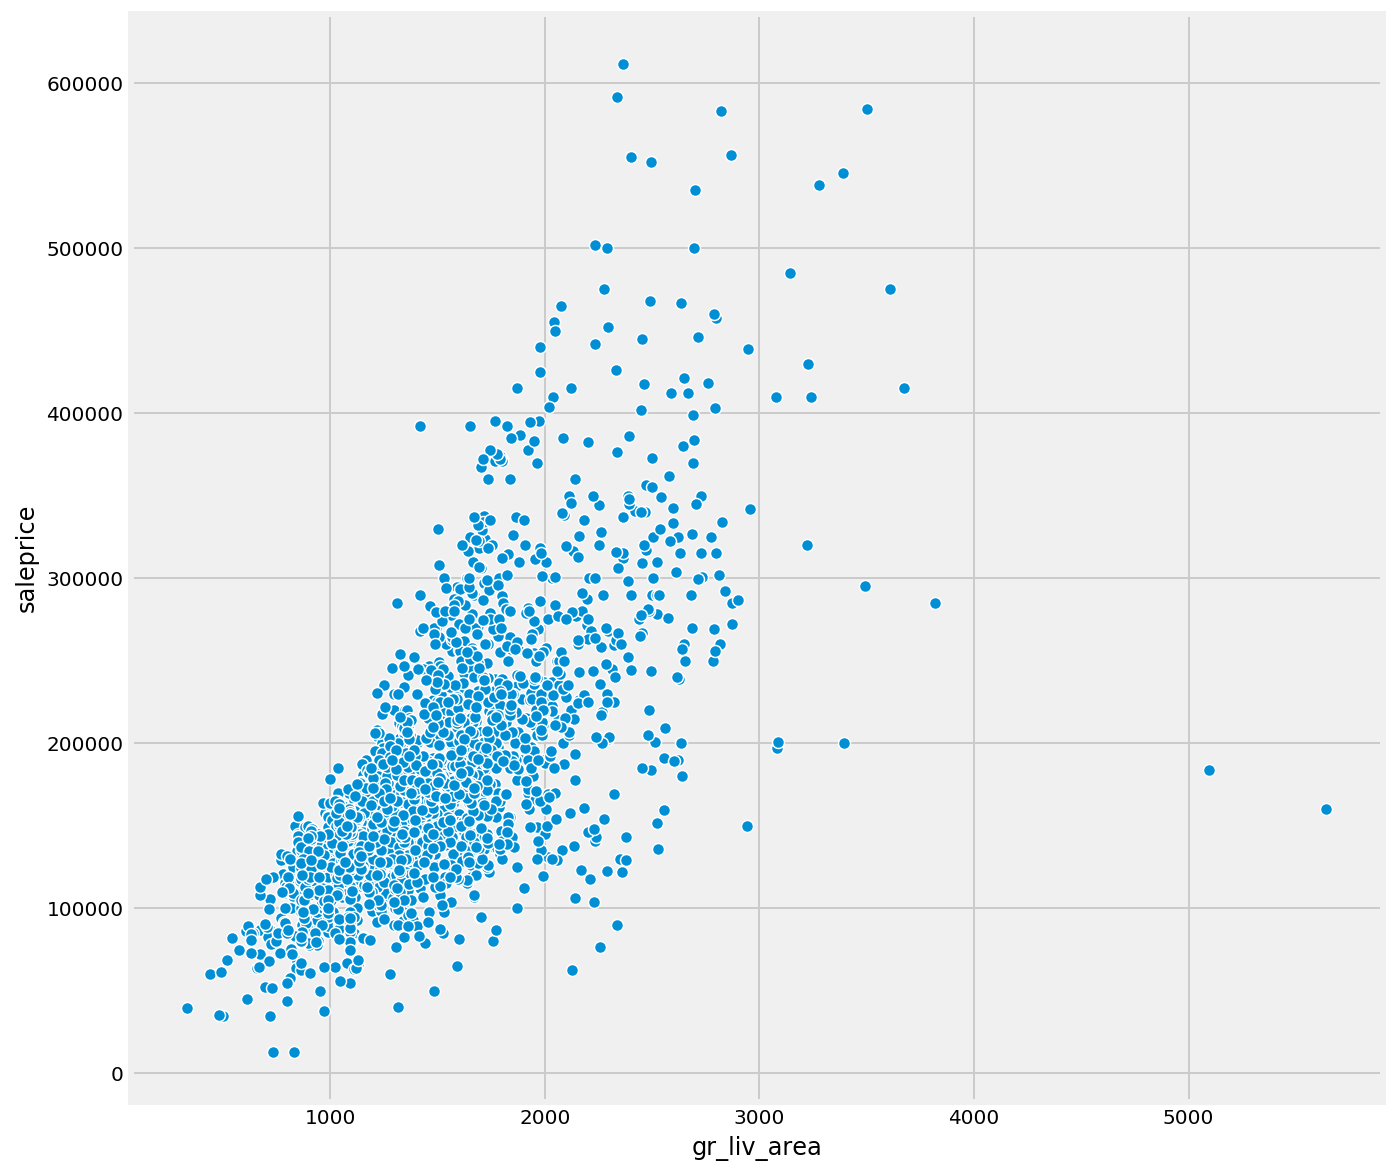

In [10]:
# plot scatterplot as above recommendation to observe:

plt.figure(figsize=(10,10))
sns.scatterplot(x="gr_liv_area", y="saleprice", data=df)    ### Why single out this particular variable? Surely there are 
                                                            ### more outliers that can be seen in the scatterplots of other
                                                            ### features. Better to plot ALL numerical features and filter 
                                                            ### anomalies fromt there. 

In [11]:
df.loc[df['gr_liv_area'] > 4000]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
960            60        RL         313.0     63887   Pave       IR3   
1885           20        RL         128.0     39290   Pave       IR1   

     land_contour utilities lot_config land_slope  ... open_porch_sf  \
960           Bnk    AllPub     Corner        Gtl  ...           292   
1885          Bnk    AllPub     Inside        Gtl  ...           484   

     enclosed_porch 3ssn_porch screen_porch pool_area  misc_val  mo_sold  \
960               0          0            0       480         0        1   
1885              0          0            0         0     17000       10   

      yr_sold  sale_type saleprice  
960      2008        New    160000  
1885     2007        New    183850  

[2 rows x 74 columns]

I was able to identify the 2 "unusual sales (very large houses priced relatively appropriately)", but was not able to identify the other 3 "true outliers (Partial Sales that likely don’t represent actual market values)".

Regardless, will proceed to drop the 2 "unusual sales".

In [12]:
df = df.drop([960, 1885])  ### Yes you can do this since you already have the index values, but then 
                           ### df = df[df['gr_liv_area'] < 4000] would have been faster for multiple anomalies
                           ### (if you went ahead and looked at all the anomalies across different features)
df.shape

(2049, 74)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 74 columns):
ms_subclass        2049 non-null int64
ms_zoning          2049 non-null object
lot_frontage       1719 non-null float64
lot_area           2049 non-null int64
street             2049 non-null object
lot_shape          2049 non-null object
land_contour       2049 non-null object
utilities          2049 non-null object
lot_config         2049 non-null object
land_slope         2049 non-null object
neighborhood       2049 non-null object
condition_1        2049 non-null object
condition_2        2049 non-null object
bldg_type          2049 non-null object
house_style        2049 non-null object
overall_qual       2049 non-null int64
overall_cond       2049 non-null int64
year_built         2049 non-null int64
year_remod/add     2049 non-null int64
roof_style         2049 non-null object
roof_matl          2049 non-null object
exterior_1st       2049 non-null object
exterior_2nd      

I took notice of the columns 'year_built', 'year_remod/add', as well as 'yr_sold'.

I decide to feature engineer a new column **'prop_age'** to see whether age of property affects sale price. It also helps that each of above-mentioned 3 columns have matching number of non-null values.

According to Data Documentation:
    
- Year Built (Discrete): Original construction date

- Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)

I also decide to create a dummy variable **'prop_remodel_dummy'** if property has been remodelled before (Yes = 1, No = 0)

Additionally, feature engineer another column **'prop_remodel_duration** to see whether the length of duration between the remodel date and the year when property was sold affects sale price.

In [14]:
df['prop_age'] = df['yr_sold'] - df['year_built']   ### I'm not sure if linear combinations of features will be very helpful,
                                                    ### especially if we constrain ourselves to linear models.
                                                    ### At best the model zooms in to what we already know.
                                                    ### At worse this induces numerical instability in the solver. 

In [15]:
df['prop_remodel_duration'] = df['yr_sold'] - df['year_remod/add'] 

In [16]:
prop_remodel_dummy = []

for x, y in zip(df['year_built'], df['year_remod/add']):
    if x != y:
        prop_remodel_dummy.append(1)
    else:
        prop_remodel_dummy.append(0)

In [17]:
df['prop_remodel_dummy'] = prop_remodel_dummy

In [18]:
# drop 'yr_sold', 'yr_built' and 'year_remod/add' since the new features have been created:
# drop 'mo_sold' as well since it is irrelevant to feature engineering:

df = df.drop(columns = ['mo_sold', 'year_built', 'yr_sold', 'year_remod/add'])  ### not a good idea, you're removing info
df.head()

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  land_contour utilities lot_config land_slope  ... enclosed_porch 3ssn_porch  \
0          Lvl    AllPub    CulDSac        Gtl  ...              0          0   
1          Lvl    AllPub    CulDSac        Gtl  ...              0          0   
2          Lvl    AllPub     Inside        Gtl  ...              0          0   
3          Lvl    AllPub     Inside        Gtl  ...              0          0   
4          Lvl    AllPub     Inside        Gtl  ...              0          0   

  screen_porch pool_area misc_val  sale_type  saleprice prop_age  \
0            0         0        0        WD      130500       34   
1            0         0        0        WD      220000       13   
2            0         0        0        WD      109000       57   
3            0         0        0        WD      174000        4   
4            0         0        0        WD      138500      110   

  prop_remodel_duration prop_remodel_dummy  
0                     5                  1  
1                    12                  1  
2                     3                  1  
3                     3                  1  
4                    17                  1  

[5 rows x 73 columns]

In [19]:
df.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'garage_type', 'garage_yr_blt', 'garage_finish',
       'garage_cars', 'garage_area', 'garage_qual', 'garage_cond',
  

Lastly, I combine all 'square feet'-related variables together into one variable - 'total_sf'

In [20]:
df['total_sf'] = (df['total_bsmt_sf'] + df['1st_flr_sf'] + df['2nd_flr_sf'] + df['low_qual_fin_sf'] + 
                    df['wood_deck_sf'] + df['open_porch_sf'] + df['garage_area'] + df['gr_liv_area']) ### same here

In [21]:
df = df.drop(['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'wood_deck_sf', 'open_porch_sf', 'garage_area', 'gr_liv_area'], axis = 1)
df.head()

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  land_contour utilities lot_config land_slope  ... 3ssn_porch screen_porch  \
0          Lvl    AllPub    CulDSac        Gtl  ...          0            0   
1          Lvl    AllPub    CulDSac        Gtl  ...          0            0   
2          Lvl    AllPub     Inside        Gtl  ...          0            0   
3          Lvl    AllPub     Inside        Gtl  ...          0            0   
4          Lvl    AllPub     Inside        Gtl  ...          0            0   

  pool_area misc_val sale_type  saleprice  prop_age prop_remodel_duration  \
0         0        0       WD      130500        34                     5   
1         0        0       WD      220000        13                    12   
2         0        0       WD      109000        57                     3   
3         0        0       WD      174000         4                     3   
4         0        0       WD      138500       110                    17   

  prop_remodel_dummy total_sf  
0                  1   4202.0  
1                  1   5790.0  
2                  1   3469.0  
3                  1   3772.0  
4                  1   4109.0  

[5 rows x 66 columns]

#### Check on each column's unique values to identify erroneous entries:

In [22]:
def get_unique(list_of_columns):
    for x in list_of_columns:
        print(f"{x}'s unique values are:", df[x].unique())
        print("\n\n")
        
list_of_columns = [x for x in df.columns]
get_unique(list_of_columns)

ms_subclass's unique values are: [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]



ms_zoning's unique values are: ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']



lot_frontage's unique values are: [ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 141. 101.  99. 160. 174. 313.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]



lot_area's unique values are: [13517 11492  7922 ... 12444 11449  7558]



street's unique values are: ['Pave' 'Grvl']



lot_shape's unique values are: ['IR1' 'Reg' 'IR2

As seen from the unique values above, there are quite a few variables with NaN. I will proceed to identify them and make a call whether to drop these rows:

In [23]:
df[df.isna().any(axis=1)]

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0              60        RL           NaN     13517   Pave       IR1   
7              20        RL           NaN     12160   Pave       IR1   
8              20        RL           NaN     15783   Pave       Reg   
12             70        RL         120.0     26400   Pave       Reg   
22             60        RL         103.0     12867   Pave       IR1   
...           ...       ...           ...       ...    ...       ...   
2028           20        RL           NaN     20781   Pave       IR2   
2031           20        RL           NaN     12537   Pave       IR1   
2039          160        RM          21.0      1495   Pave       Reg   
2042           50        RL          45.0      8248   Pave       Reg   
2047           30        RL           NaN     12342   Pave       IR1   

     land_contour utilities lot_config land_slope  ... 3ssn_porch  \
0             Lvl    AllPub    CulDSac        Gtl  ...          0   
7             Lvl    AllPub     Inside        Gtl  ...          0   
8             Lvl    AllPub     Inside        Gtl  ...          0   
12            Bnk    AllPub        FR2        Gtl  ...          0   
22            Lvl    AllPub     Corner        Gtl  ...          0   
...           ...       ...        ...        ...  ...        ...   
2028          Lvl    AllPub    CulDSac        Gtl  ...        290   
2031          Lvl    AllPub    CulDSac        Gtl  ...          0   
2039          Lvl    AllPub     Inside        Gtl  ...          0   
2042          Lvl    AllPub     Inside        Gtl  ...          0   
2047          Lvl    AllPub     Inside        Gtl  ...          0   

     screen_porch pool_area misc_val sale_type  saleprice  prop_age  \
0               0         0        0       WD      130500        34   
7               0         0        0       COD     142000        51   
8               0         0      400       WD      112500        55   
12              0         0        0       WD      131000       129   
22              0         0        0       New     344133         1   
...           ...       ...      ...       ...        ...       ...   
2028            0         0        0       WD      262500        38   
2031            0         0        0       WD      149900        39   
2039            0         0        0       WD       93900        37   
2042            0         0        0       COD      83000        84   
2047            0         0        0       WD       82500        69   

     prop_remodel_duration prop_remodel_dummy total_sf  
0                        5                  1   4202.0  
7                       51                  0   4095.0  
8                       55                  0   3516.0  
12                       2                  1   4608.0  
22                       0                  1   6675.0  
...                    ...                ...      ...  
2028                     3                  1   6468.0  
2031                     2                  1   3734.0  
2039                    37                  0   2794.0  
2042                    56                  1   3692.0  
2047                    59                  1   3280.0  

[495 rows x 66 columns]

Dropping 495 entries will still yield 1554 entries, or 75% of entries remaining. Hence, proceed to drop these rows with null values:

In [24]:
df = df.dropna()   ### Or you could try data imputation. For example, lot_frontage set to NaN could mean that 
df.shape           ### the house has no frontage, ie zero frontage. 25% of the dataset is pretty significant. 

(1554, 66)

### 3) Exploratory Data Analysis + Feature Selection
#### a) Numerical Variables

##### Visual Exploration: Correlation Heatmap

(29.0, 0.0)

<Figure size 1080x1080 with 0 Axes>

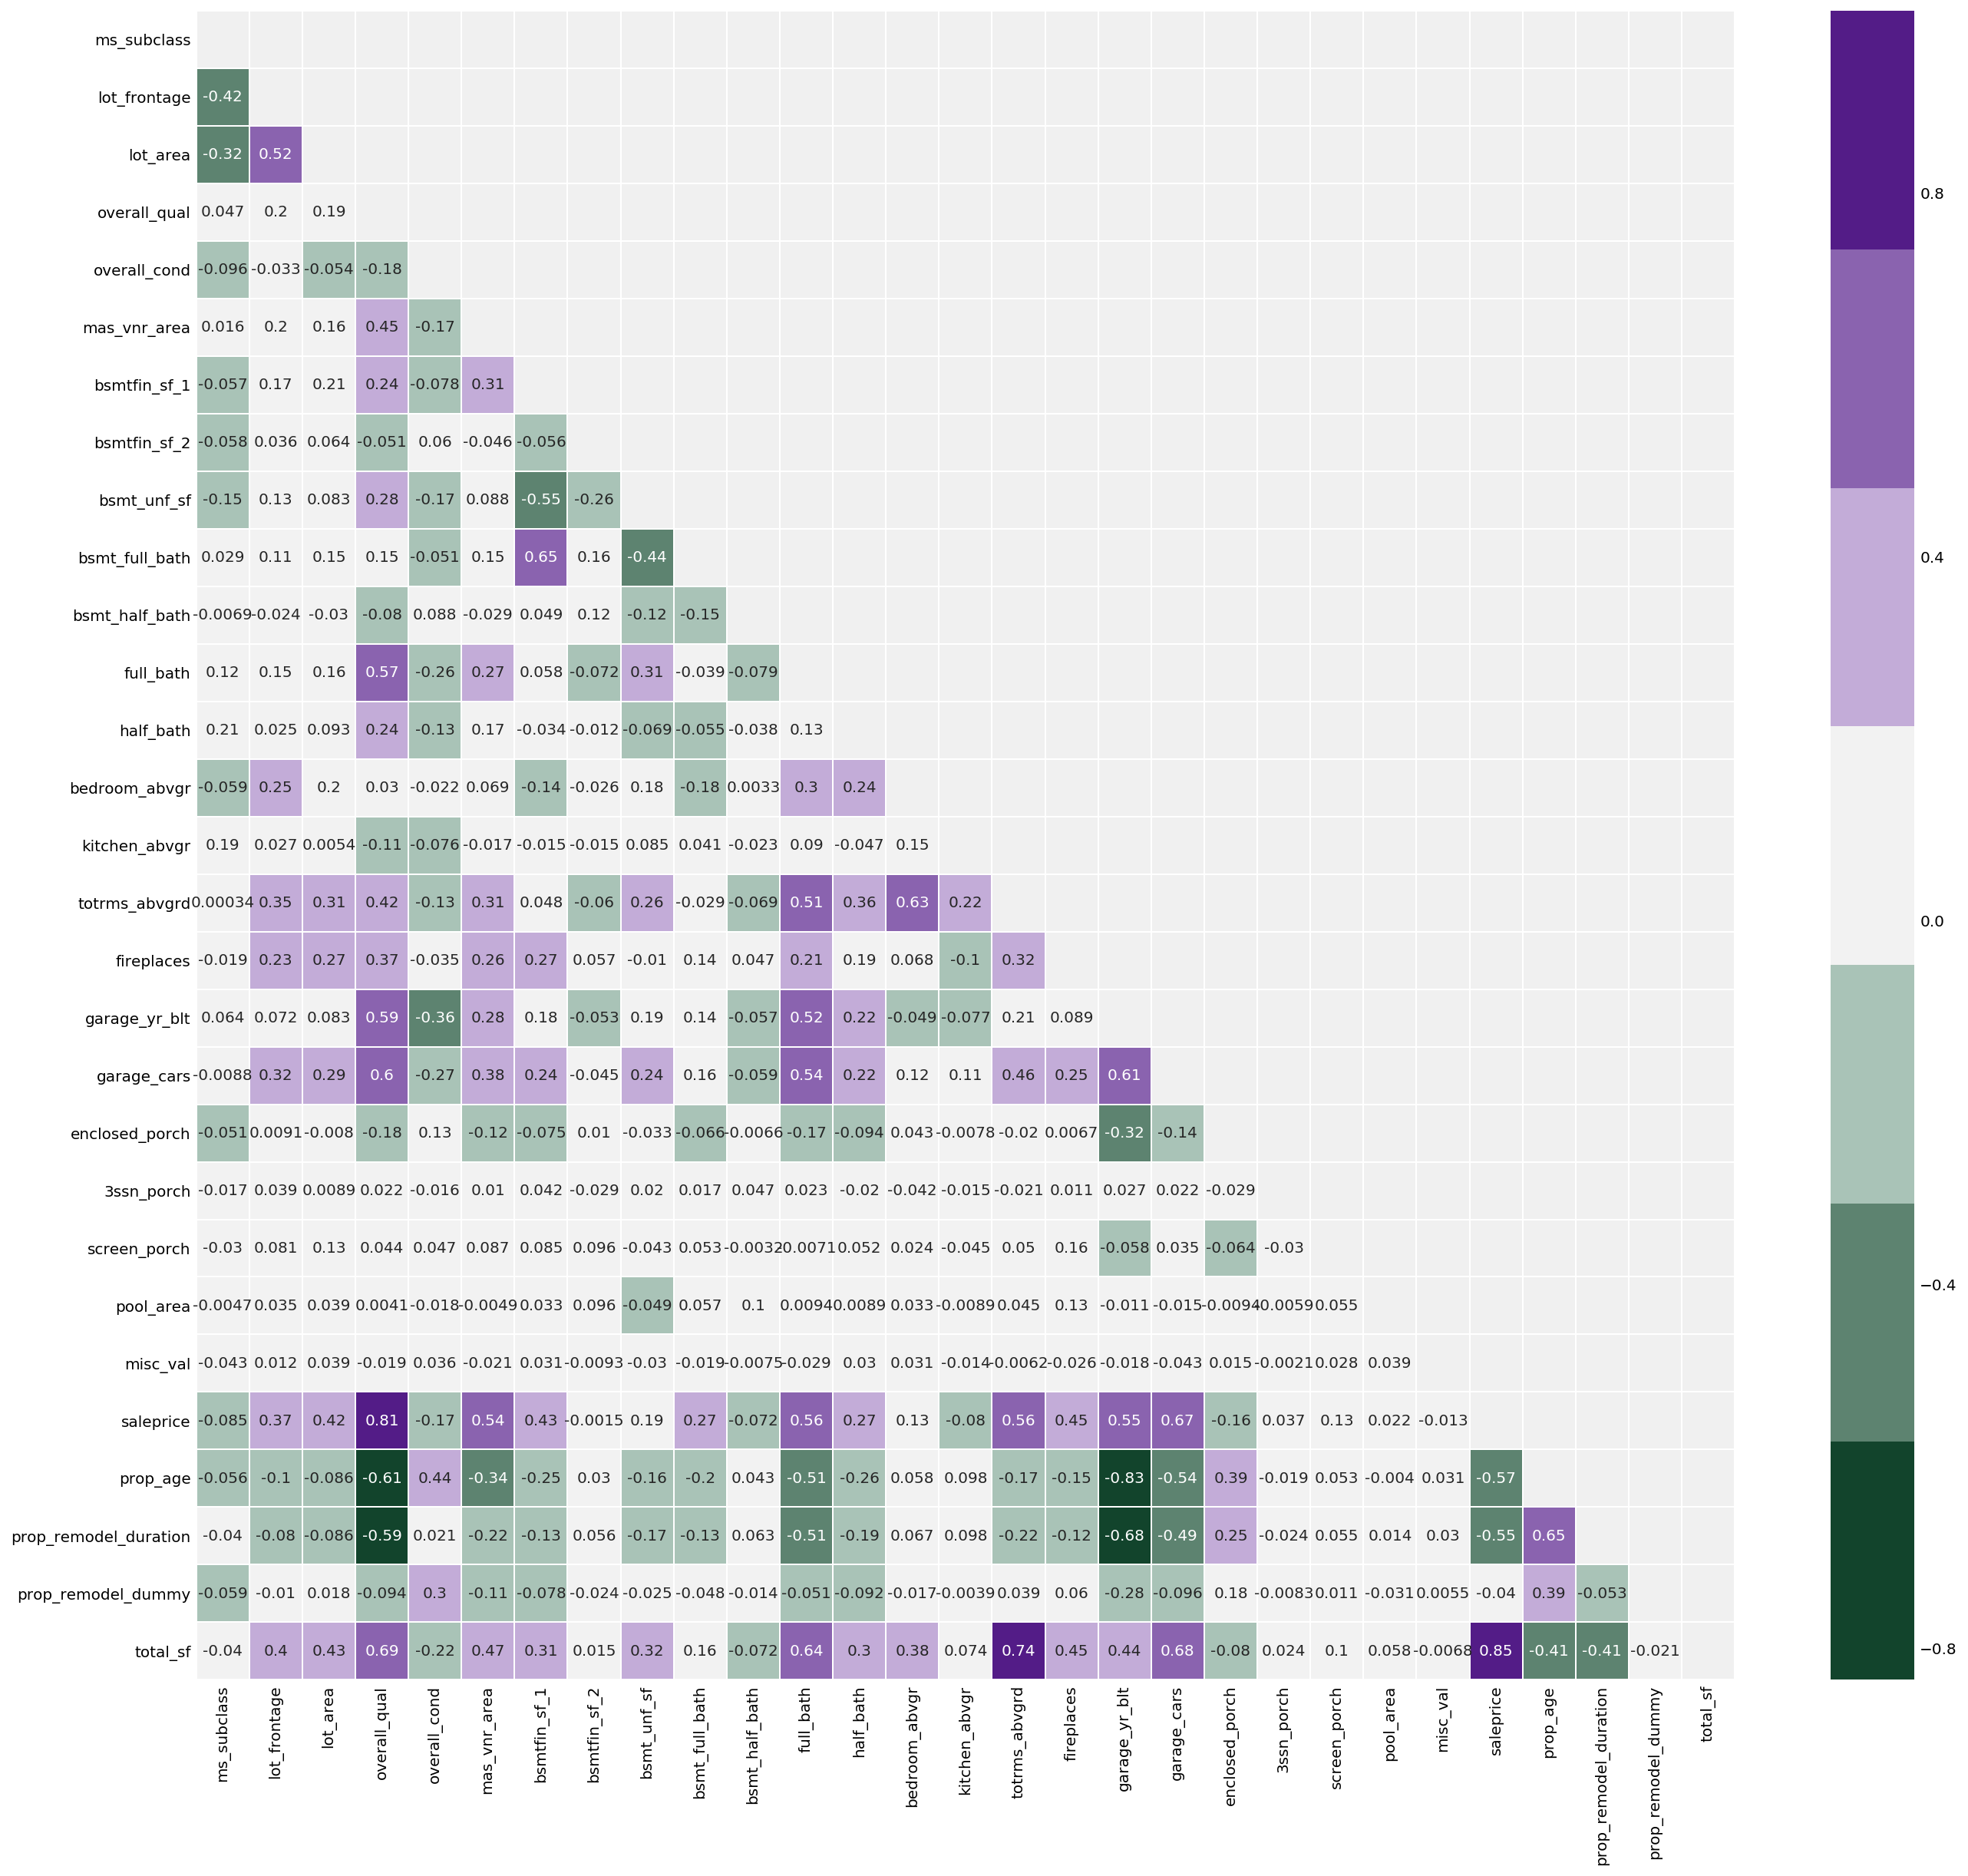

In [25]:
x_num = [x for x in df.columns if df[x].dtypes != object]

plt.figure(figsize=(15,15))
plt.subplots(figsize = (20,20))

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7) ### quite an odd colour palette

ax = sns.heatmap(df[x_num].corr(), annot=True, linewidths=0.5, mask=mask, cmap=cmap)
ax.get_ylim
ax.set_ylim((29.0, 0.0))

Text(0.5, 1, 'Ames Housing Heatmap')

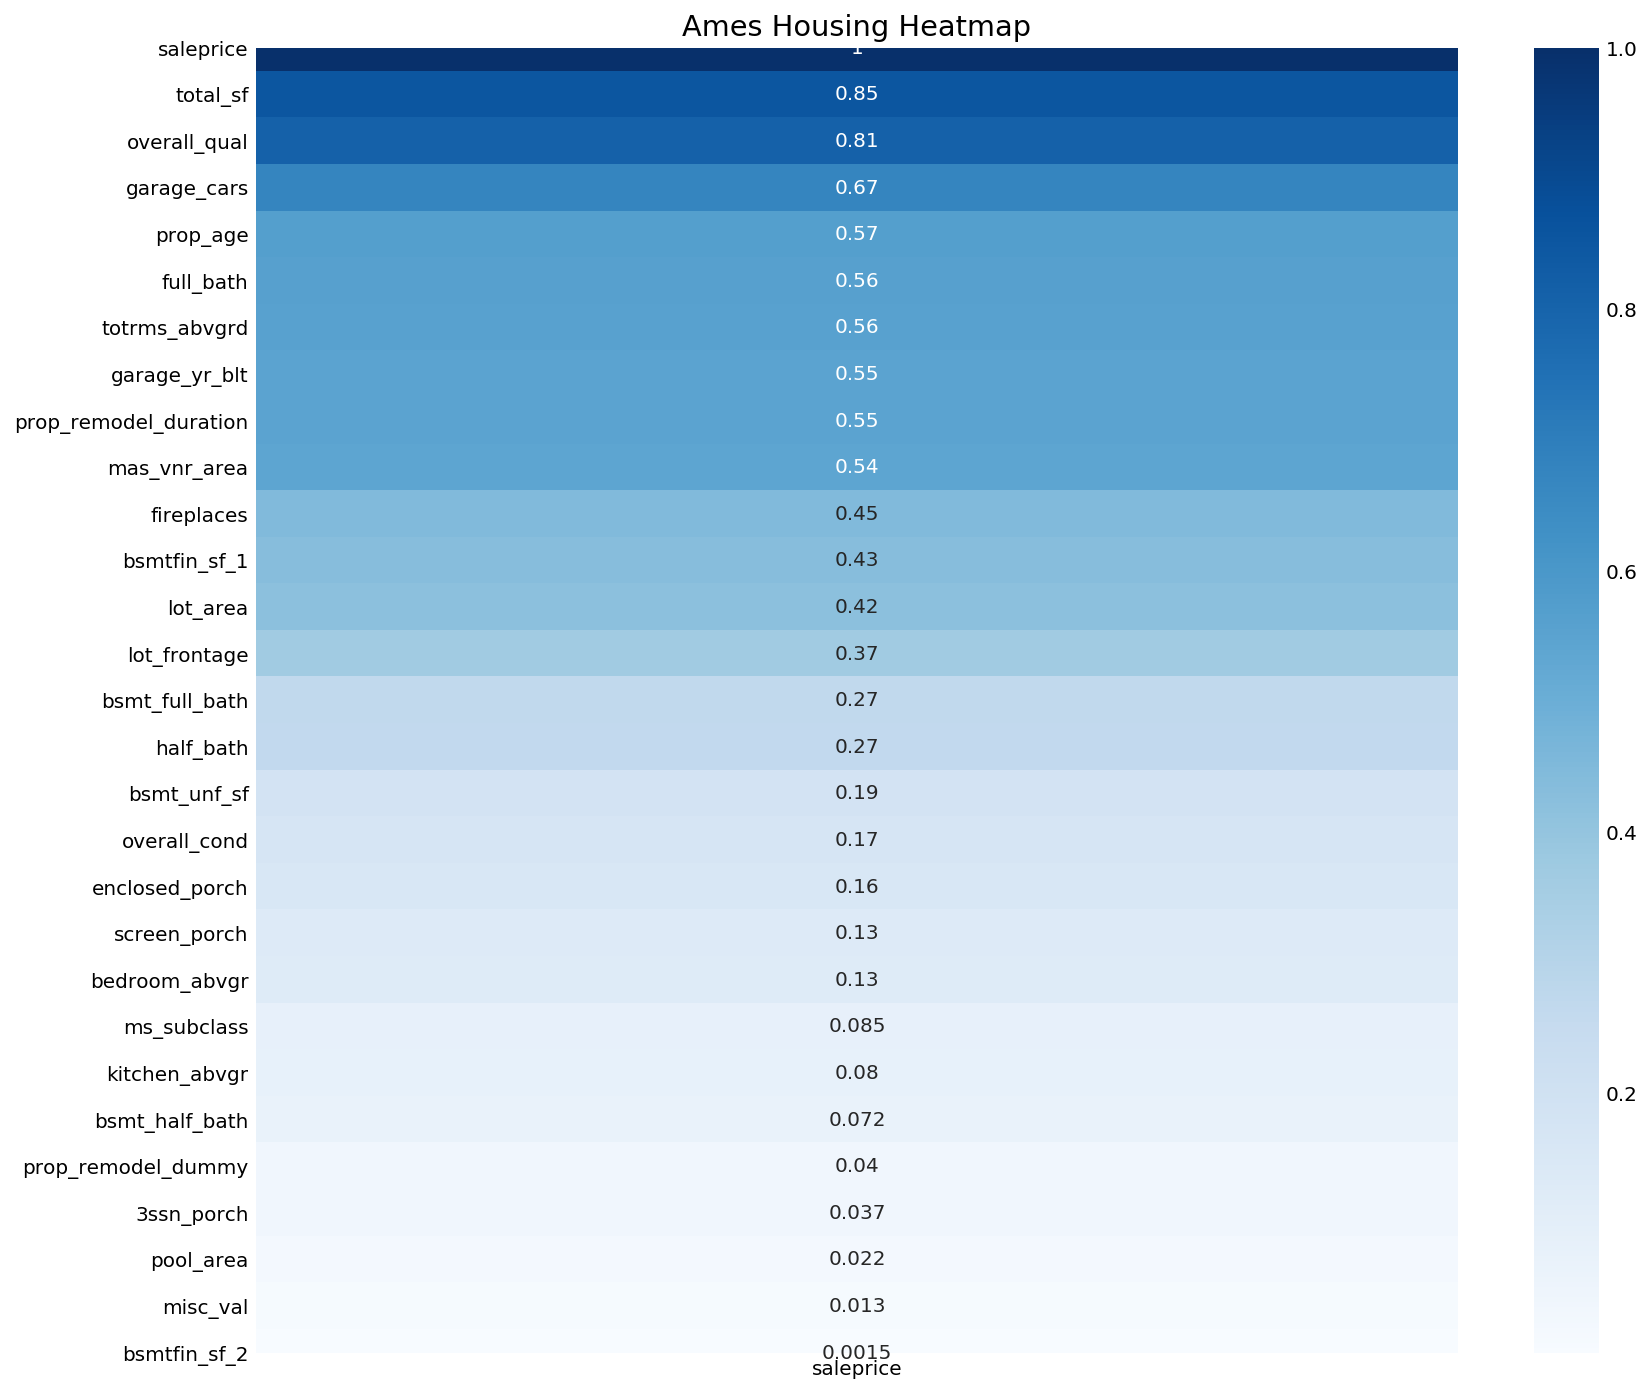

In [26]:
btm_corr = np.abs(df[x_num].corr()[['saleprice']]).sort_values('saleprice', ascending=False)  ### a bit misleading to call
plt.figure(figsize=(12,12))                                                                   ### this corr since you've 
ax = sns.heatmap(btm_corr, annot=True, cmap='Blues')                                          ### taken modulus
ax.set_title('Ames Housing Heatmap')

From the correlation heatmaps, I decide to drop variables to have very weak correlation with the target variable 'saleprice' (range of 0 to 0.2), except for 'prop_remodel_dummy' since it is a dummy variable.

In [27]:
btm_corr.loc[btm_corr['saleprice'] < 0.2]

saleprice
bsmt_unf_sf          0.187087
overall_cond         0.169963
enclosed_porch       0.159235
screen_porch         0.133182
bedroom_abvgr        0.128644
ms_subclass          0.085265
kitchen_abvgr        0.080145
bsmt_half_bath       0.072255
prop_remodel_dummy   0.040021
3ssn_porch           0.036766
pool_area            0.022080
misc_val             0.013041
bsmtfin_sf_2         0.001500

In [28]:
low_corr_x = [var for var in btm_corr.loc[btm_corr['saleprice'] < 0.2].index]
low_corr_x.remove('prop_remodel_dummy')
low_corr_x

['bsmt_unf_sf',
 'overall_cond',
 'enclosed_porch',
 'screen_porch',
 'bedroom_abvgr',
 'ms_subclass',
 'kitchen_abvgr',
 'bsmt_half_bath',
 '3ssn_porch',
 'pool_area',
 'misc_val',
 'bsmtfin_sf_2']

In [29]:
df = df.drop(columns = low_corr_x)
df.head()

ms_zoning  lot_frontage  lot_area street lot_shape land_contour utilities  \
1        RL          43.0     11492   Pave       IR1          Lvl    AllPub   
2        RL          68.0      7922   Pave       Reg          Lvl    AllPub   
3        RL          73.0      9802   Pave       Reg          Lvl    AllPub   
4        RL          82.0     14235   Pave       IR1          Lvl    AllPub   
5        RL         137.0     16492   Pave       IR1          Lvl    AllPub   

  lot_config land_slope neighborhood  ... garage_cars garage_qual garage_cond  \
1    CulDSac        Gtl      SawyerW  ...         2.0          TA          TA   
2     Inside        Gtl        NAmes  ...         1.0          TA          TA   
3     Inside        Gtl       Timber  ...         2.0          TA          TA   
4     Inside        Gtl      SawyerW  ...         2.0          TA          TA   
5     Corner        Gtl        NAmes  ...         2.0          TA          TA   

  paved_drive  sale_type saleprice prop_age prop_remodel_duration  \
1           Y        WD     220000       13                    12   
2           Y        WD     109000       57                     3   
3           Y        WD     174000        4                     3   
4           N        WD     138500      110                    17   
5           Y        WD     190000       44                     8   

  prop_remodel_dummy total_sf  
1                  1   5790.0  
2                  1   3469.0  
3                  1   3772.0  
4                  1   4109.0  
5                  1   5871.0  

[5 rows x 54 columns]

(17.0, 0.0)

<Figure size 1080x1080 with 0 Axes>

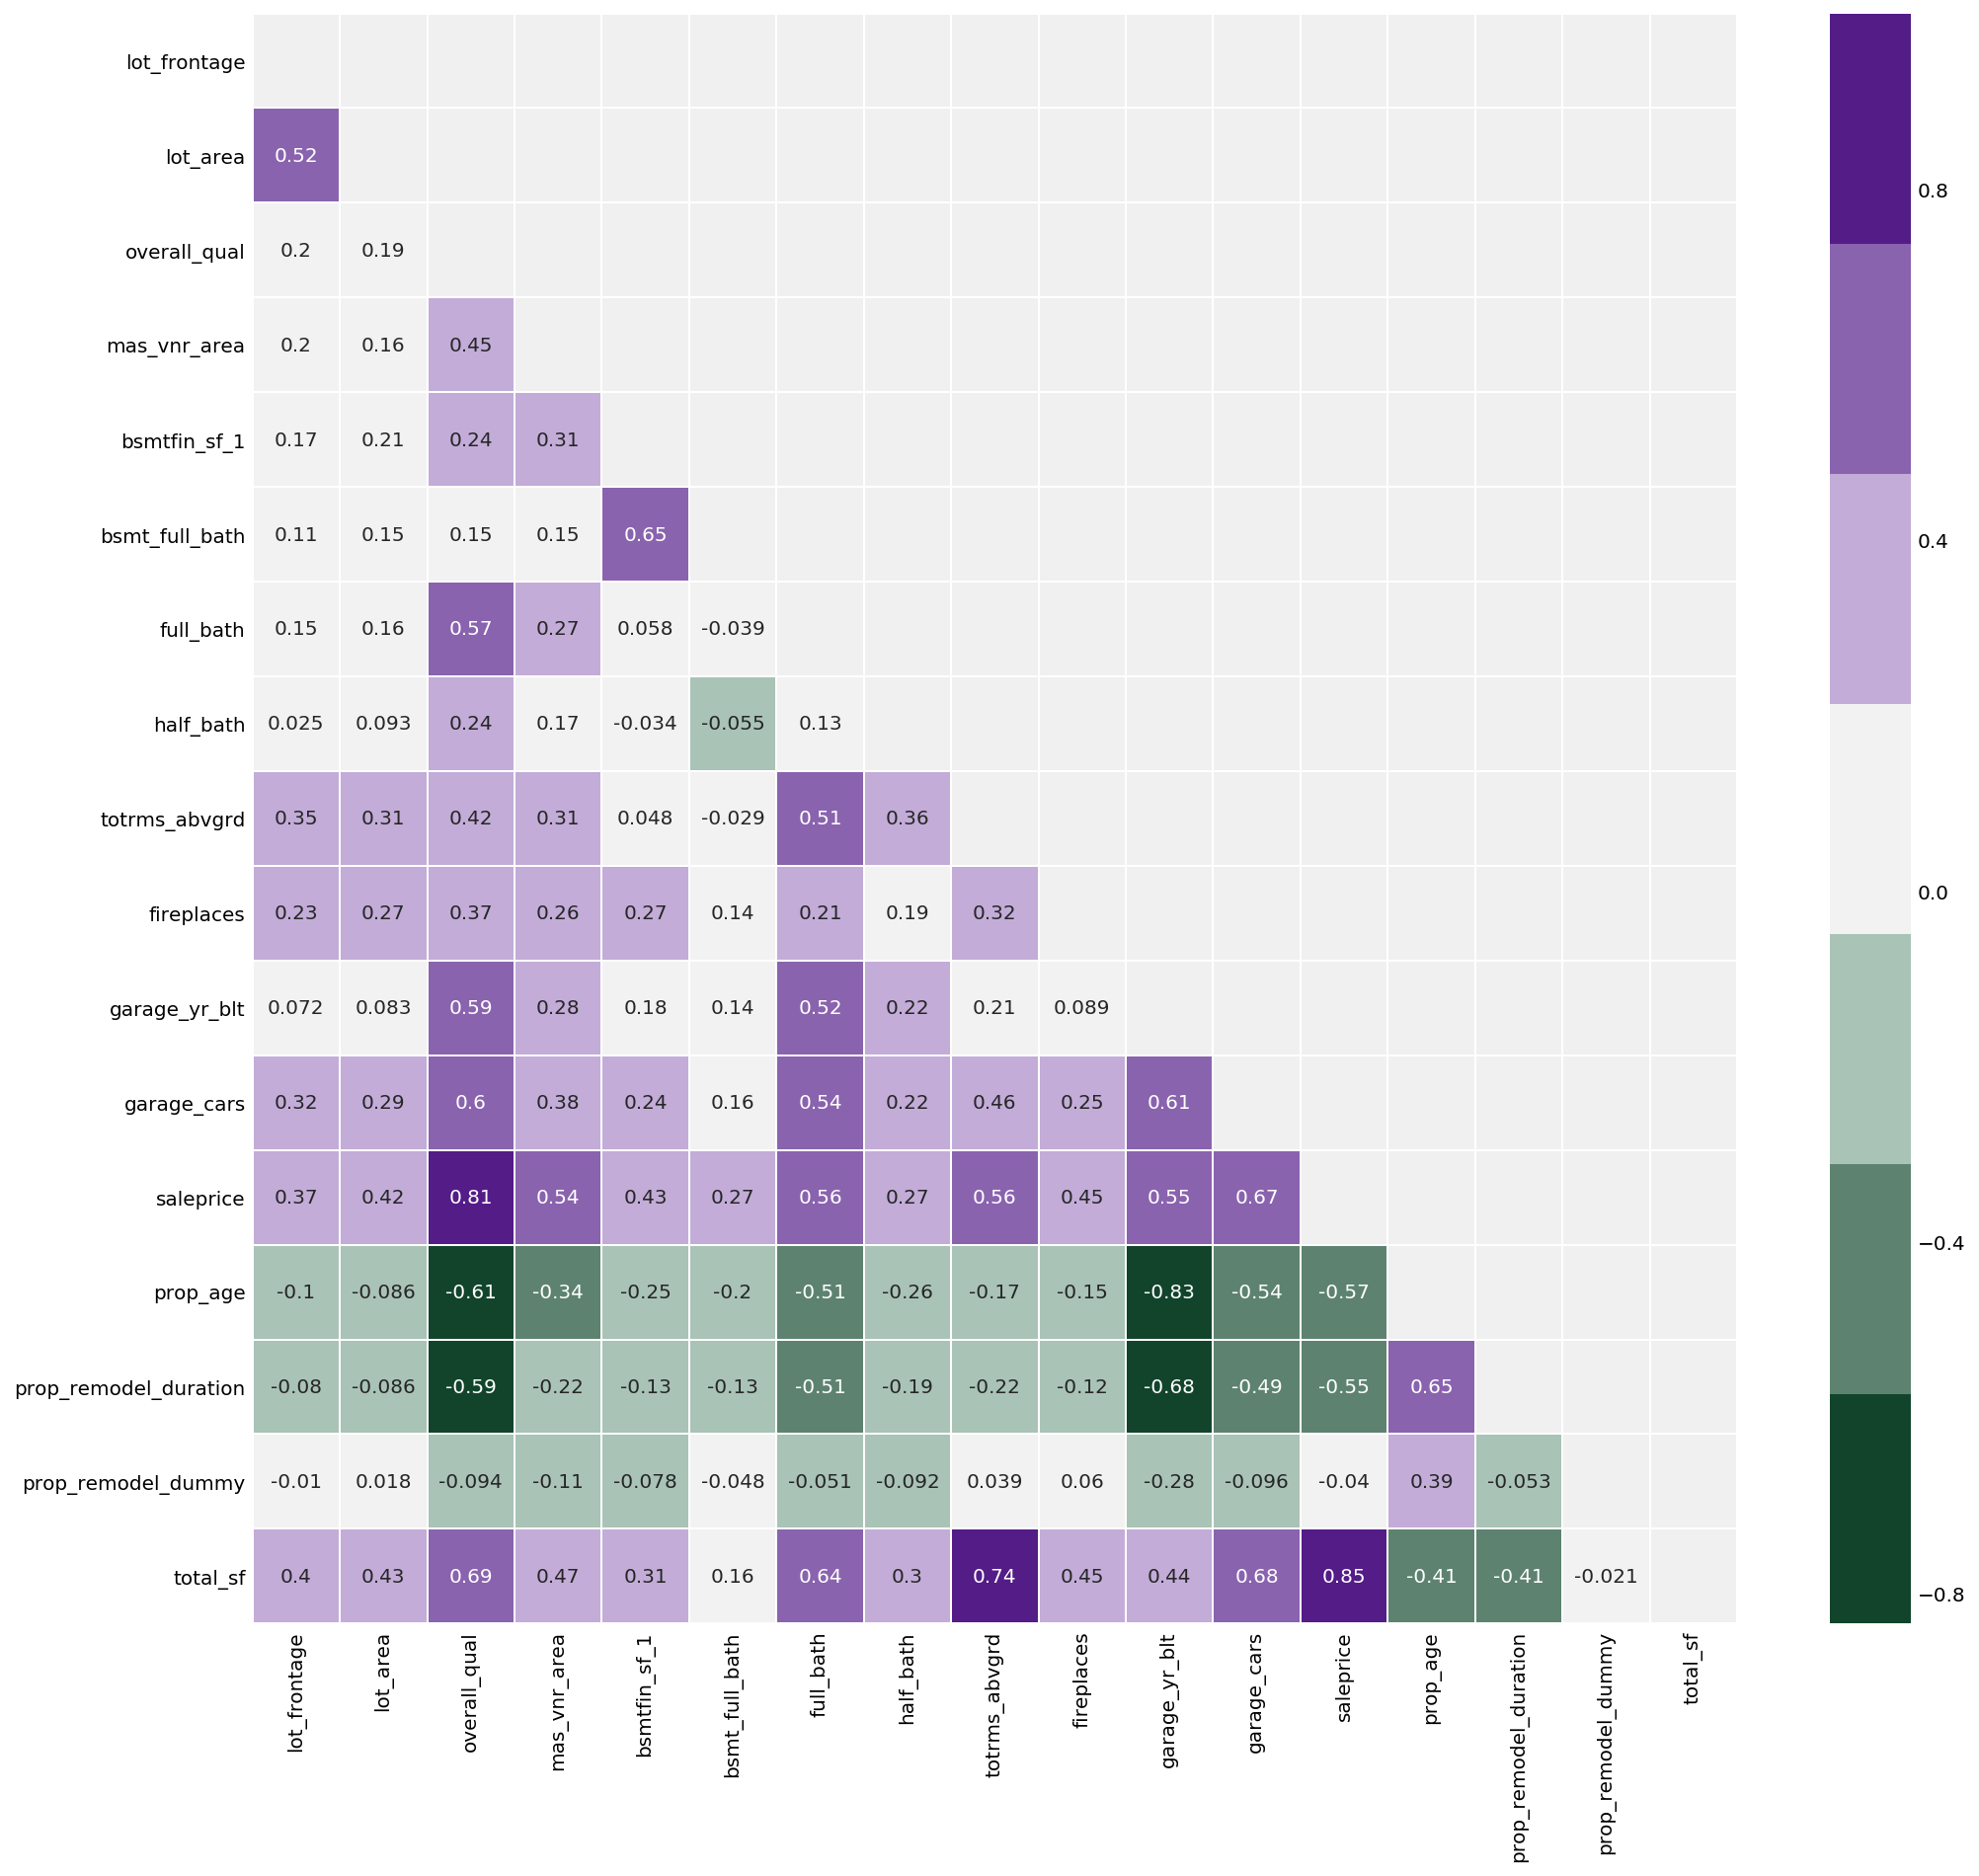

In [30]:
x_num = [x for x in df.columns if df[x].dtypes != object]

plt.figure(figsize=(15,15))
plt.subplots(figsize = (15,15))

mask = np.zeros_like(df[x_num].corr())
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

ax = sns.heatmap(df[x_num].corr(), annot=True, linewidths=0.5, mask=mask, cmap=cmap)
ax.get_ylim
ax.set_ylim((17.0, 0.0))

Scale numerical features first:

In [31]:
excluded_nums = ['prop_remodel_dummy', 'saleprice']
X_num_features = [x for x in x_num if x not in excluded_nums]

In [32]:
scaler = StandardScaler()

In [33]:
df[X_num_features] = scaler.fit_transform(df[X_num_features])
df

ms_zoning  lot_frontage  lot_area street lot_shape land_contour  \
1           RL     -1.175306  0.401530   Pave       IR1          Lvl   
2           RL     -0.052430 -0.364192   Pave       Reg          Lvl   
3           RL      0.172146  0.039045   Pave       Reg          Lvl   
4           RL      0.576381  0.989870   Pave       IR1          Lvl   
5           RL      3.046710  1.473970   Pave       IR1          Lvl   
...        ...           ...       ...    ...       ...          ...   
2045        RL      1.205192  0.605722   Pave       Reg          Lvl   
2046        RL      0.441636  0.392307   Pave       IR1          HLS   
2048        RL     -0.546496 -0.442266   Pave       Reg          Bnk   
2049        RL      0.486551  0.167309   Pave       Reg          Lvl   
2050        RL     -0.411750 -0.454706   Pave       Reg          Lvl   

     utilities lot_config land_slope neighborhood  ... garage_cars  \
1       AllPub    CulDSac        Gtl      SawyerW  ...    0.202270   
2       AllPub     Inside        Gtl        NAmes  ...   -1.294531   
3       AllPub     Inside        Gtl       Timber  ...    0.202270   
4       AllPub     Inside        Gtl      SawyerW  ...    0.202270   
5       AllPub     Corner        Gtl        NAmes  ...    0.202270   
...        ...        ...        ...          ...  ...         ...   
2045    AllPub        FR2        Gtl      NridgHt  ...    1.699072   
2046    AllPub     Inside        Gtl       Timber  ...    0.202270   
2048    AllPub     Inside        Gtl      Crawfor  ...    0.202270   
2049    AllPub     Corner        Gtl        NAmes  ...   -1.294531   
2050    AllPub     Inside        Gtl      Gilbert  ...    0.202270   

     garage_qual garage_cond paved_drive  sale_type saleprice  prop_age  \
1             TA          TA           Y        WD     220000 -0.719155   
2             TA          TA           Y        WD     109000  0.717222   
3             TA          TA           Y        WD     174000 -1.012959   
4             TA          TA           N        WD     138500  2.447403   
5             TA          TA           Y        WD     190000  0.292838   
...          ...         ...         ...        ...       ...       ...   
2045          TA          TA           Y        New    394617 -1.143539   
2046          TA          TA           Y        WD     298751 -1.110894   
2048          Fa          Fa           Y        WD     177000  1.500700   
2049          TA          TA           Y        WD     144000  0.586642   
2050          TA          TA           Y        WD     189000 -0.784445   

     prop_remodel_duration prop_remodel_dummy  total_sf  
1                -0.504140                  1  0.777800  
2                -0.930254                  1 -0.913179  
3                -0.930254                  1 -0.692427  
4                -0.267410                  1 -0.446903  
5                -0.693524                  1  0.836813  
...                    ...                ...       ...  
2045             -1.072292                  0  1.394158  
2046             -1.024946                  0  1.029880  
2048              1.721120                  1  0.248868  
2049              1.437044                  0 -0.465846  
2050             -0.551486                  0  0.380008  

[1554 rows x 54 columns]

In [34]:
df_X_num_scaled = df[X_num_features]
df_X_num_scaled

lot_frontage  lot_area  overall_qual  mas_vnr_area  bsmtfin_sf_1  \
1        -1.175306  0.401530      0.551254      0.163768      0.439390   
2        -0.052430 -0.364192     -0.888493     -0.577465      0.651740   
3         0.172146  0.039045     -0.888493     -0.577465     -0.999621   
4         0.576381  0.989870     -0.168619     -0.577465     -0.999621   
5         3.046710  1.473970     -0.168619     -0.577465     -0.441637   
...            ...       ...           ...           ...           ...   
2045      1.205192  0.605722      1.271128      1.814695      2.018461   
2046      0.441636  0.392307      1.271128     -0.577465      1.284272   
2048     -0.546496 -0.442266     -0.168619     -0.577465     -0.999621   
2049      0.486551  0.167309     -1.608366     -0.577465     -0.649469   
2050     -0.411750 -0.454706      0.551254     -0.577465     -0.999621   

      bsmt_full_bath  full_bath  half_bath  totrms_abvgrd  fireplaces  \
1           1.107775   0.794155   1.278689       1.059700    0.657561   
2           1.107775  -1.058873  -0.748947      -0.948561   -0.946599   
3          -0.828651   0.794155   1.278689       0.390280   -0.946599   
4          -0.828651   0.794155  -0.748947      -0.279141   -0.946599   
5          -0.828651   0.794155   1.278689      -0.279141    0.657561   
...              ...        ...        ...            ...         ...   
2045        1.107775   0.794155  -0.748947       0.390280    0.657561   
2046        1.107775   0.794155  -0.748947       0.390280    0.657561   
2048       -0.828651  -1.058873   1.278689       1.729121    0.657561   
2049        1.107775  -1.058873  -0.748947      -0.279141    2.261720   
2050       -0.828651   0.794155   1.278689       0.390280    0.657561   

      garage_yr_blt  garage_cars  prop_age  prop_remodel_duration  total_sf  
1          0.715656     0.202270 -0.719155              -0.504140  0.777800  
2         -0.977611    -1.294531  0.717222              -0.930254 -0.913179  
3          1.100490     0.202270 -1.012959              -0.930254 -0.692427  
4         -0.823677     0.202270  2.447403              -0.267410 -0.446903  
5         -0.477327     0.202270  0.292838              -0.693524  0.836813  
...             ...          ...       ...                    ...       ...  
2045       1.138973     1.699072 -1.143539              -1.072292  1.394158  
2046       1.100490     0.202270 -1.110894              -1.024946  1.029880  
2048      -1.901211     0.202270  1.500700               1.721120  0.248868  
2049      -0.862161    -1.294531  0.586642               1.437044 -0.465846  
2050       0.792623     0.202270 -0.784445              -0.551486  0.380008  

[1554 rows x 15 columns]

Run VIF to check for multicollinearity amongst numerical variables:

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_X_num_scaled.values, i) for i in range(df_X_num_scaled.shape[1])]
vif["features"] = df_X_num_scaled.columns
vif.round(1)

VIF Factor               features
0          1.6           lot_frontage
1          1.6               lot_area
2          2.9           overall_qual
3          1.4           mas_vnr_area
4          2.1           bsmtfin_sf_1
5          1.8         bsmt_full_bath
6          2.4              full_bath
7          1.3              half_bath
8          2.8          totrms_abvgrd
9          1.4             fireplaces
10         4.3          garage_yr_blt
11         2.5            garage_cars
12         4.2               prop_age
13         2.2  prop_remodel_duration
14         5.7               total_sf

Drop 'total_sf' due to its VIF factor > 5 (moderate collinearity), and run round 2 of VIF

In [36]:
df_X_num_scaled = df_X_num_scaled.drop(['total_sf'], axis=1)
df = df.drop(['total_sf'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_X_num_scaled.values, i) for i in range(df_X_num_scaled.shape[1])]
vif["features"] = df_X_num_scaled.columns
vif.round(2)

VIF Factor               features
0         1.55           lot_frontage
1         1.48               lot_area
2         2.58           overall_qual
3         1.41           mas_vnr_area
4         2.00           bsmtfin_sf_1
5         1.81         bsmt_full_bath
6         2.20              full_bath
7         1.34              half_bath
8         2.08          totrms_abvgrd
9         1.36             fireplaces
10        4.25          garage_yr_blt
11        2.31            garage_cars
12        4.08               prop_age
13        2.21  prop_remodel_duration

No further variables with outstanding VIF Factor values to be dropped.

In [37]:
df.shape

(1554, 53)

#### b) Categorical Variables

Create function to run Chi-Squared test through all categorical features, so as to check for multicollinearity:

In [38]:
from scipy import stats
from scipy.stats import chi2_contingency

x_cat_chisq = [x for x in df.columns if df[x].dtypes == object]

impt_var = []
non_impt_var = []

class ChiSq:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def chisq_result(self, col1, alpha):
        result = ""
        if self.p>alpha:
            result=f"{col1} is IMPORTANT for prediction"
            impt_var.append(col1)
        else:
            result=f"{col1} is NOT IMPORTANT for prediction. Discard {col1} from model"
            non_impt_var.append(col1)
        print(result)
        
    def TestIndependence(self,col1,col2, alpha=0.05):
        X = self.df[col1].astype(str)
        Y = self.df[col2].astype(str)
        self.dfObserved = pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
#Initialize ChiSquare Class
cT = ChiSq(df)

#Feature Selection

for i in range(len(x_cat_chisq)):
        for j in range(i+1, len(x_cat_chisq)):
            cT.TestIndependence(x_cat_chisq[i],x_cat_chisq[j])
        cT.chisq_result(x_cat_chisq[i],alpha=0.05)
        
print("\n")
print(f"List of variables to keep: {impt_var}")
print("\n")
print(f"List of variables to drop: {non_impt_var}")

ms_zoning is NOT IMPORTANT for prediction. Discard ms_zoning from model
street is IMPORTANT for prediction
lot_shape is NOT IMPORTANT for prediction. Discard lot_shape from model
land_contour is IMPORTANT for prediction
utilities is IMPORTANT for prediction
lot_config is IMPORTANT for prediction
land_slope is IMPORTANT for prediction
neighborhood is NOT IMPORTANT for prediction. Discard neighborhood from model
condition_1 is IMPORTANT for prediction
condition_2 is IMPORTANT for prediction
bldg_type is NOT IMPORTANT for prediction. Discard bldg_type from model
house_style is NOT IMPORTANT for prediction. Discard house_style from model
roof_style is IMPORTANT for prediction
roof_matl is IMPORTANT for prediction
exterior_1st is NOT IMPORTANT for prediction. Discard exterior_1st from model
exterior_2nd is NOT IMPORTANT for prediction. Discard exterior_2nd from model
mas_vnr_type is NOT IMPORTANT for prediction. Discard mas_vnr_type from model
exter_qual is NOT IMPORTANT for prediction. Dis

In [39]:
df = df.drop(['ms_zoning', 'lot_shape', 'neighborhood', 'bldg_type', 'house_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'central_air', 'kitchen_qual', 'garage_type', 'garage_finish'], axis = 1)

In [40]:
for item in impt_var:
    print(df[item].value_counts())
    print("\n")

Pave    1551
Grvl       3
Name: street, dtype: int64


Lvl    1404
HLS      74
Bnk      57
Low      19
Name: land_contour, dtype: int64


AllPub    1554
Name: utilities, dtype: int64


Inside     1183
Corner      256
CulDSac      67
FR2          41
FR3           7
Name: lot_config, dtype: int64


Gtl    1483
Mod      67
Sev       4
Name: land_slope, dtype: int64


Norm      1344
Feedr       74
Artery      59
RRAn        31
PosN        18
RRAe        14
PosA        10
RRNn         3
RRNe         1
Name: condition_1, dtype: int64


Norm      1533
Feedr       10
PosA         3
PosN         3
Artery       3
RRNn         2
Name: condition_2, dtype: int64


Gable      1222
Hip         310
Gambrel      11
Flat          6
Mansard       3
Shed          2
Name: roof_style, dtype: int64


CompShg    1538
Tar&Grv       8
WdShngl       5
WdShake       2
Membran       1
Name: roof_matl, dtype: int64


TA    1361
Gd     159
Fa      28
Ex       6
Name: exter_cond, dtype: int64


TA    1428
Gd      72


Visually explore each of the remaining variables' distribution first, via a combination of boxplot & swarmplot.

##### Visual Exploration

In [41]:
def boxswarmplot(x):
    
    plt.figure(figsize=(12, 12))
    plt.title(f"Boxplot + Swarmplot for {x} vs Sale Price", loc="center", fontsize = 20)
    
    ax = sns.boxplot(x=f"{x}", y="saleprice", data=df)
    ax.set_xlabel(f"{x}", fontsize = 15)
    ax.set_ylabel("Sale Price", fontsize = 15)
    ax.tick_params(labelsize = 10)
    plt.xticks(rotation = 30)

    ax = sns.swarmplot(x=f"{x}", y="saleprice", data=df, color="black", size=6)

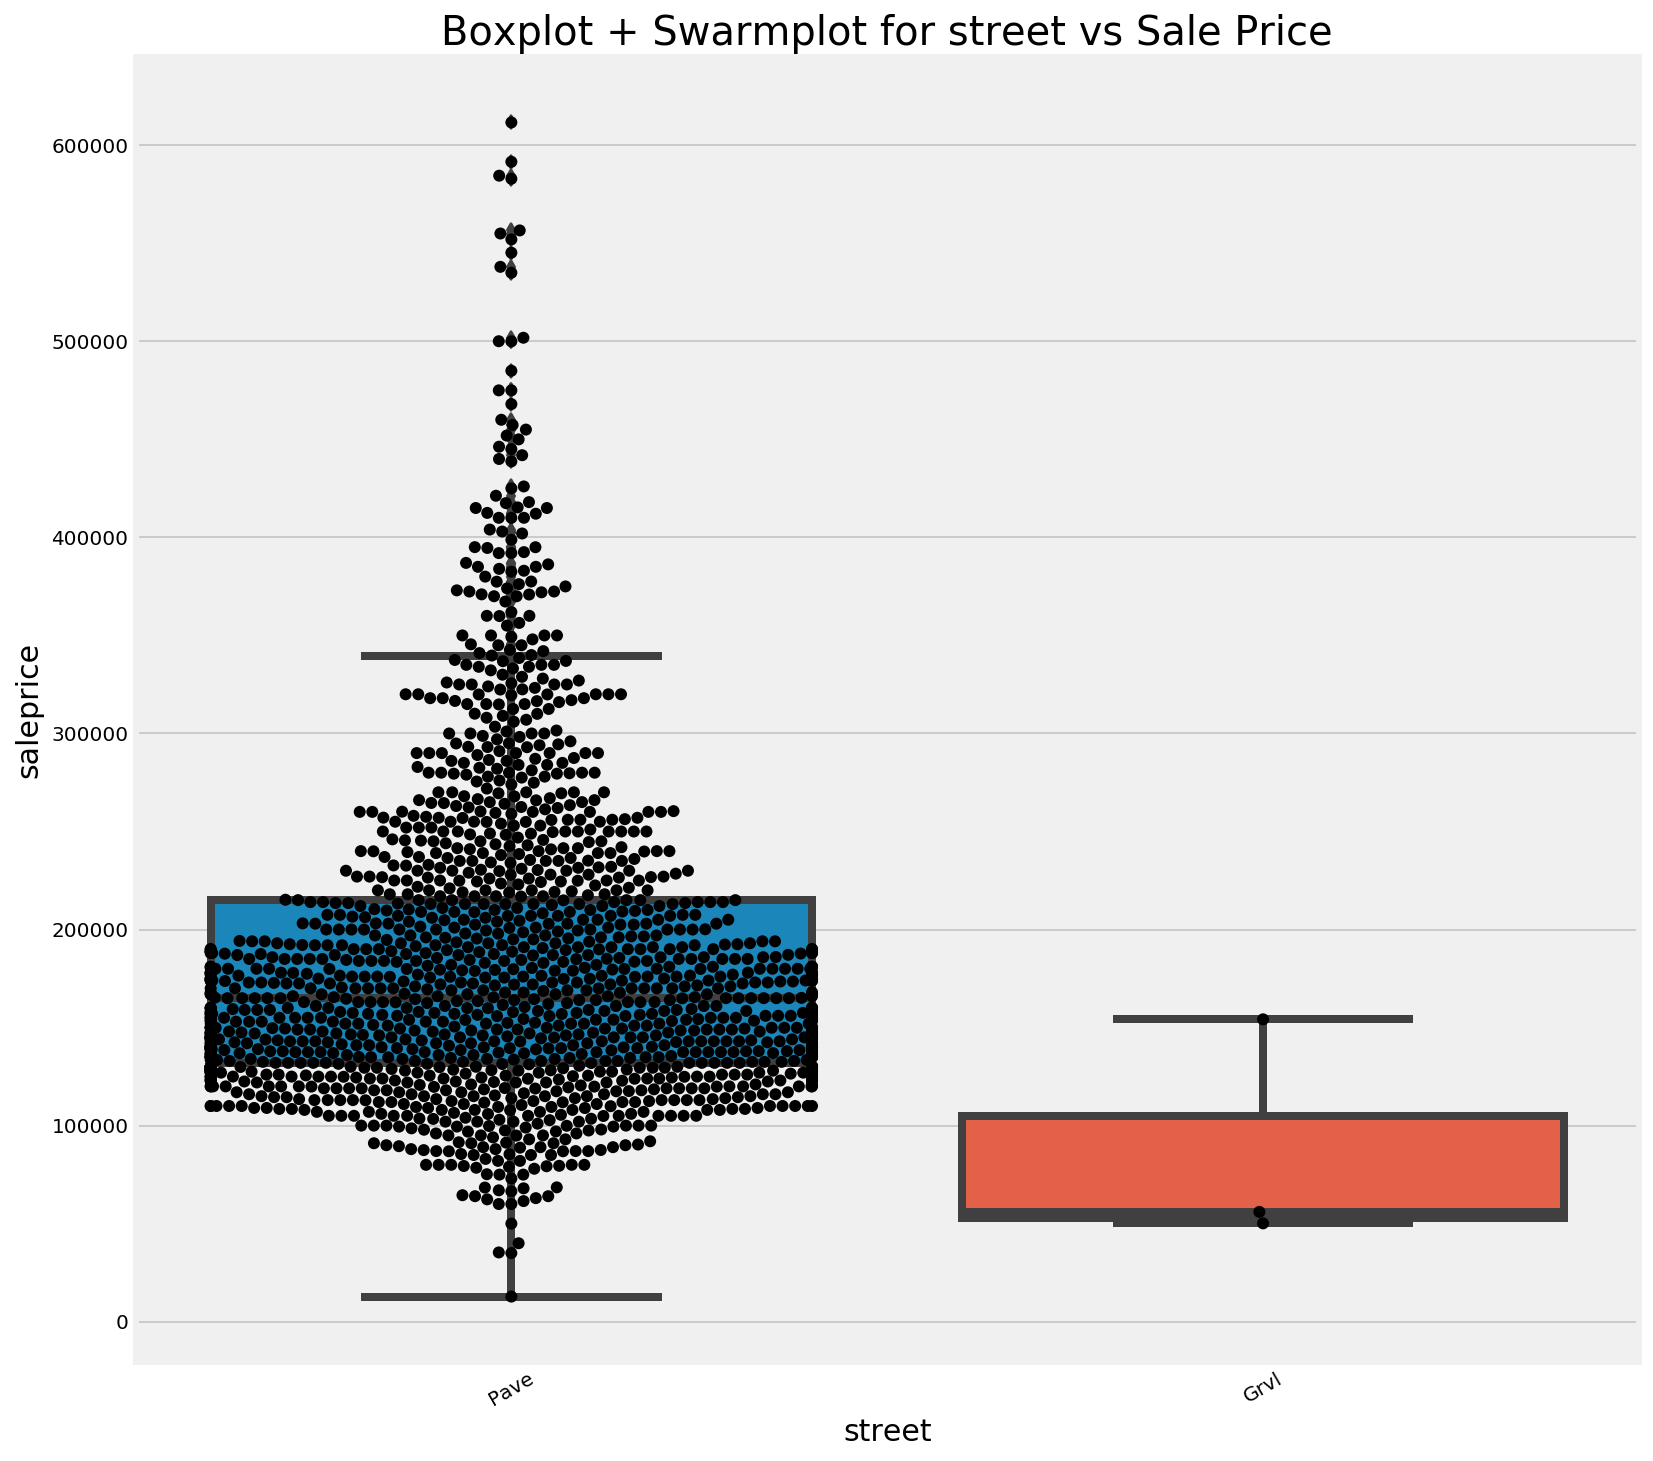

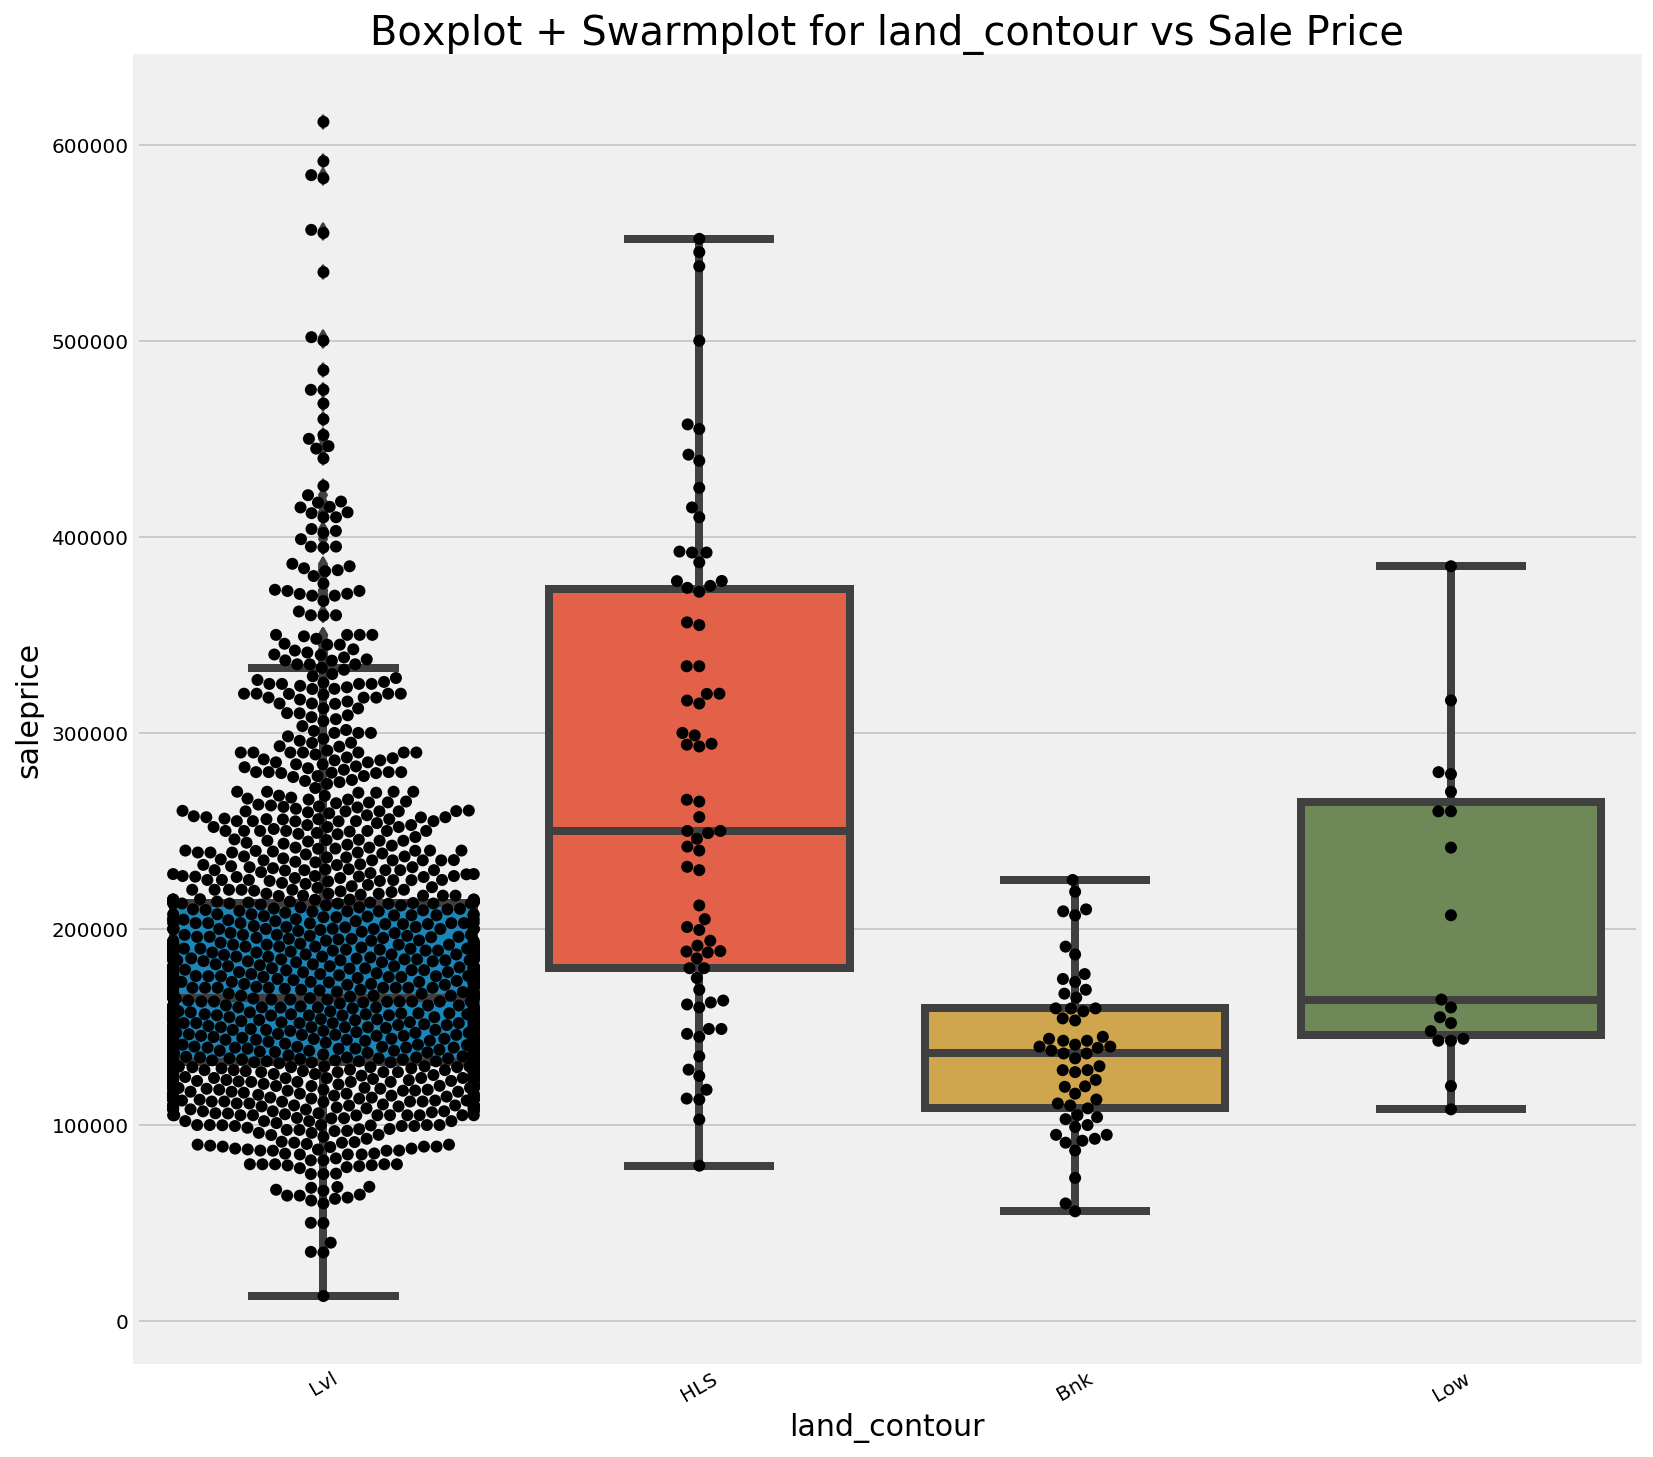

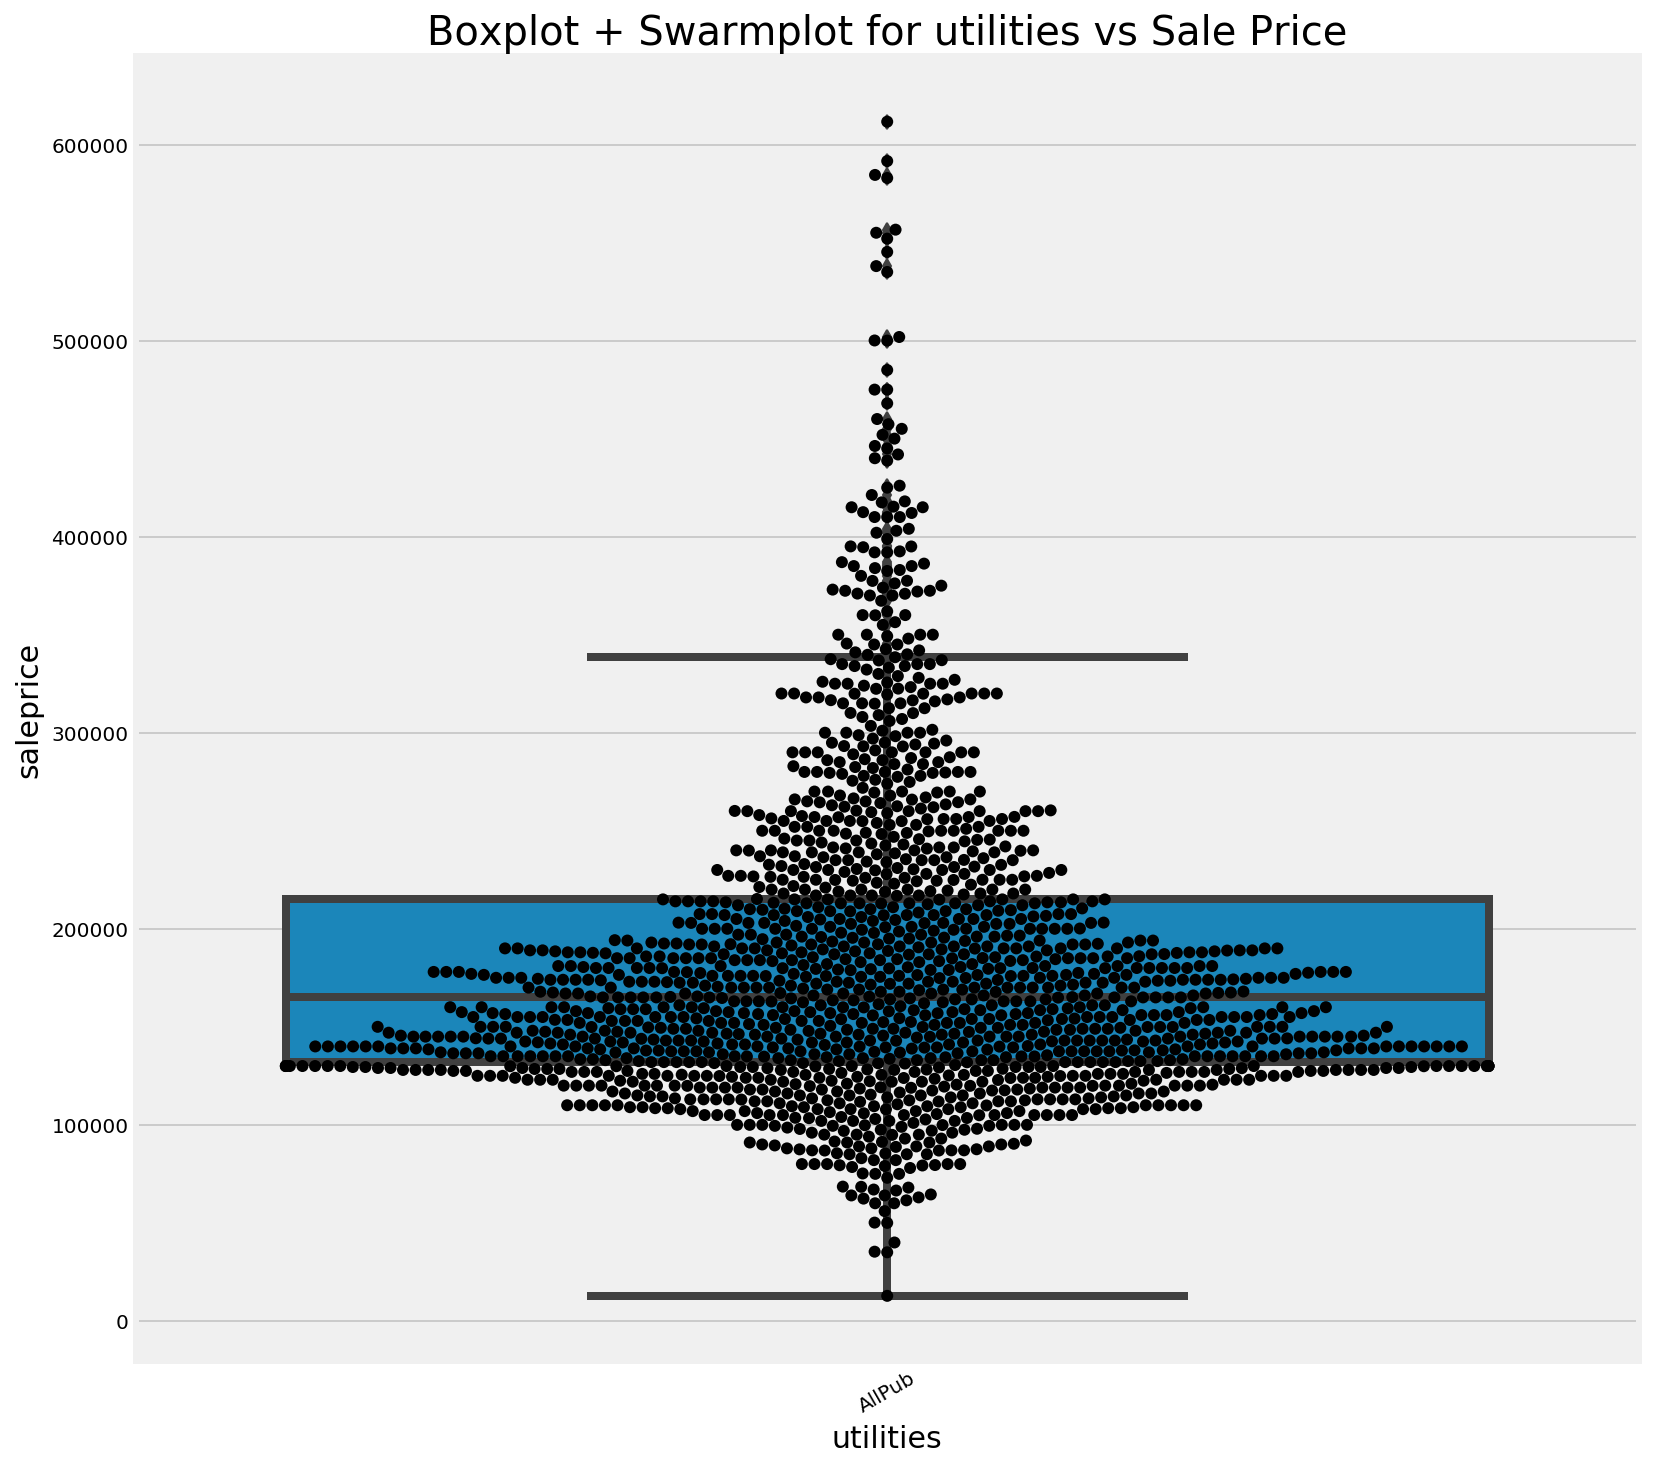

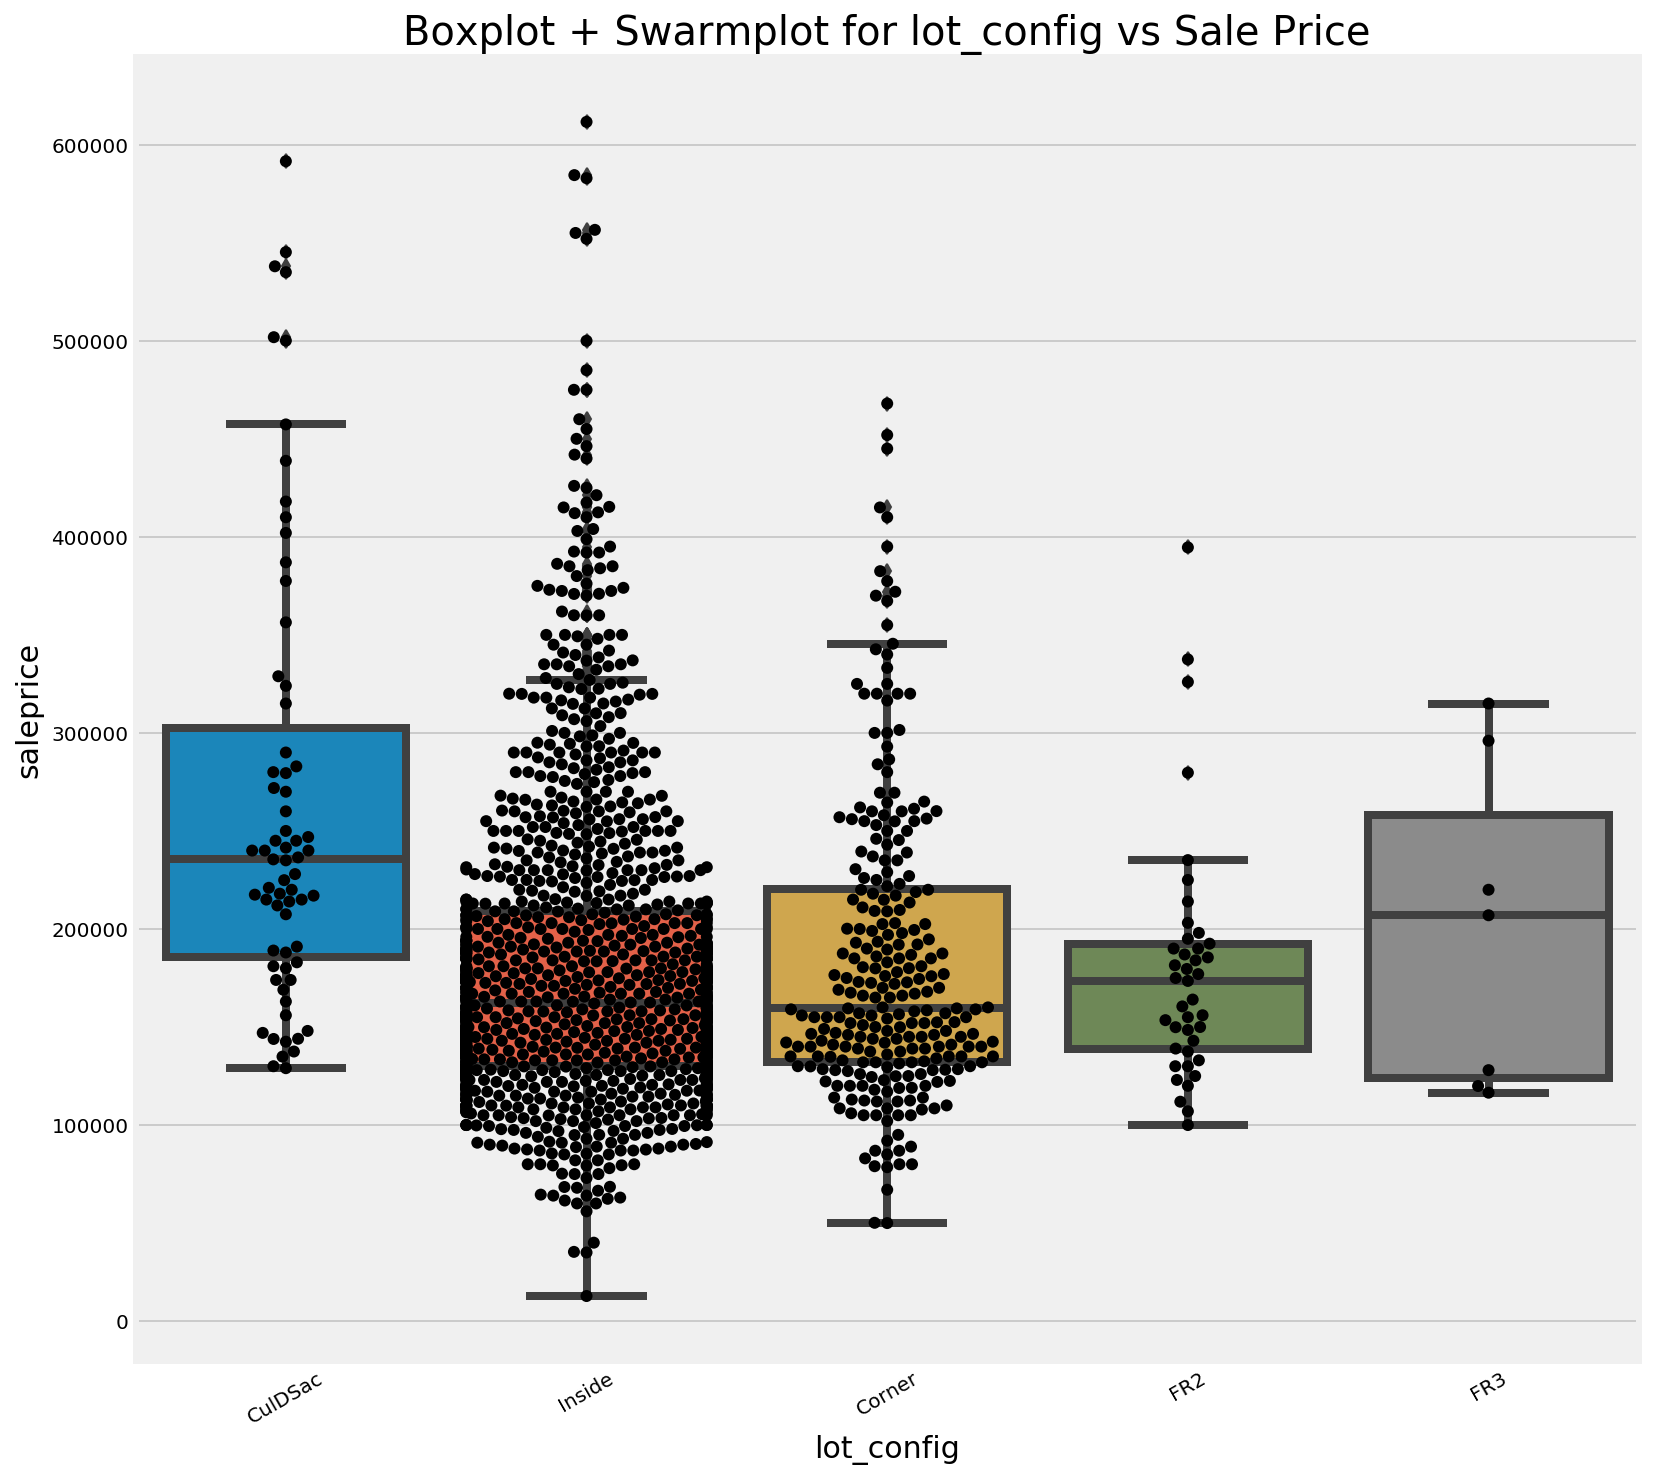

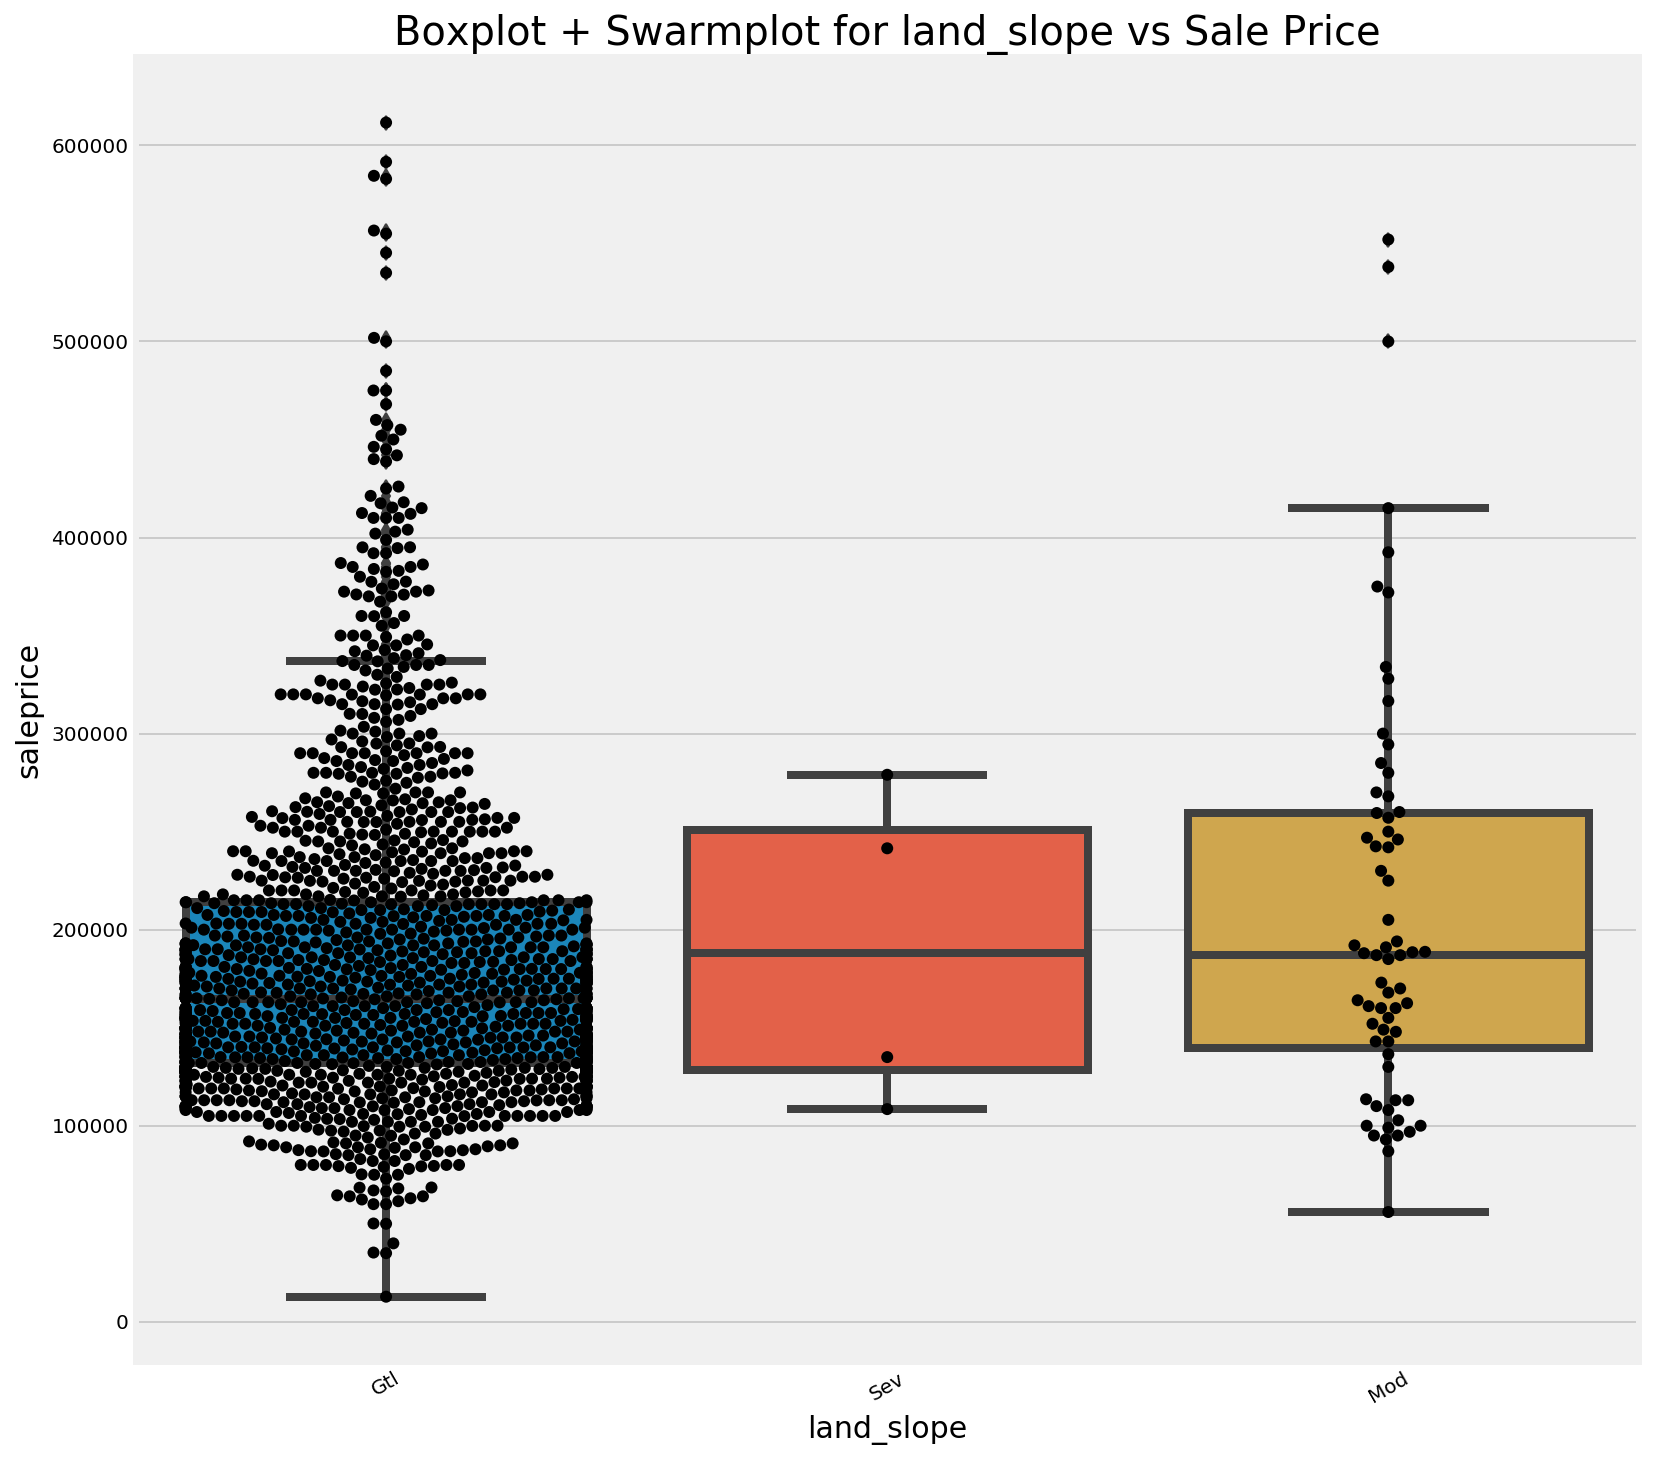

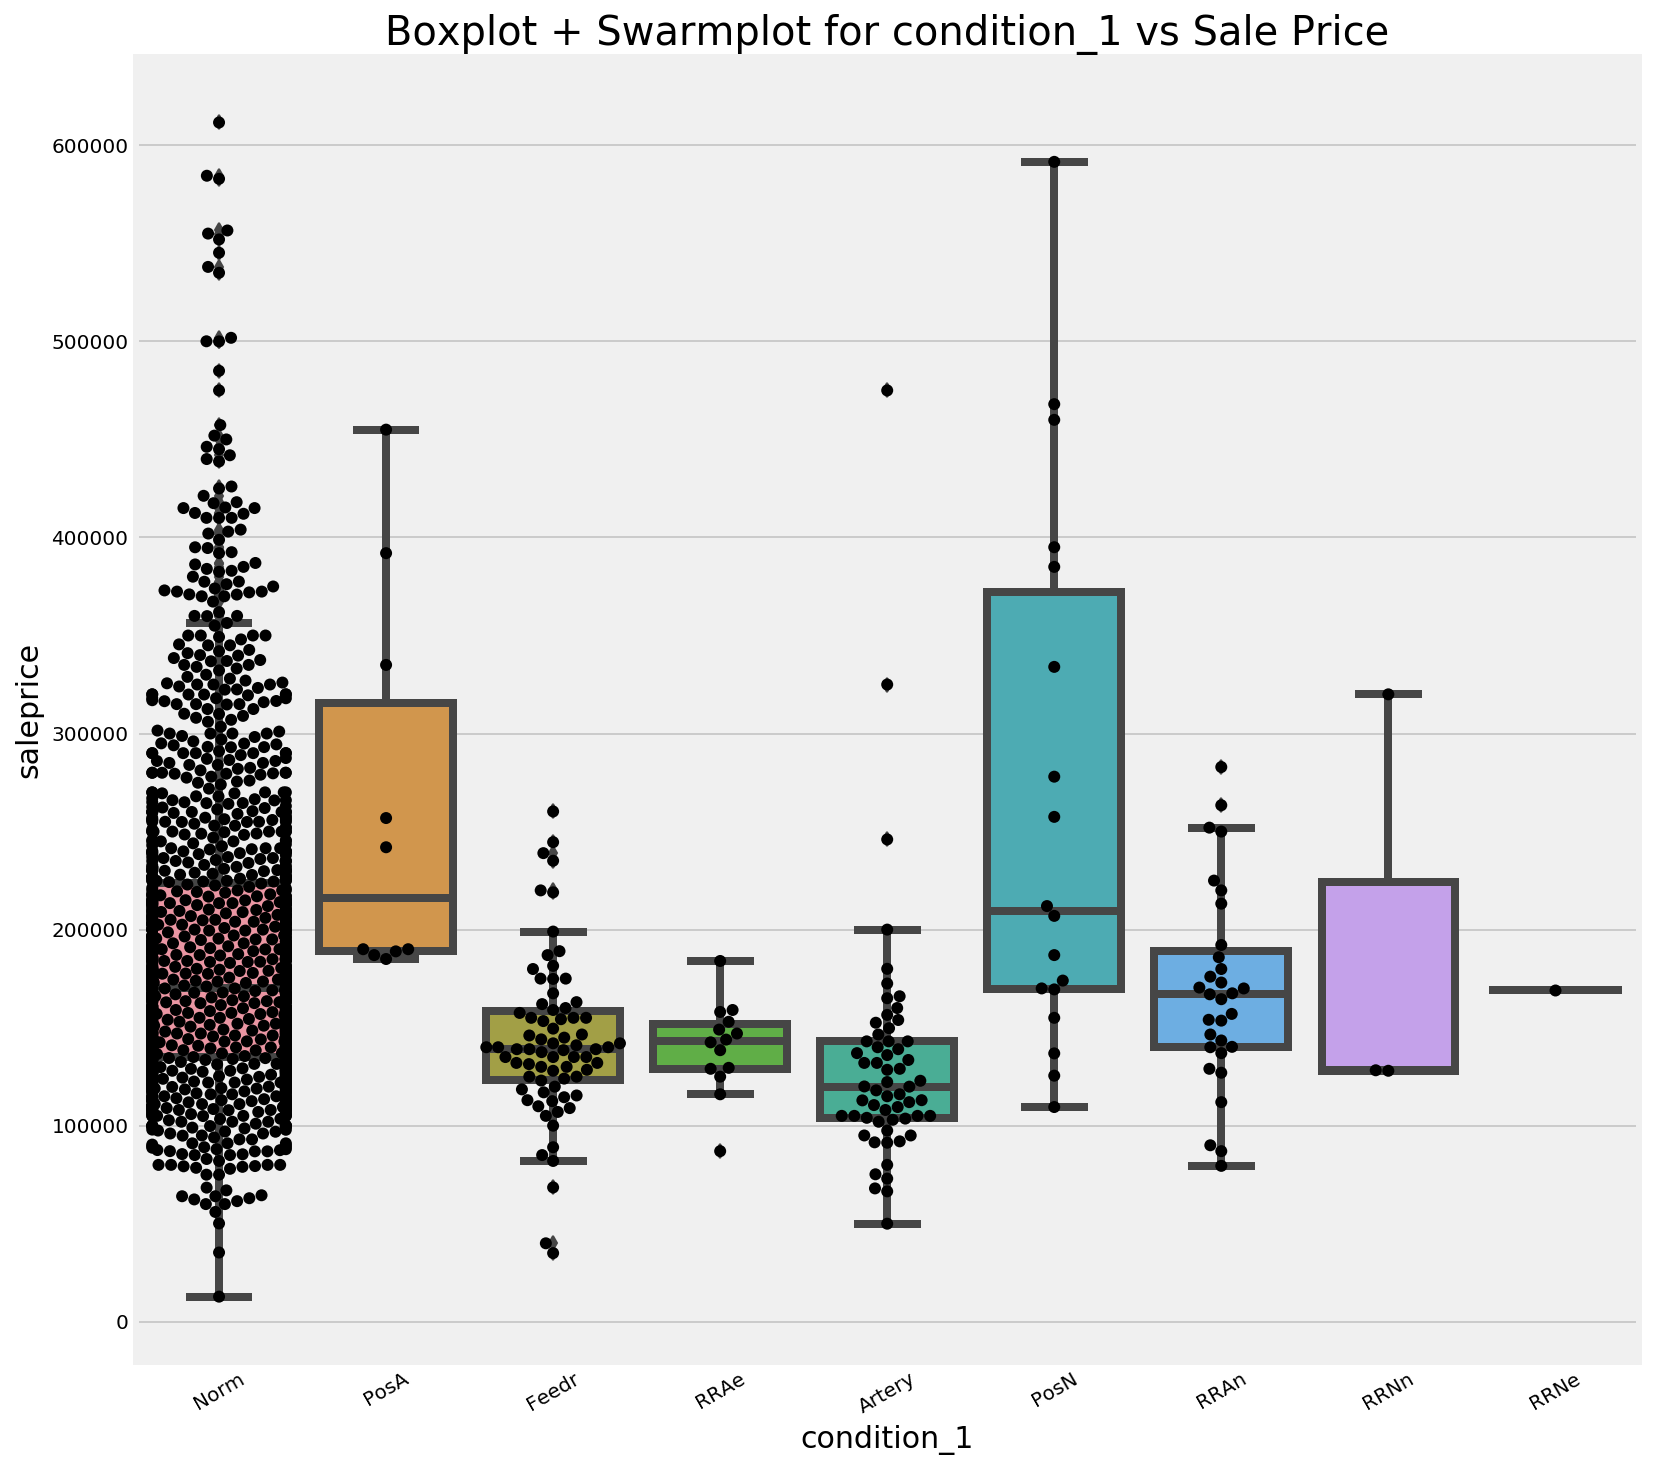

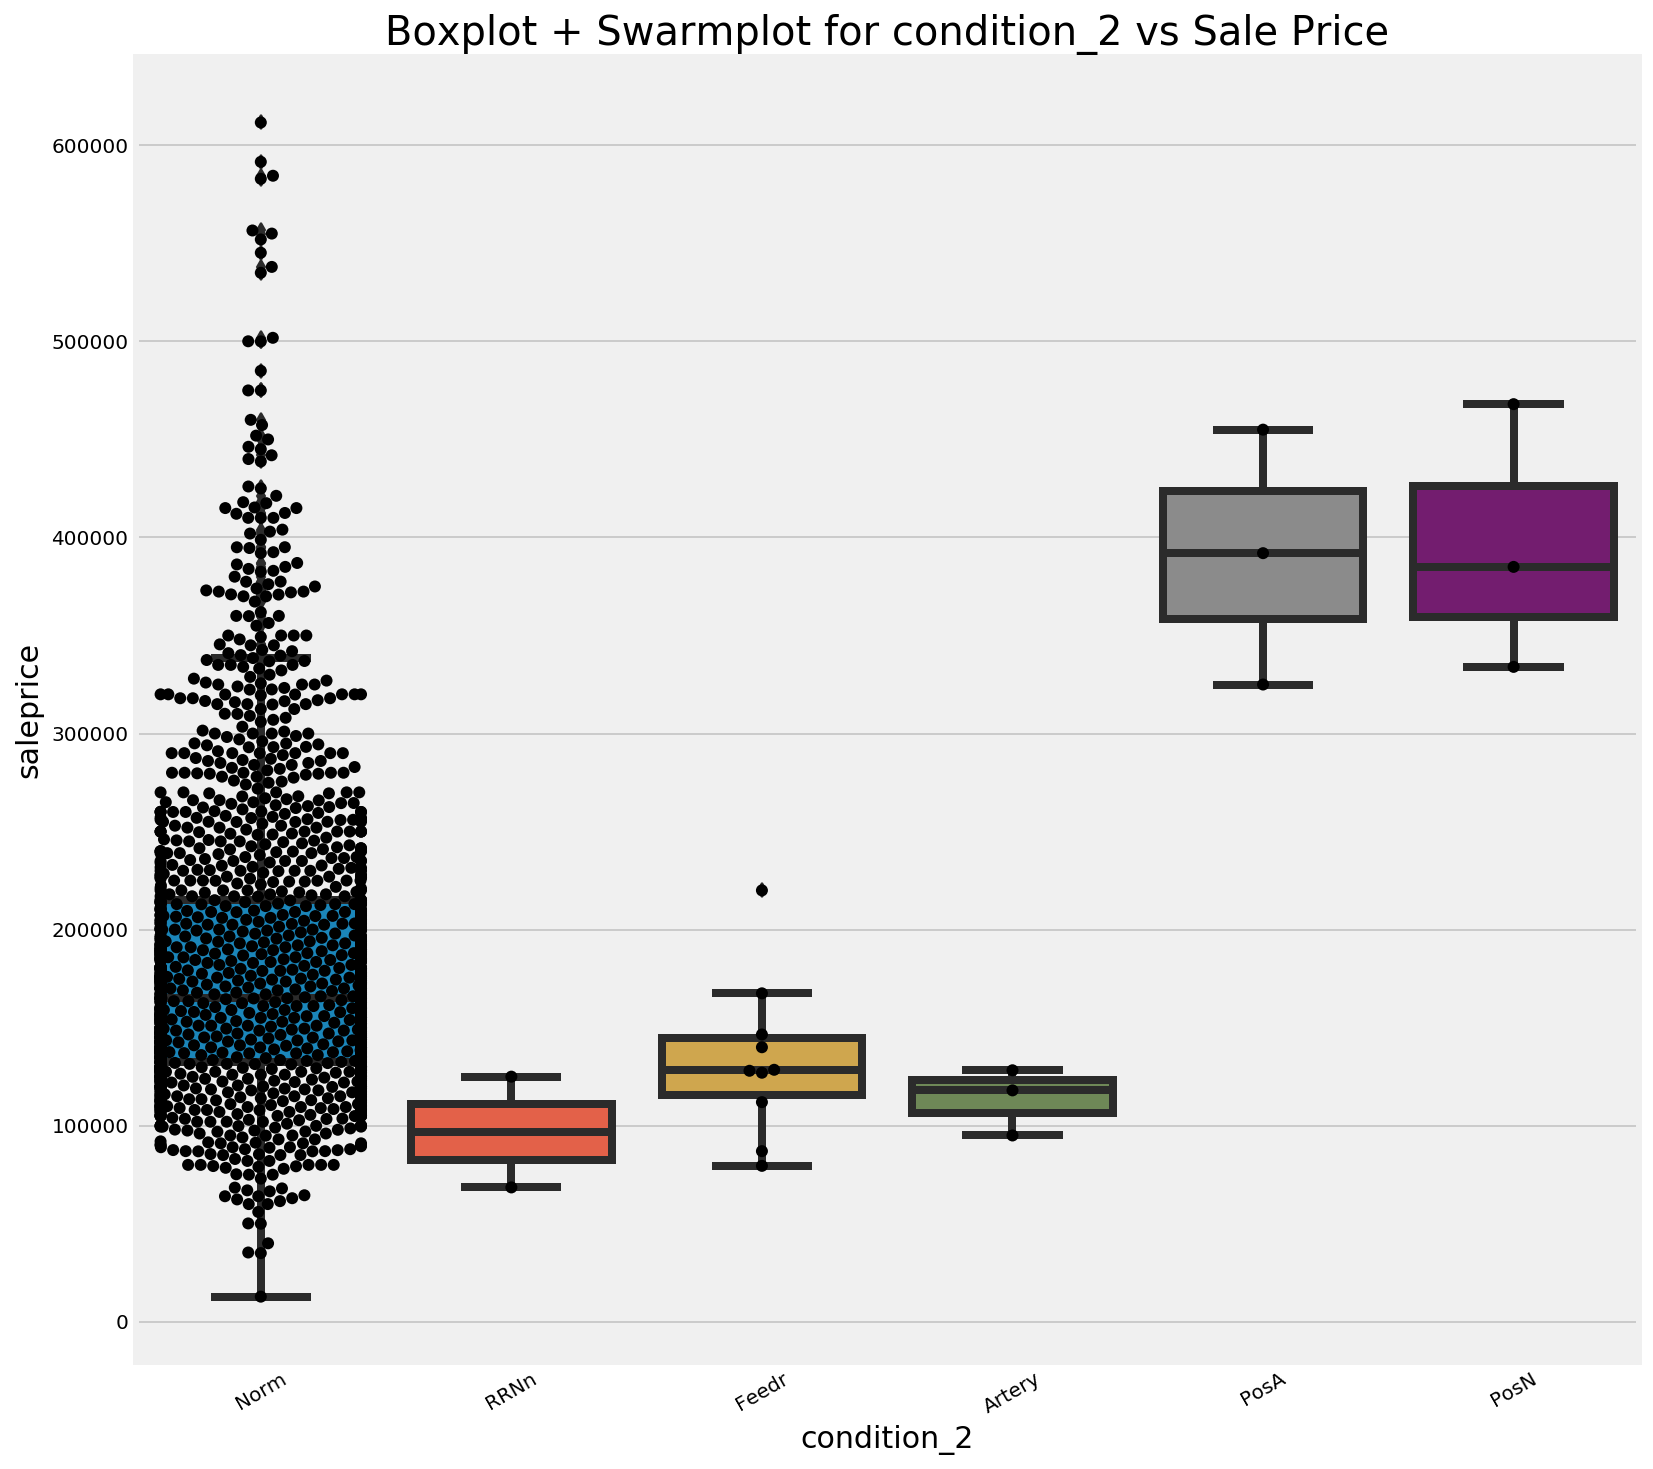

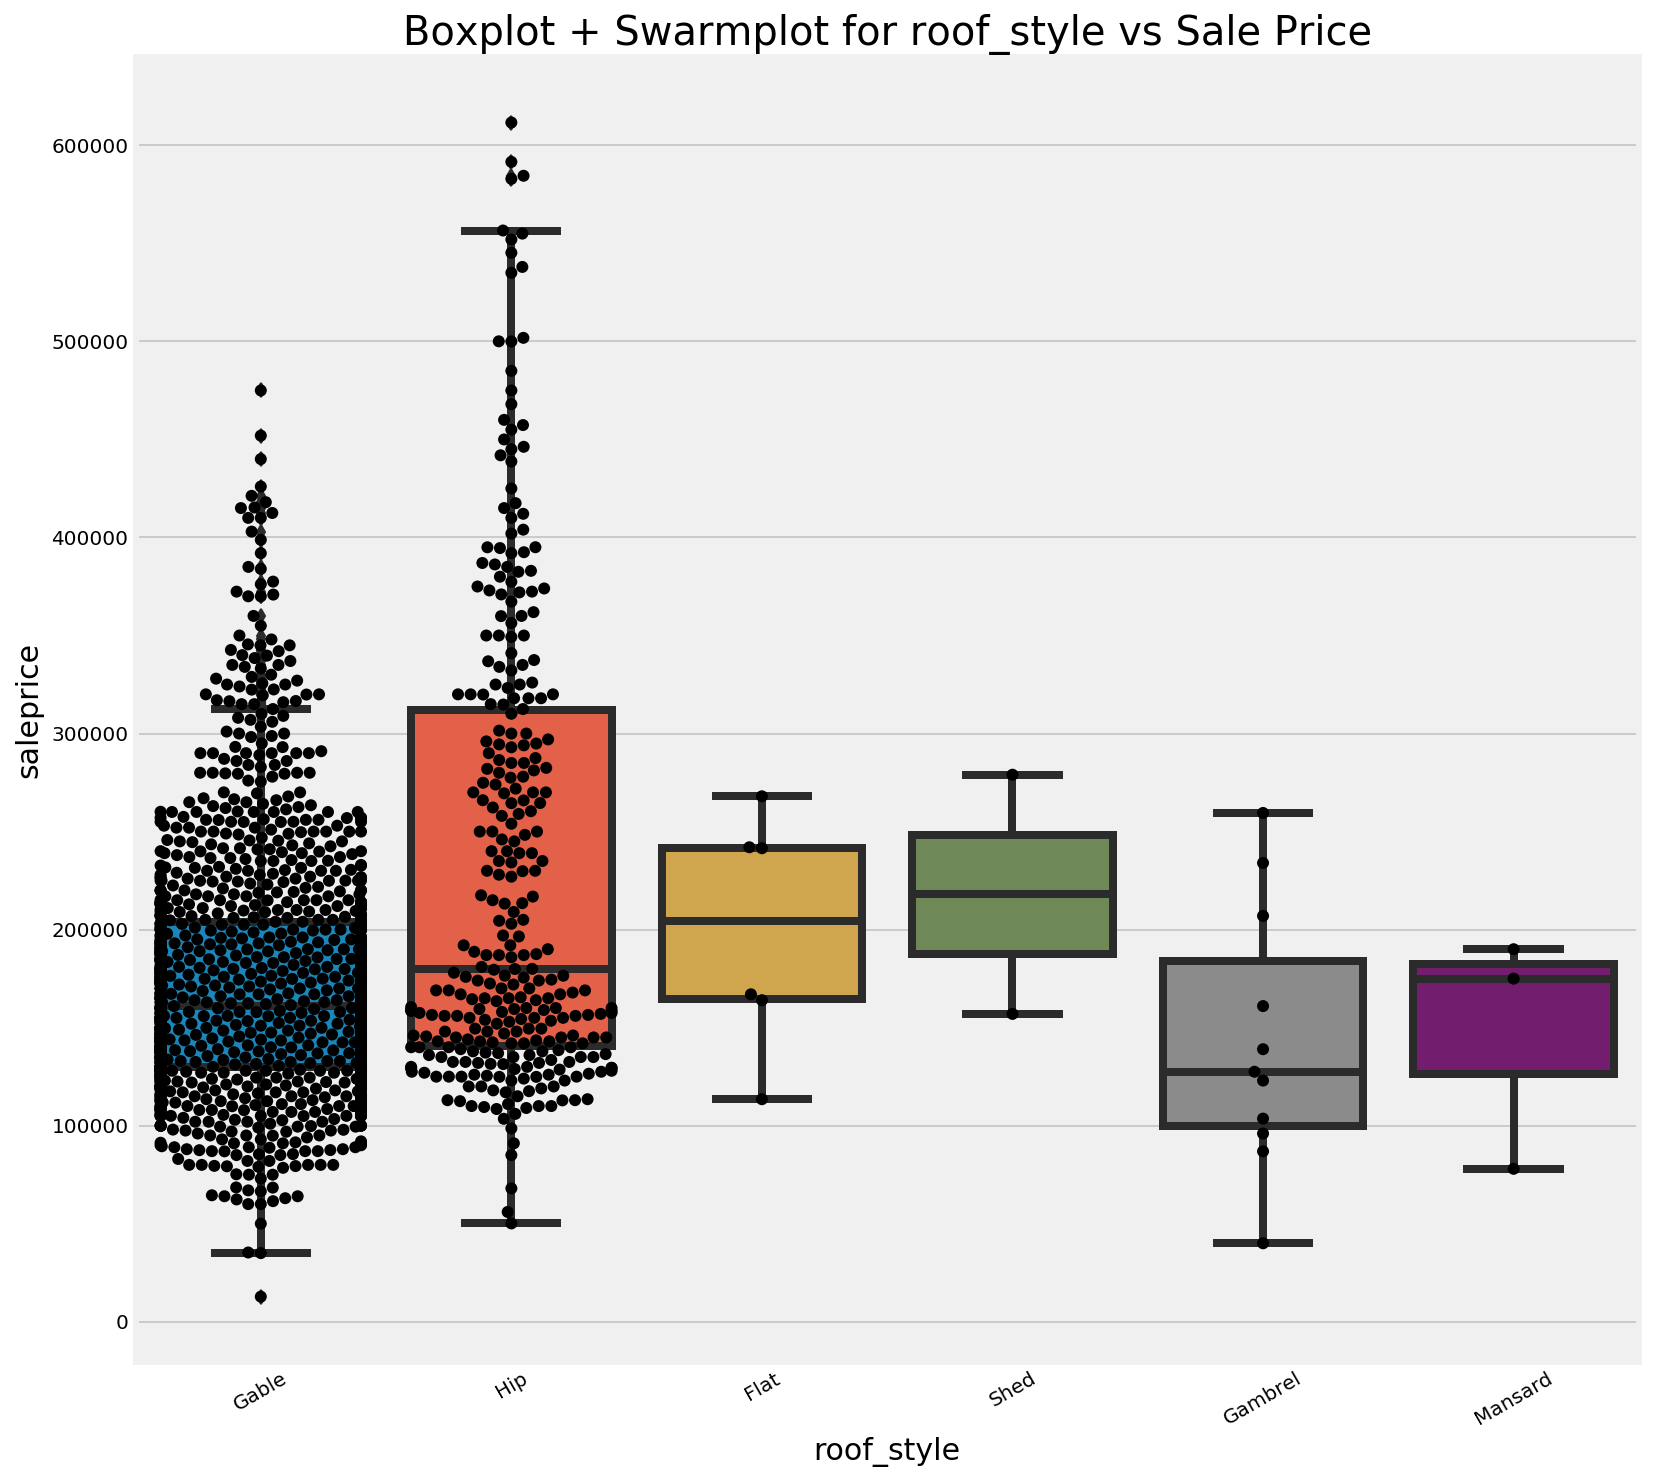

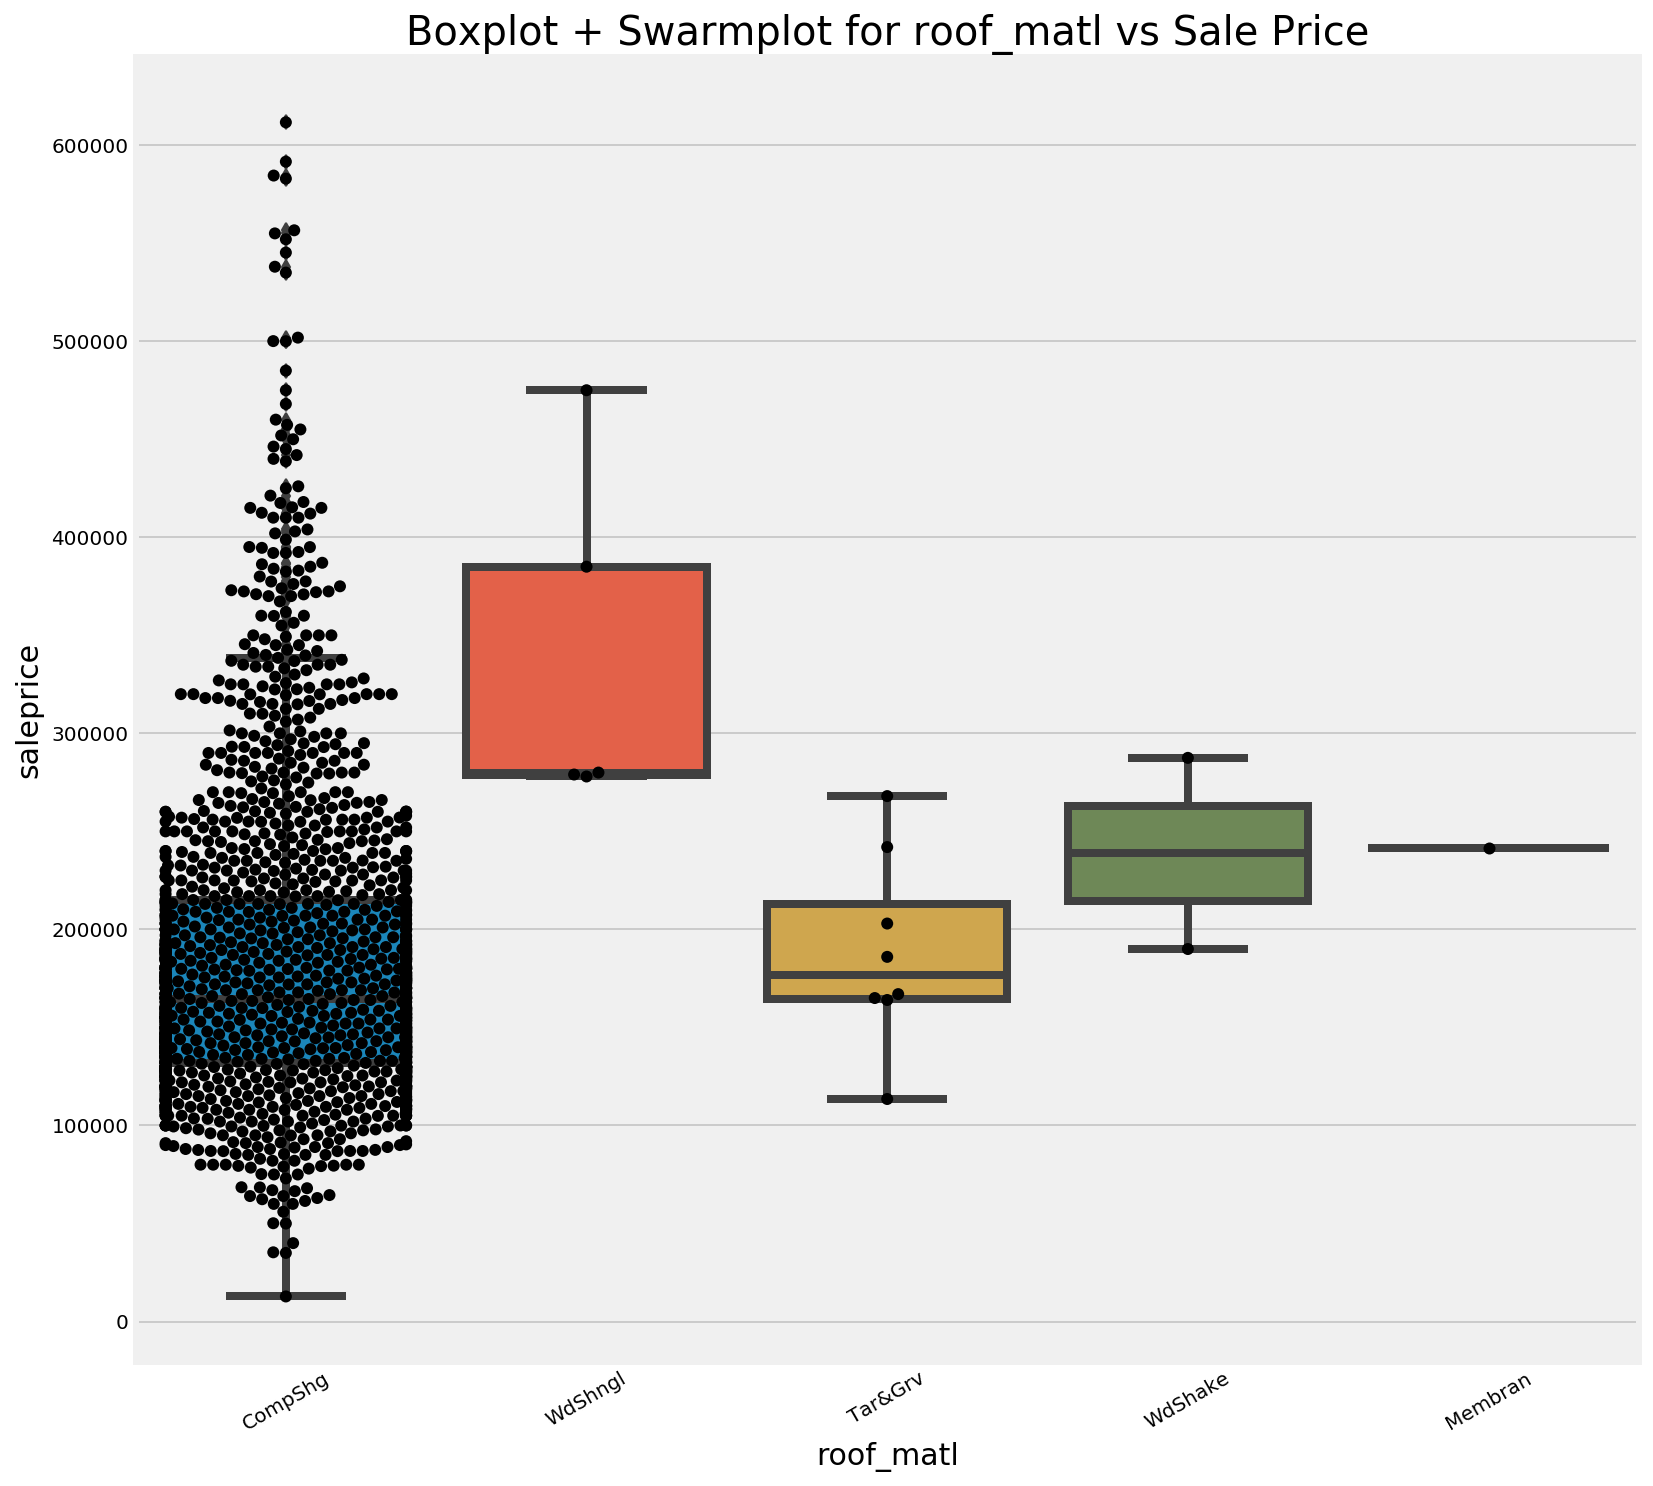

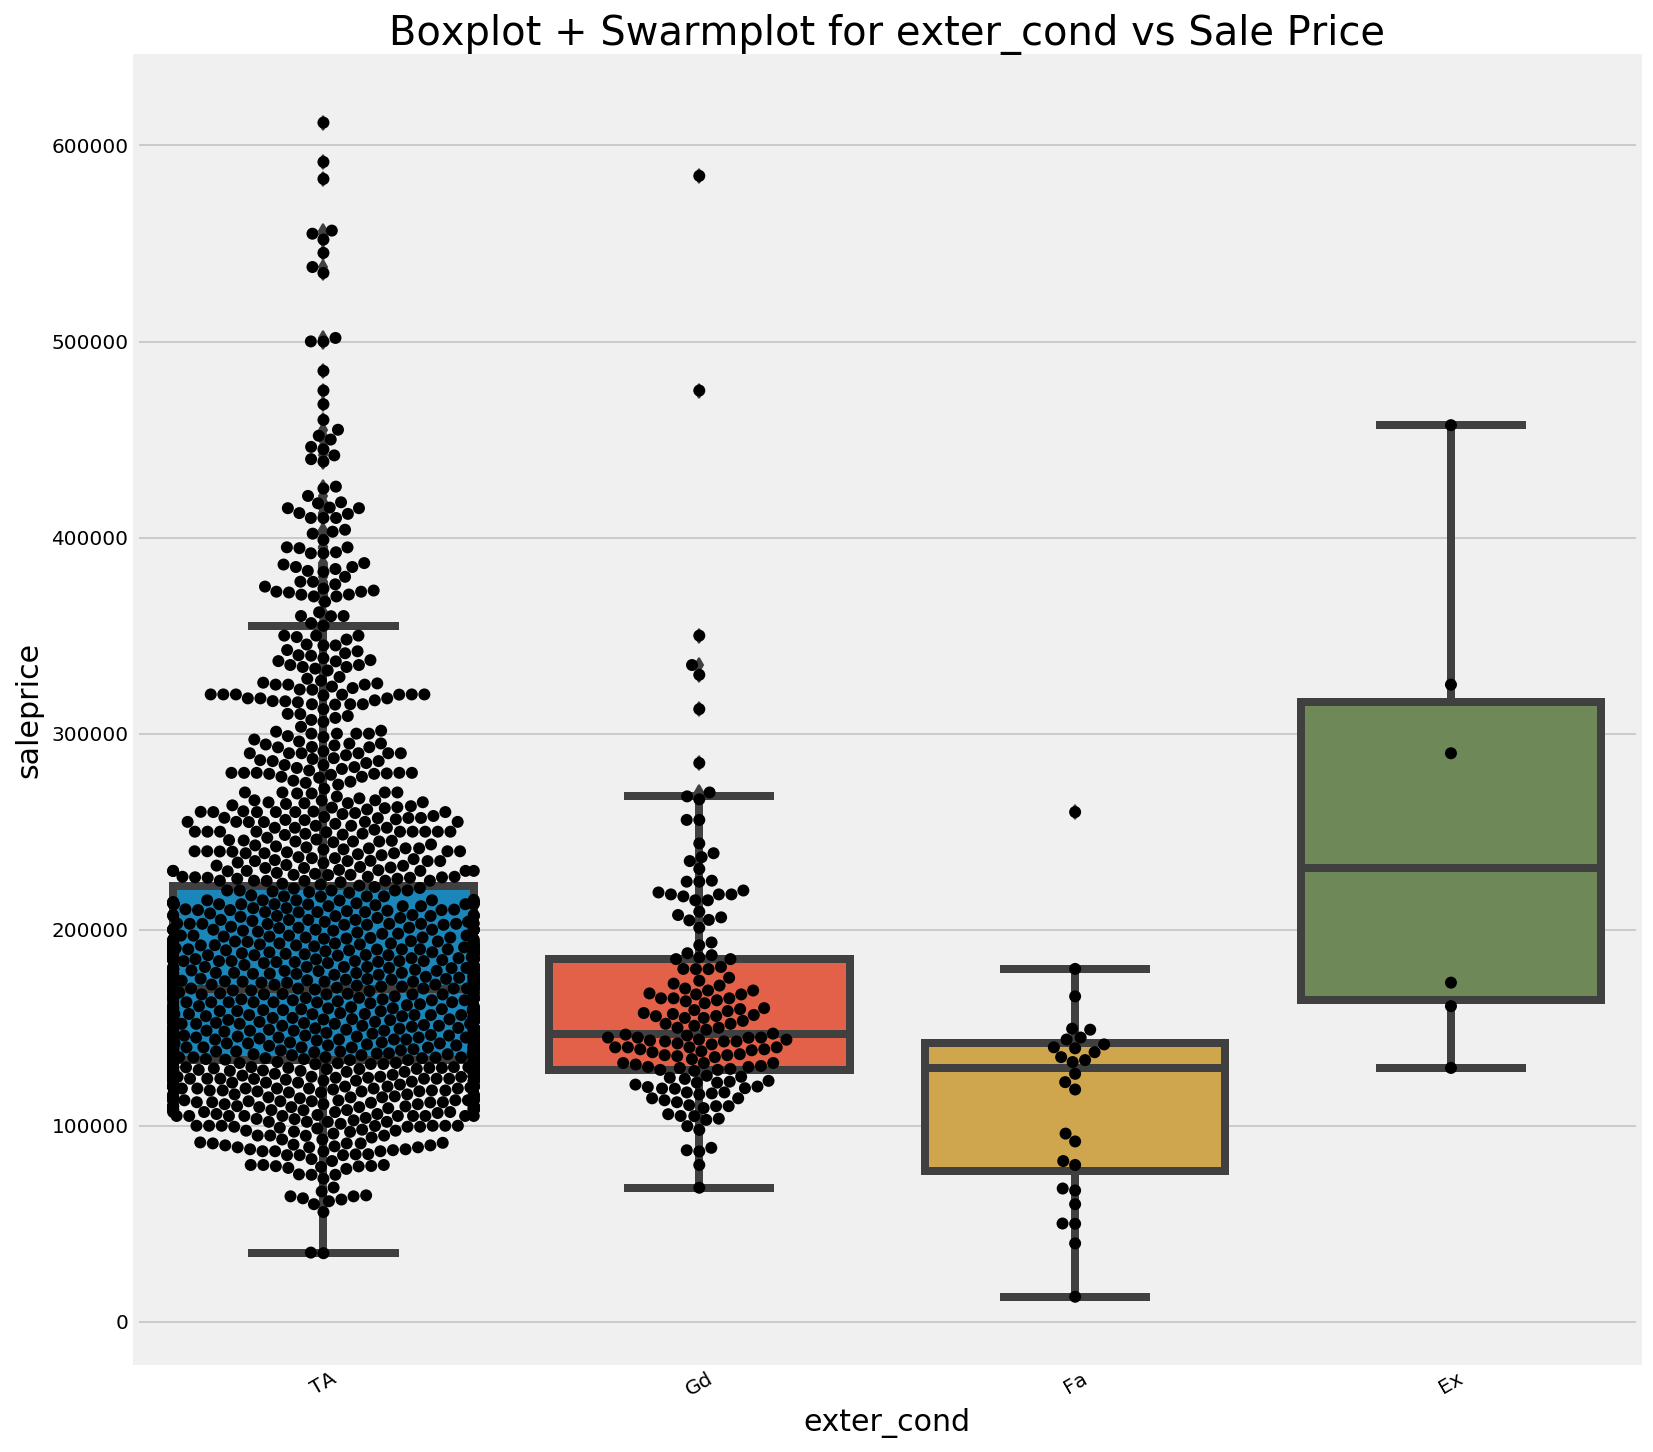

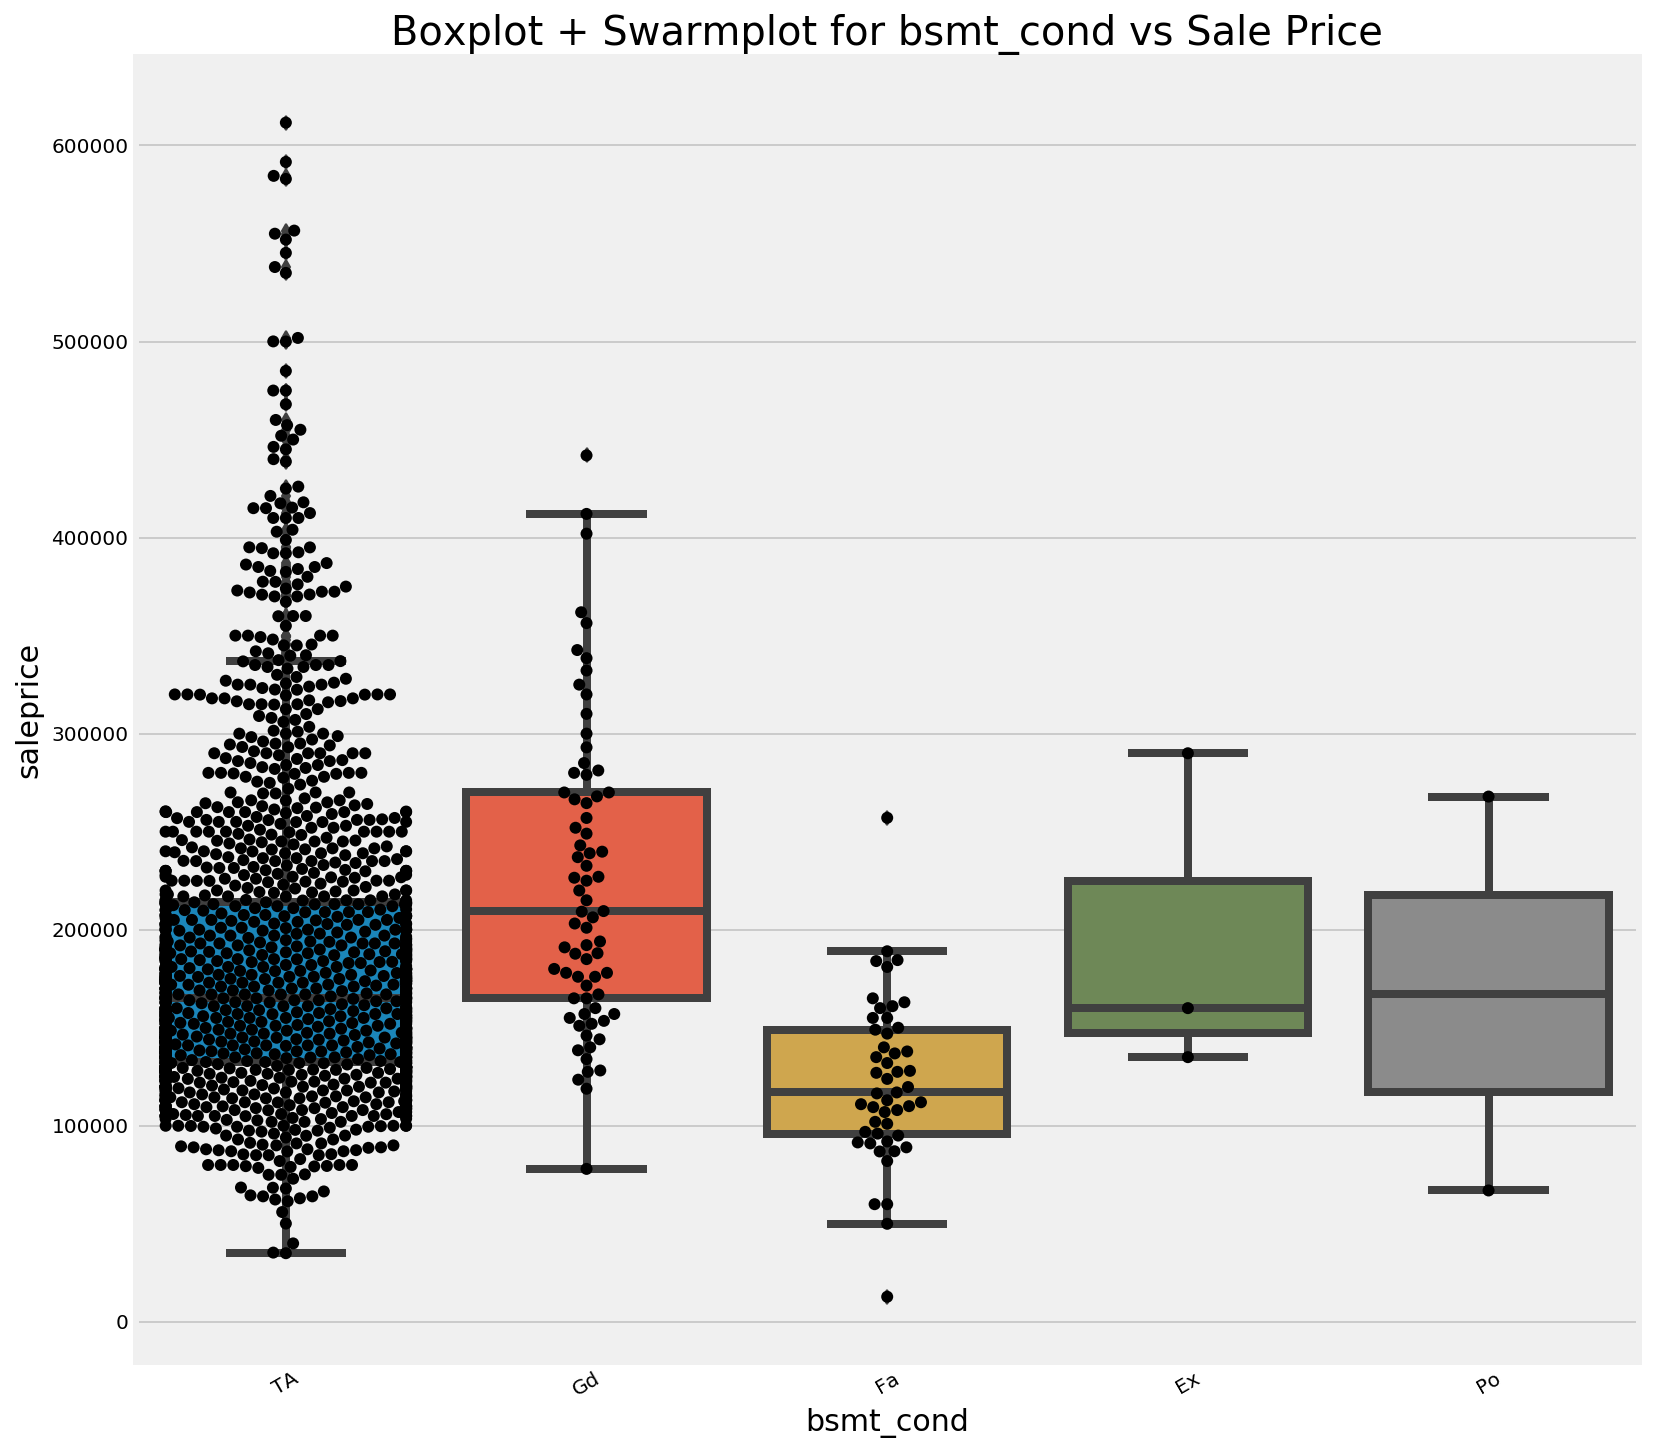

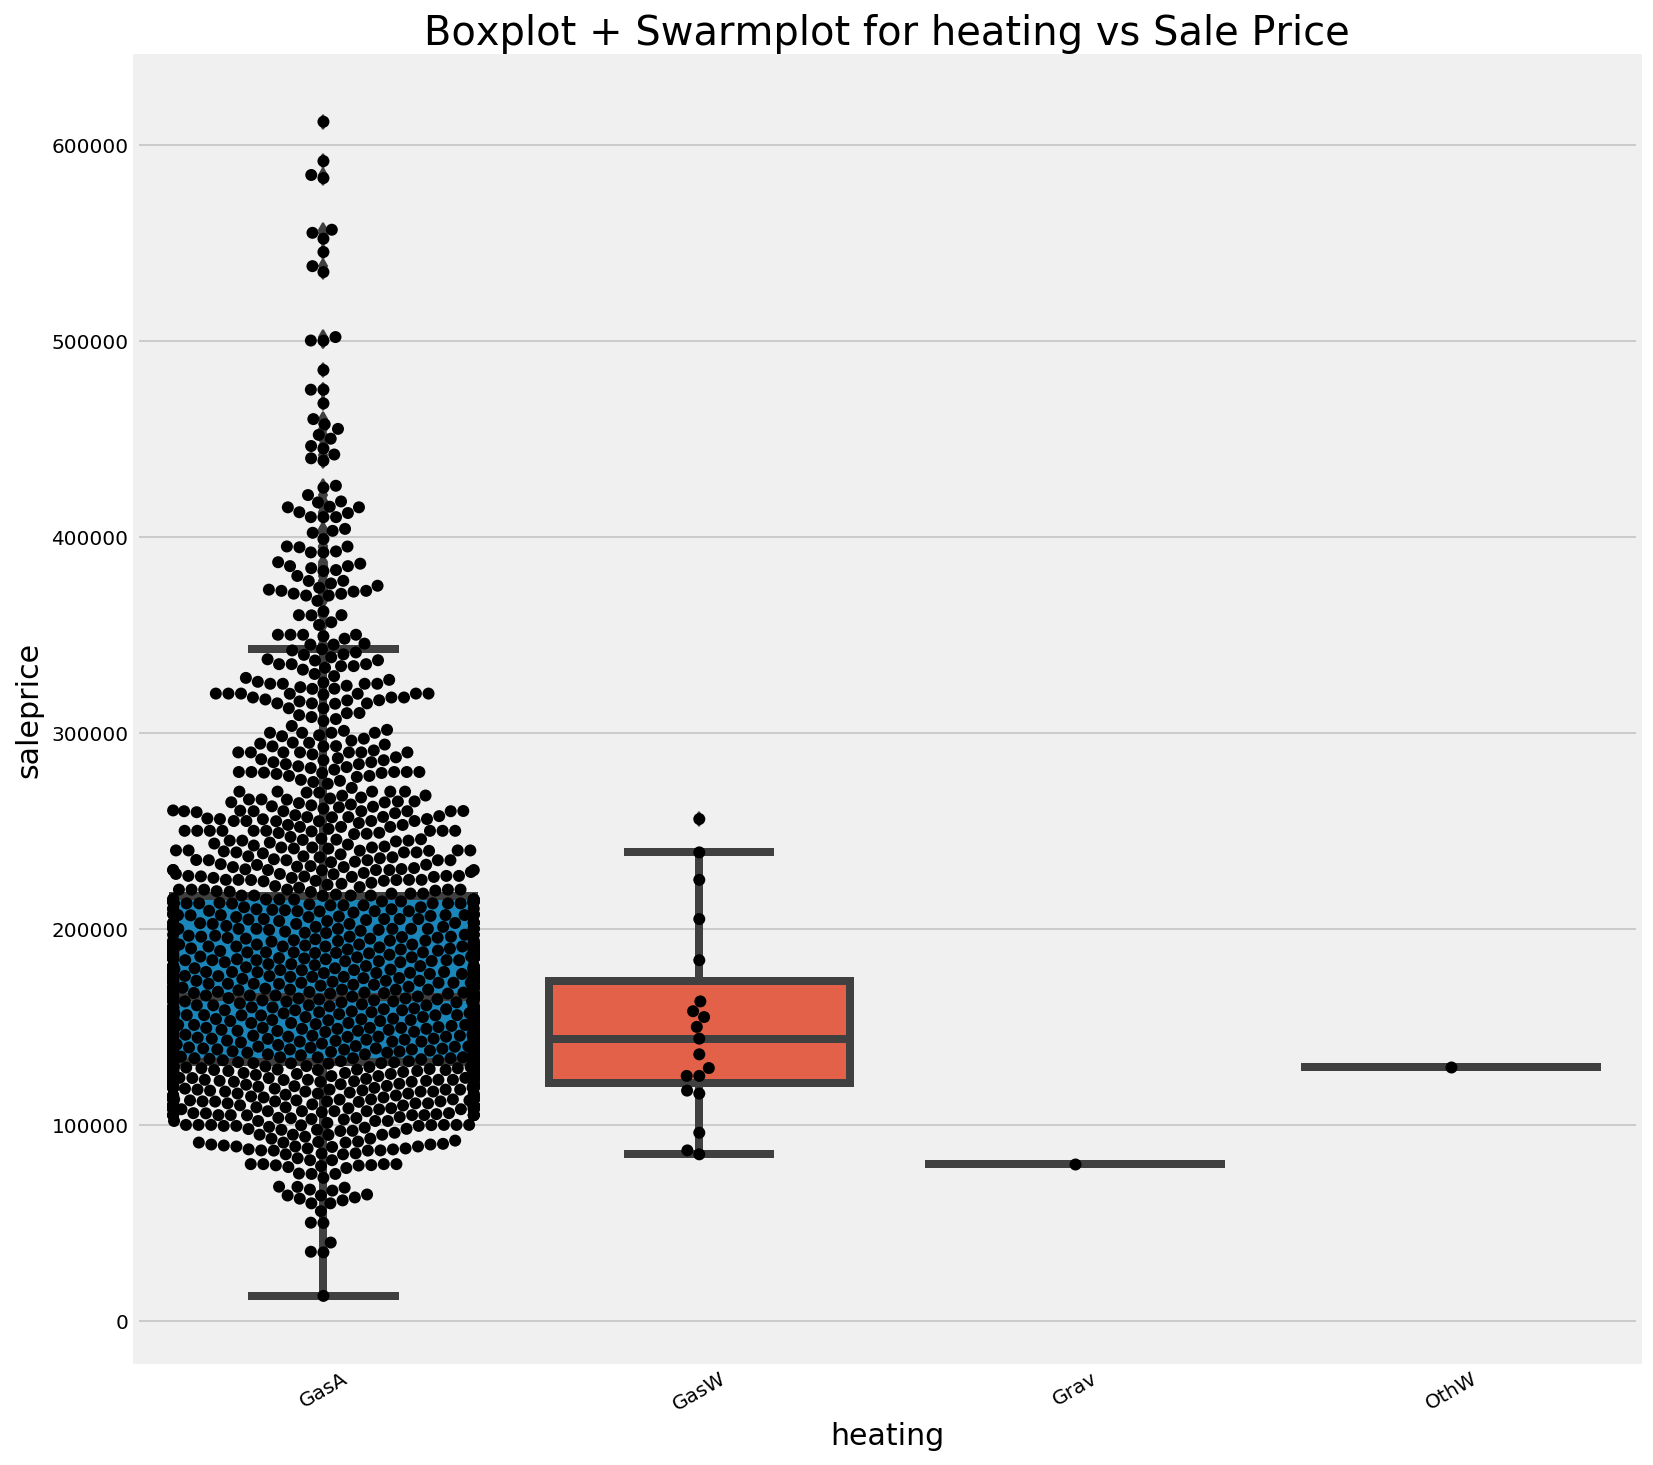

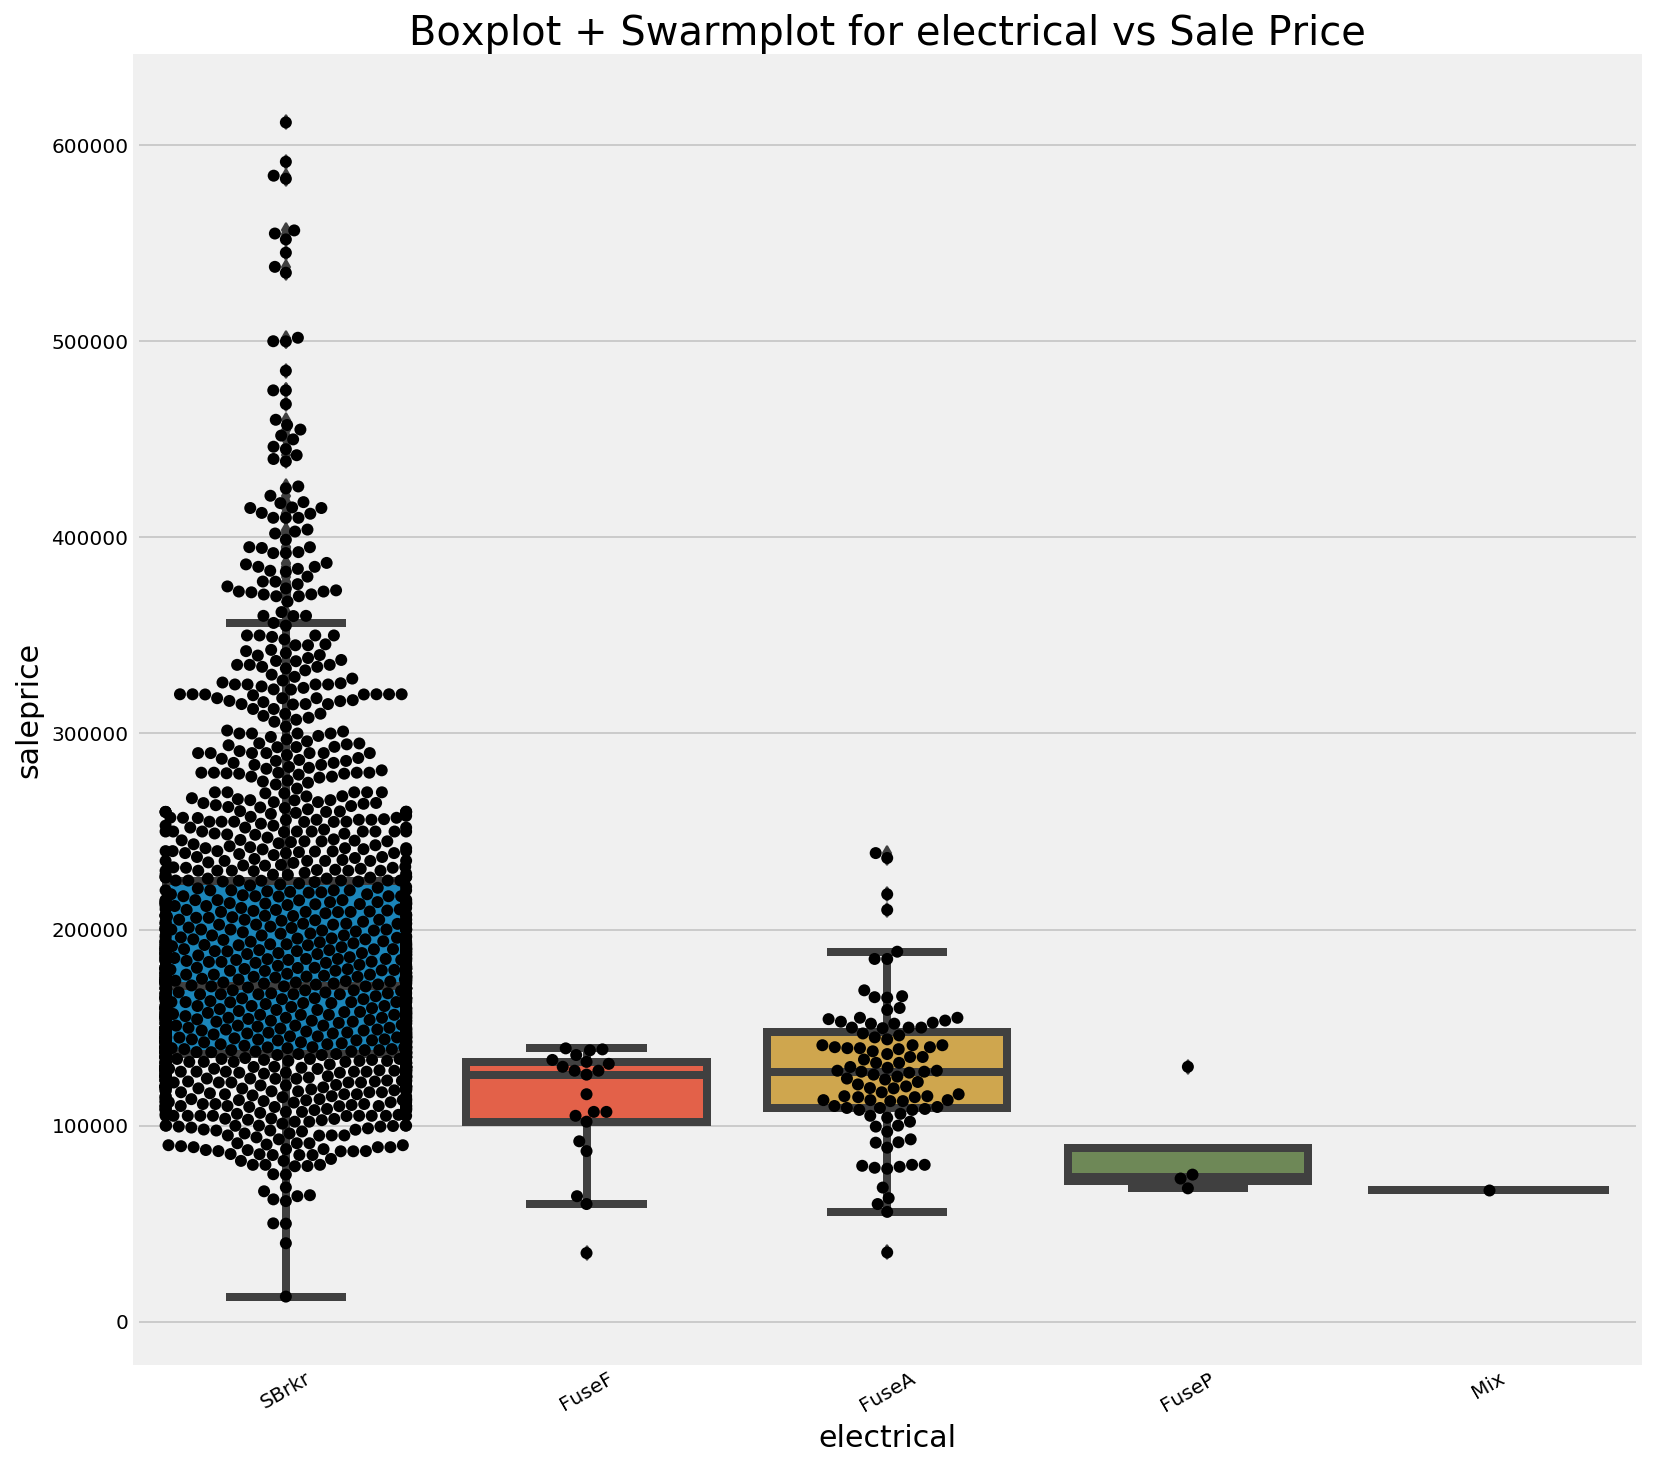

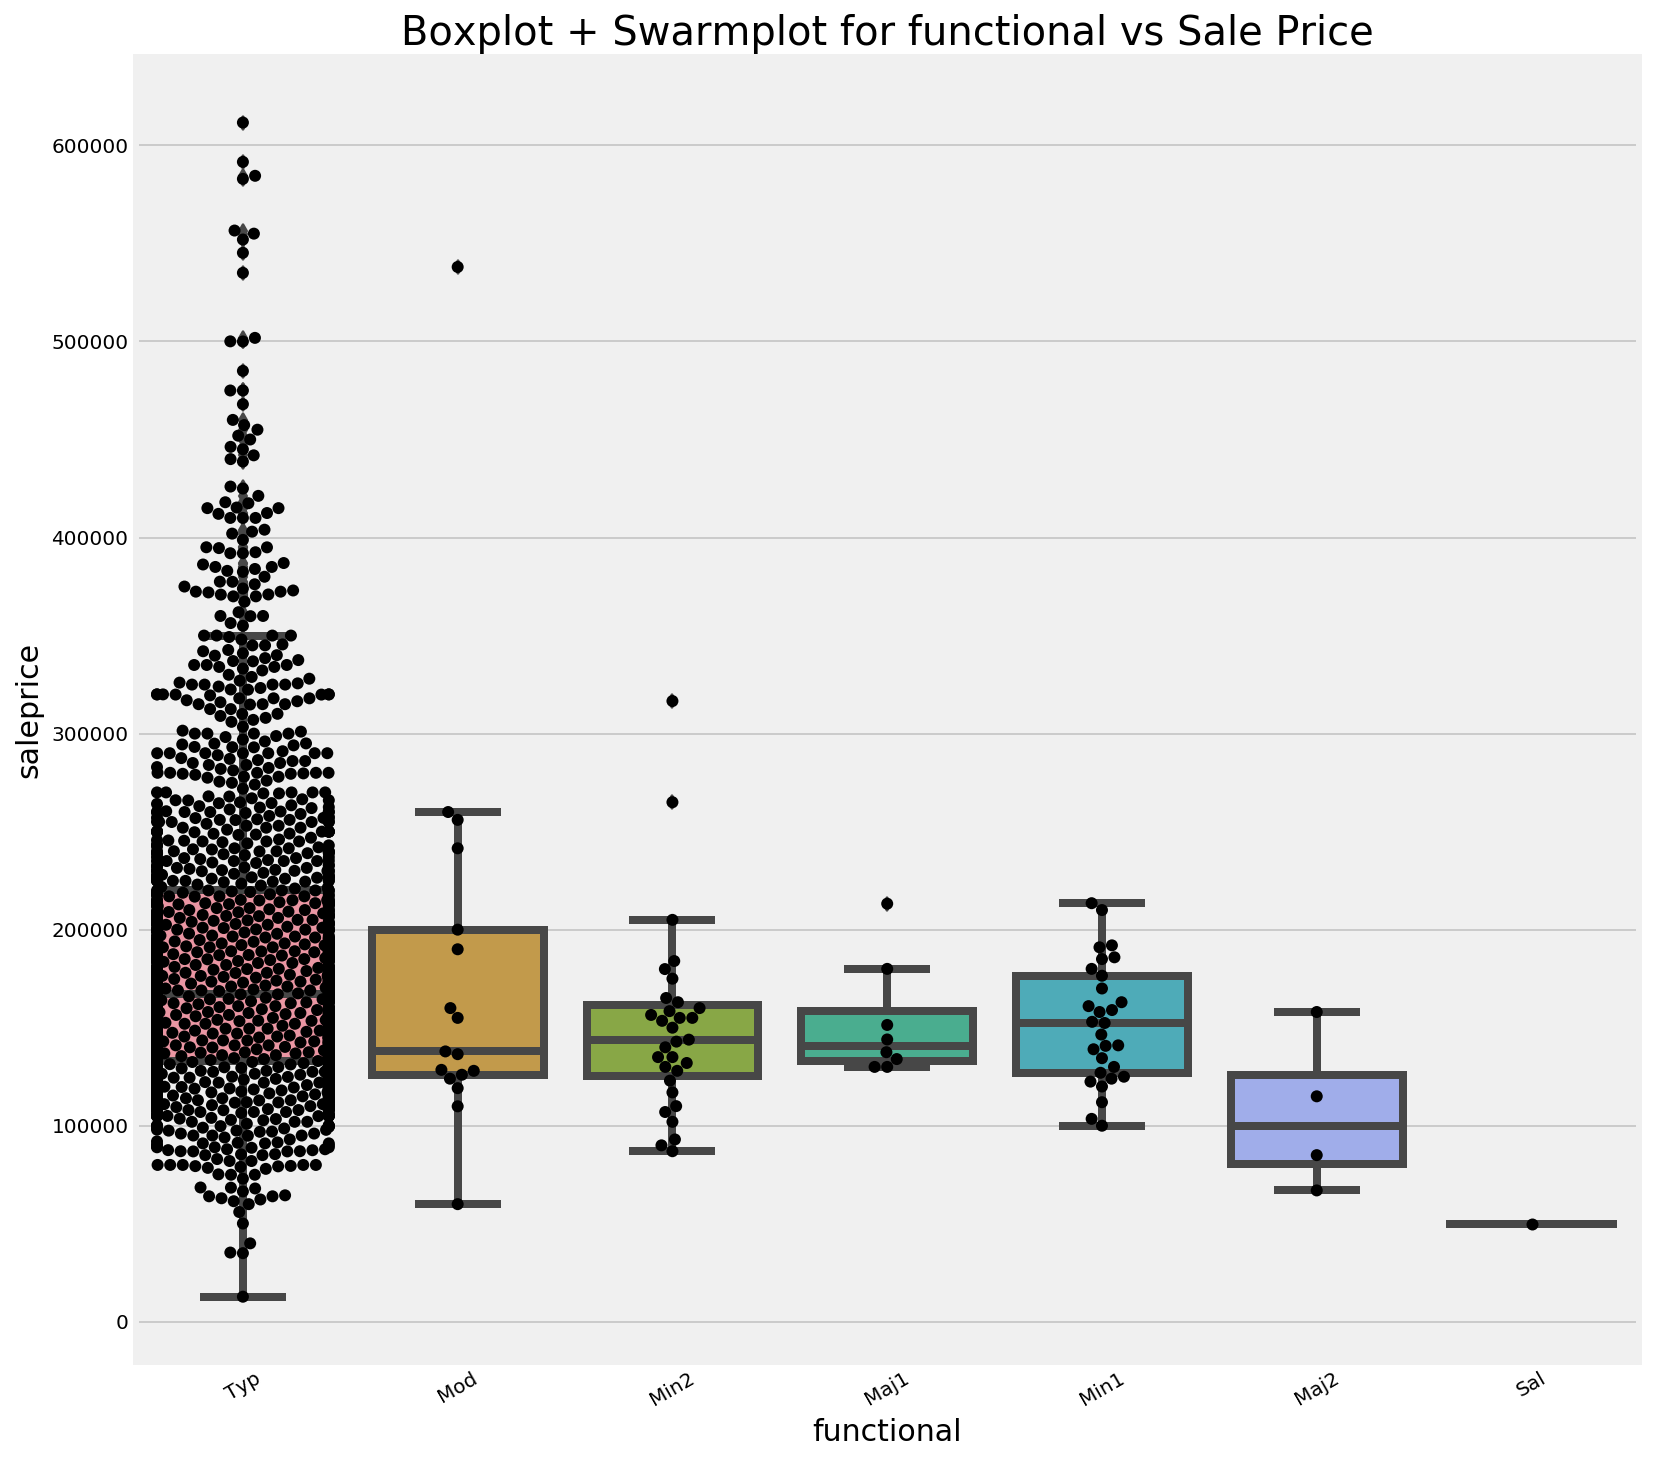

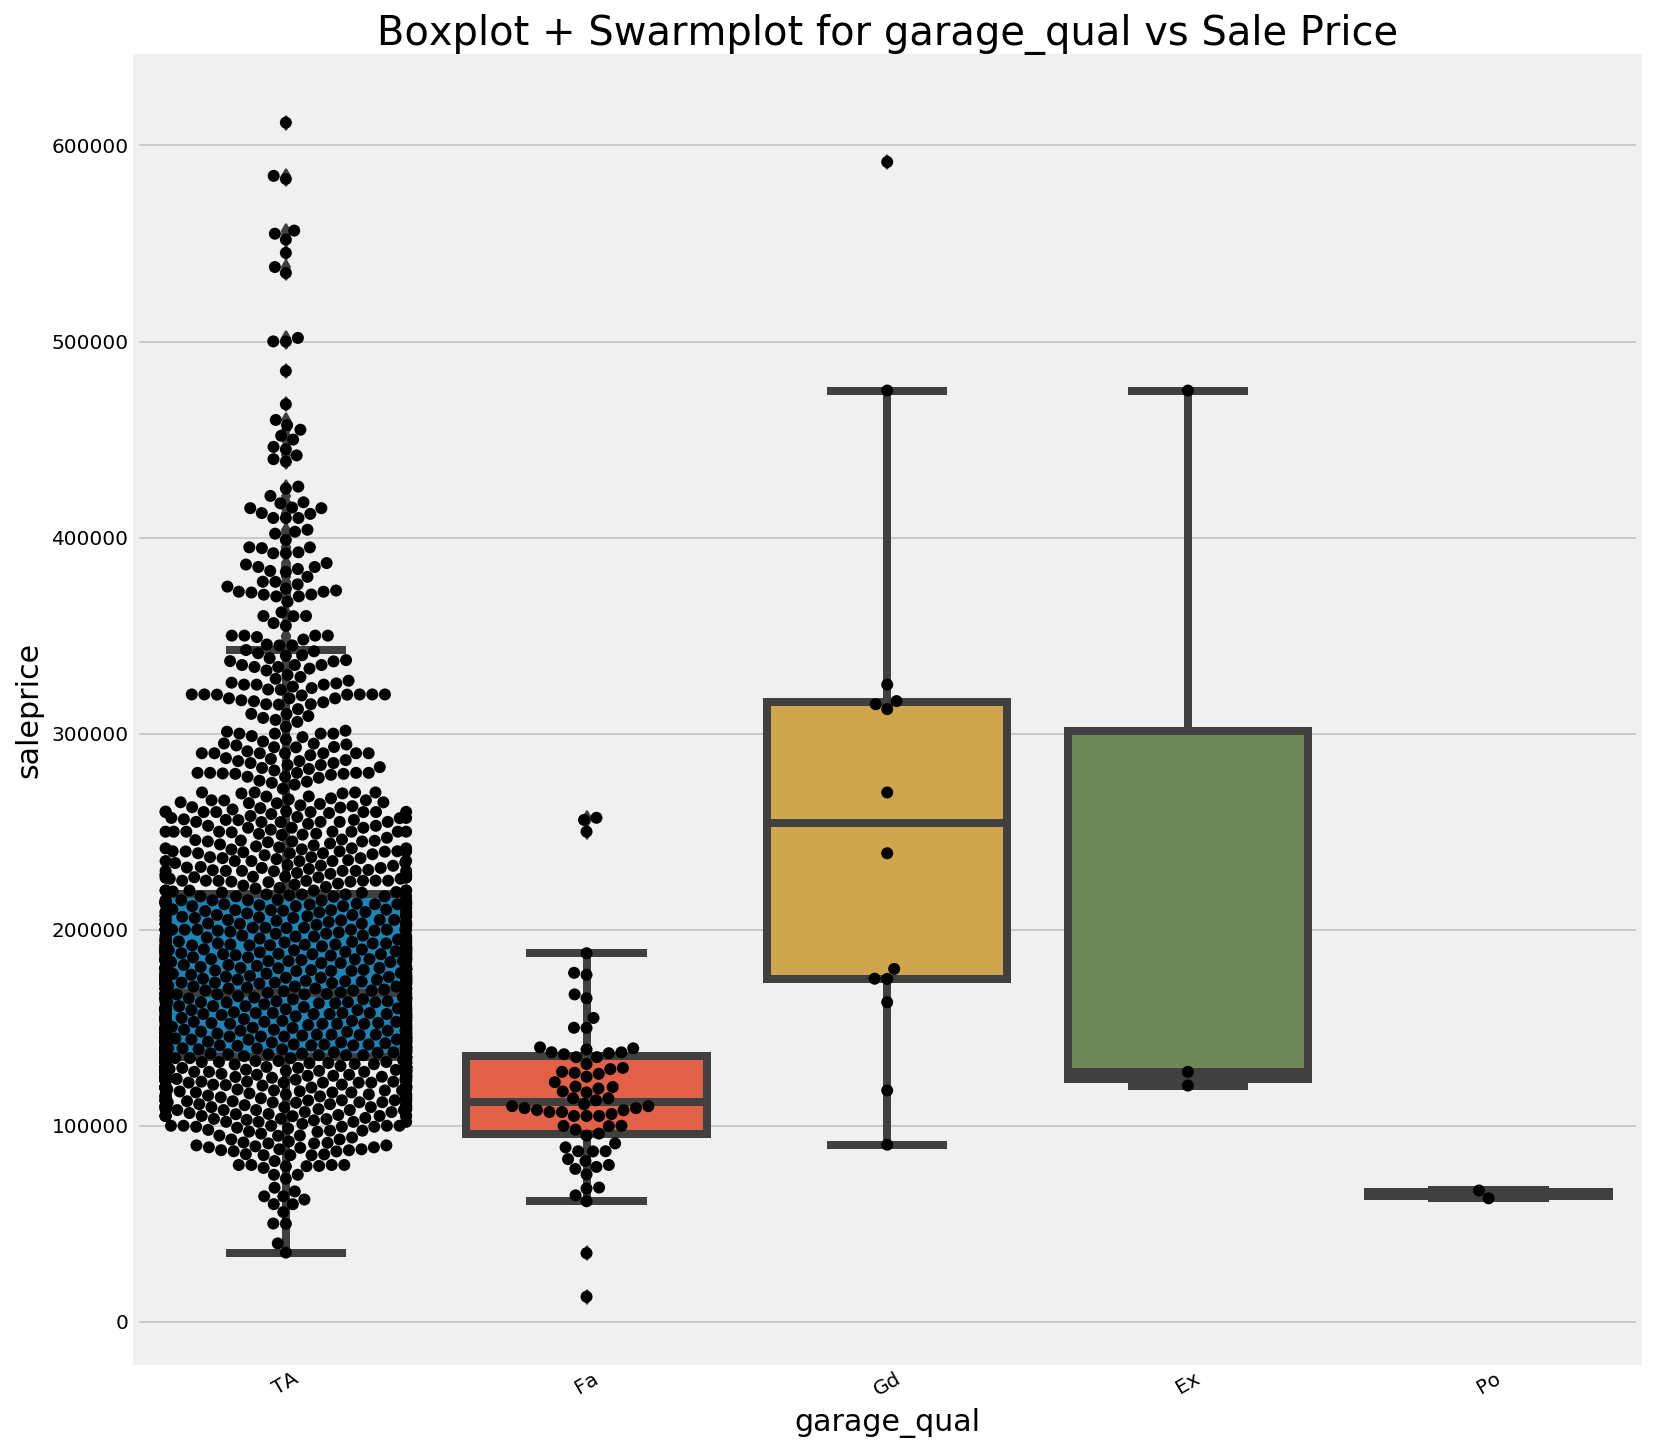

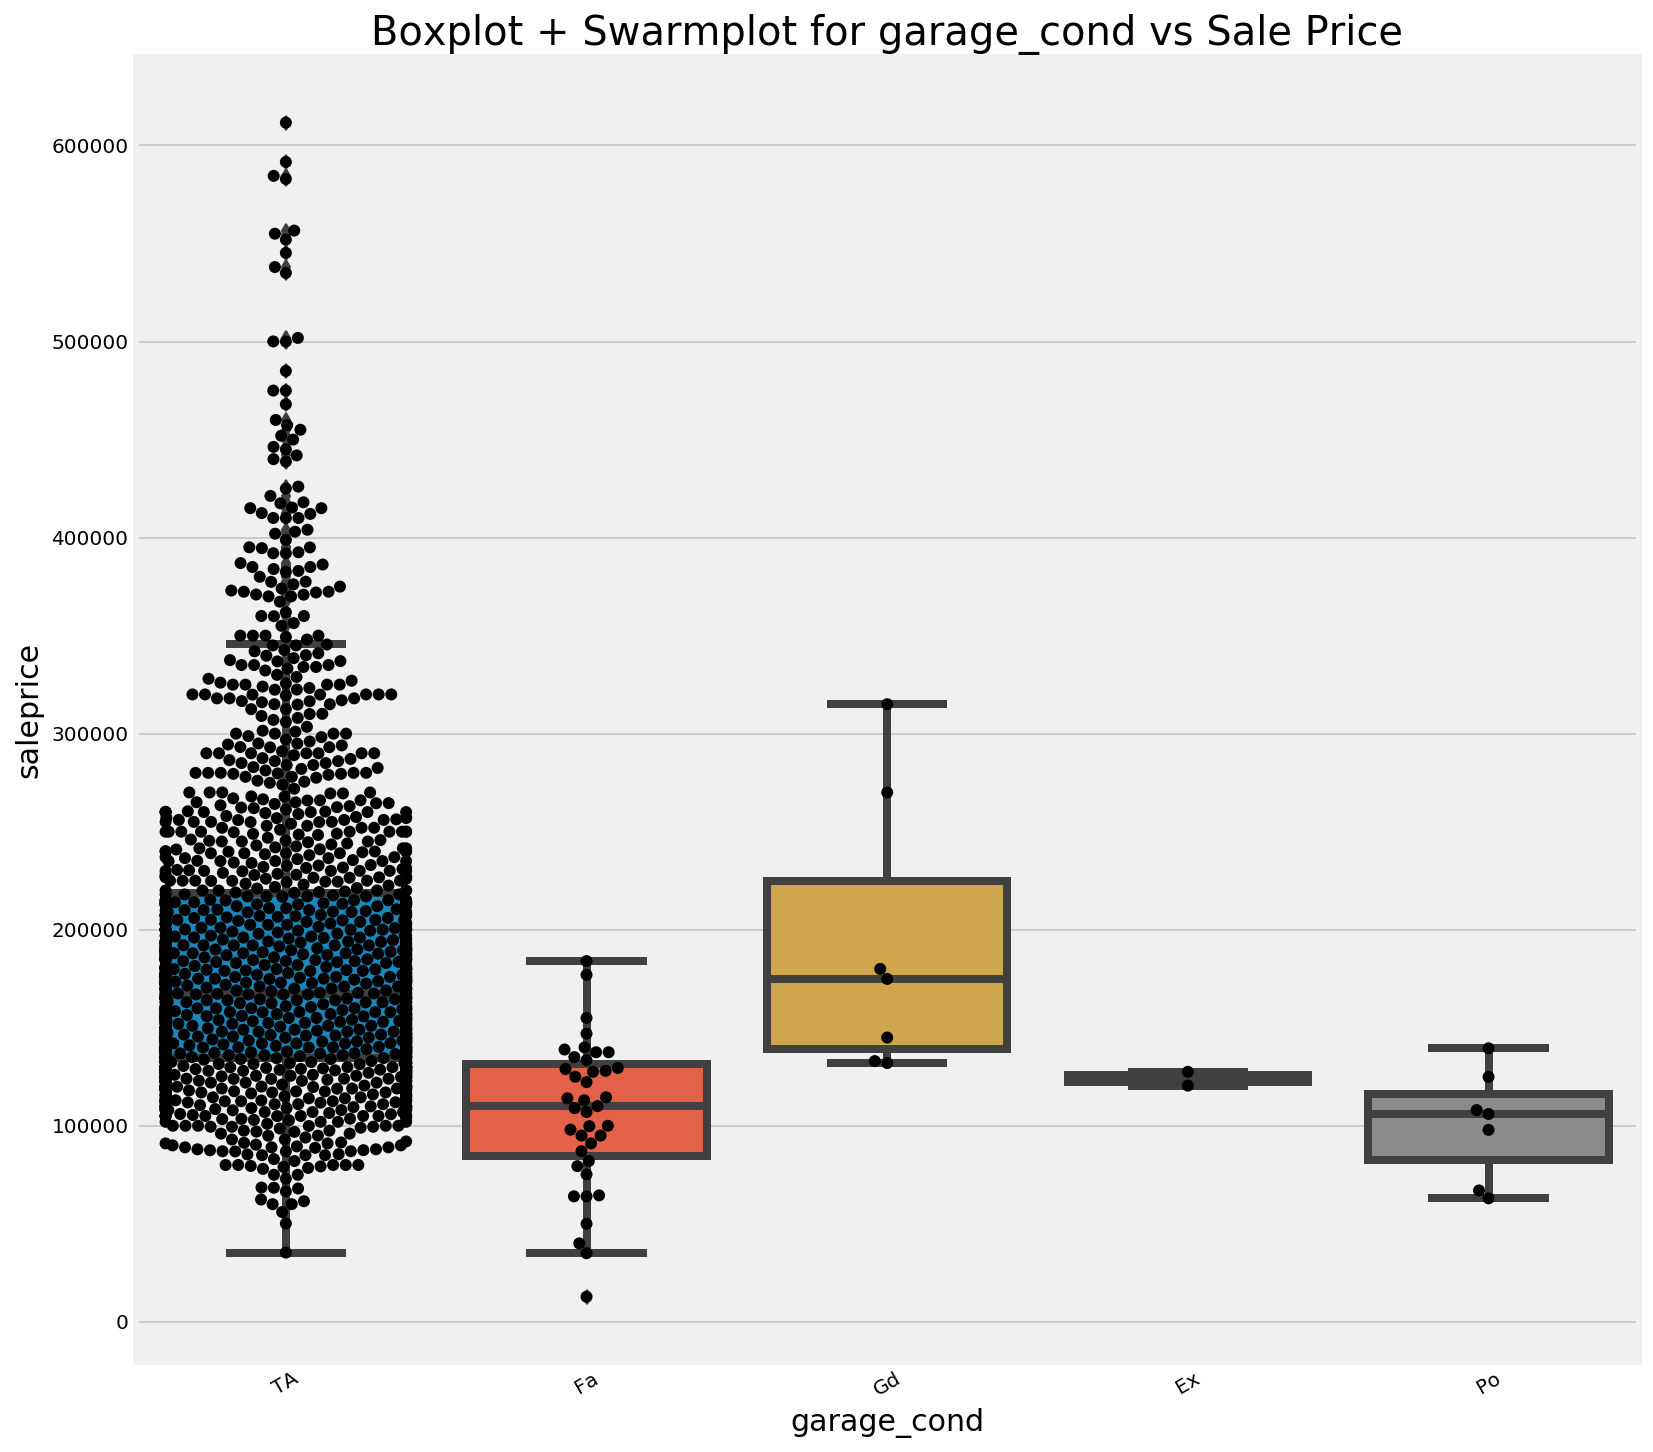

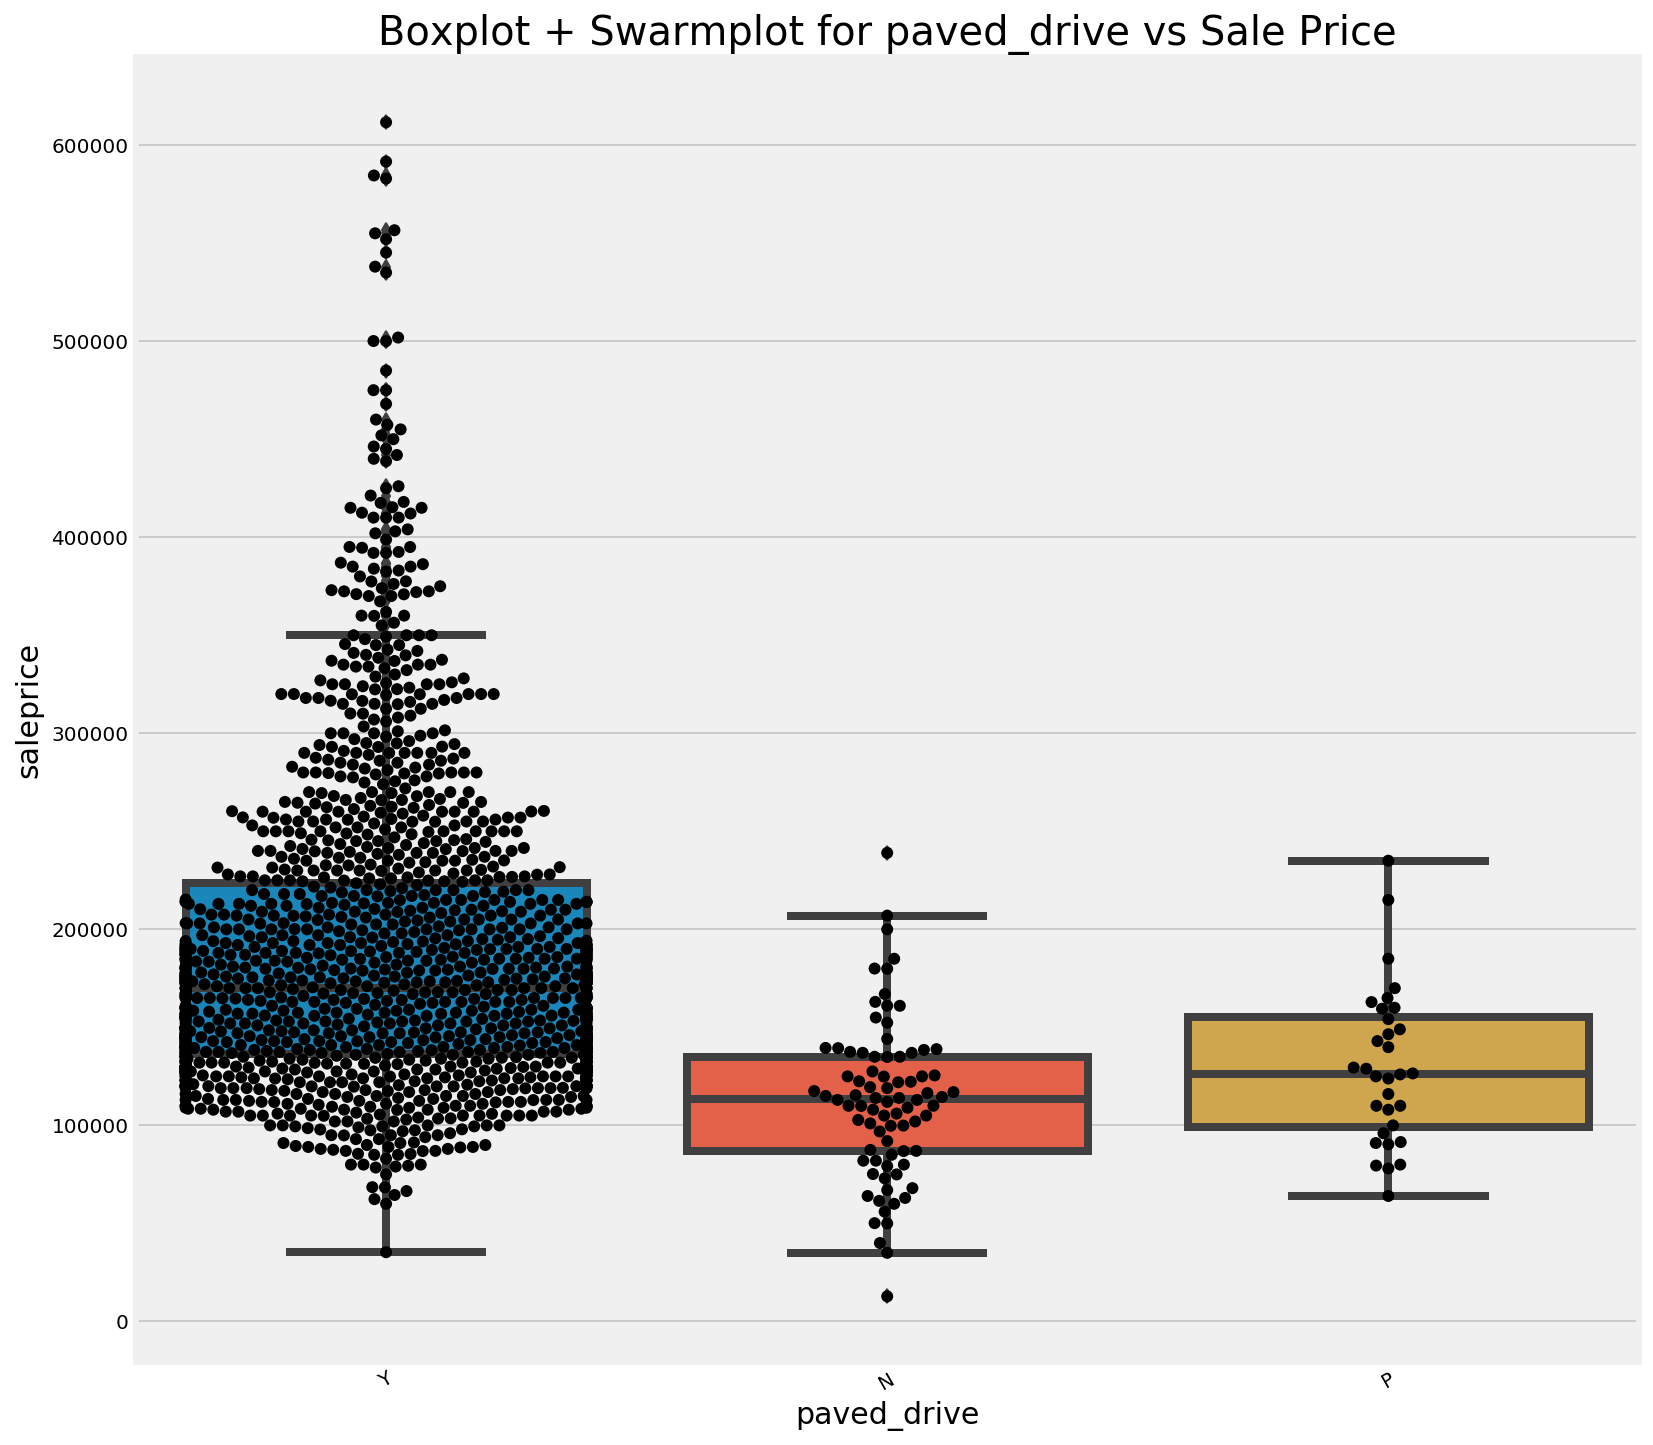

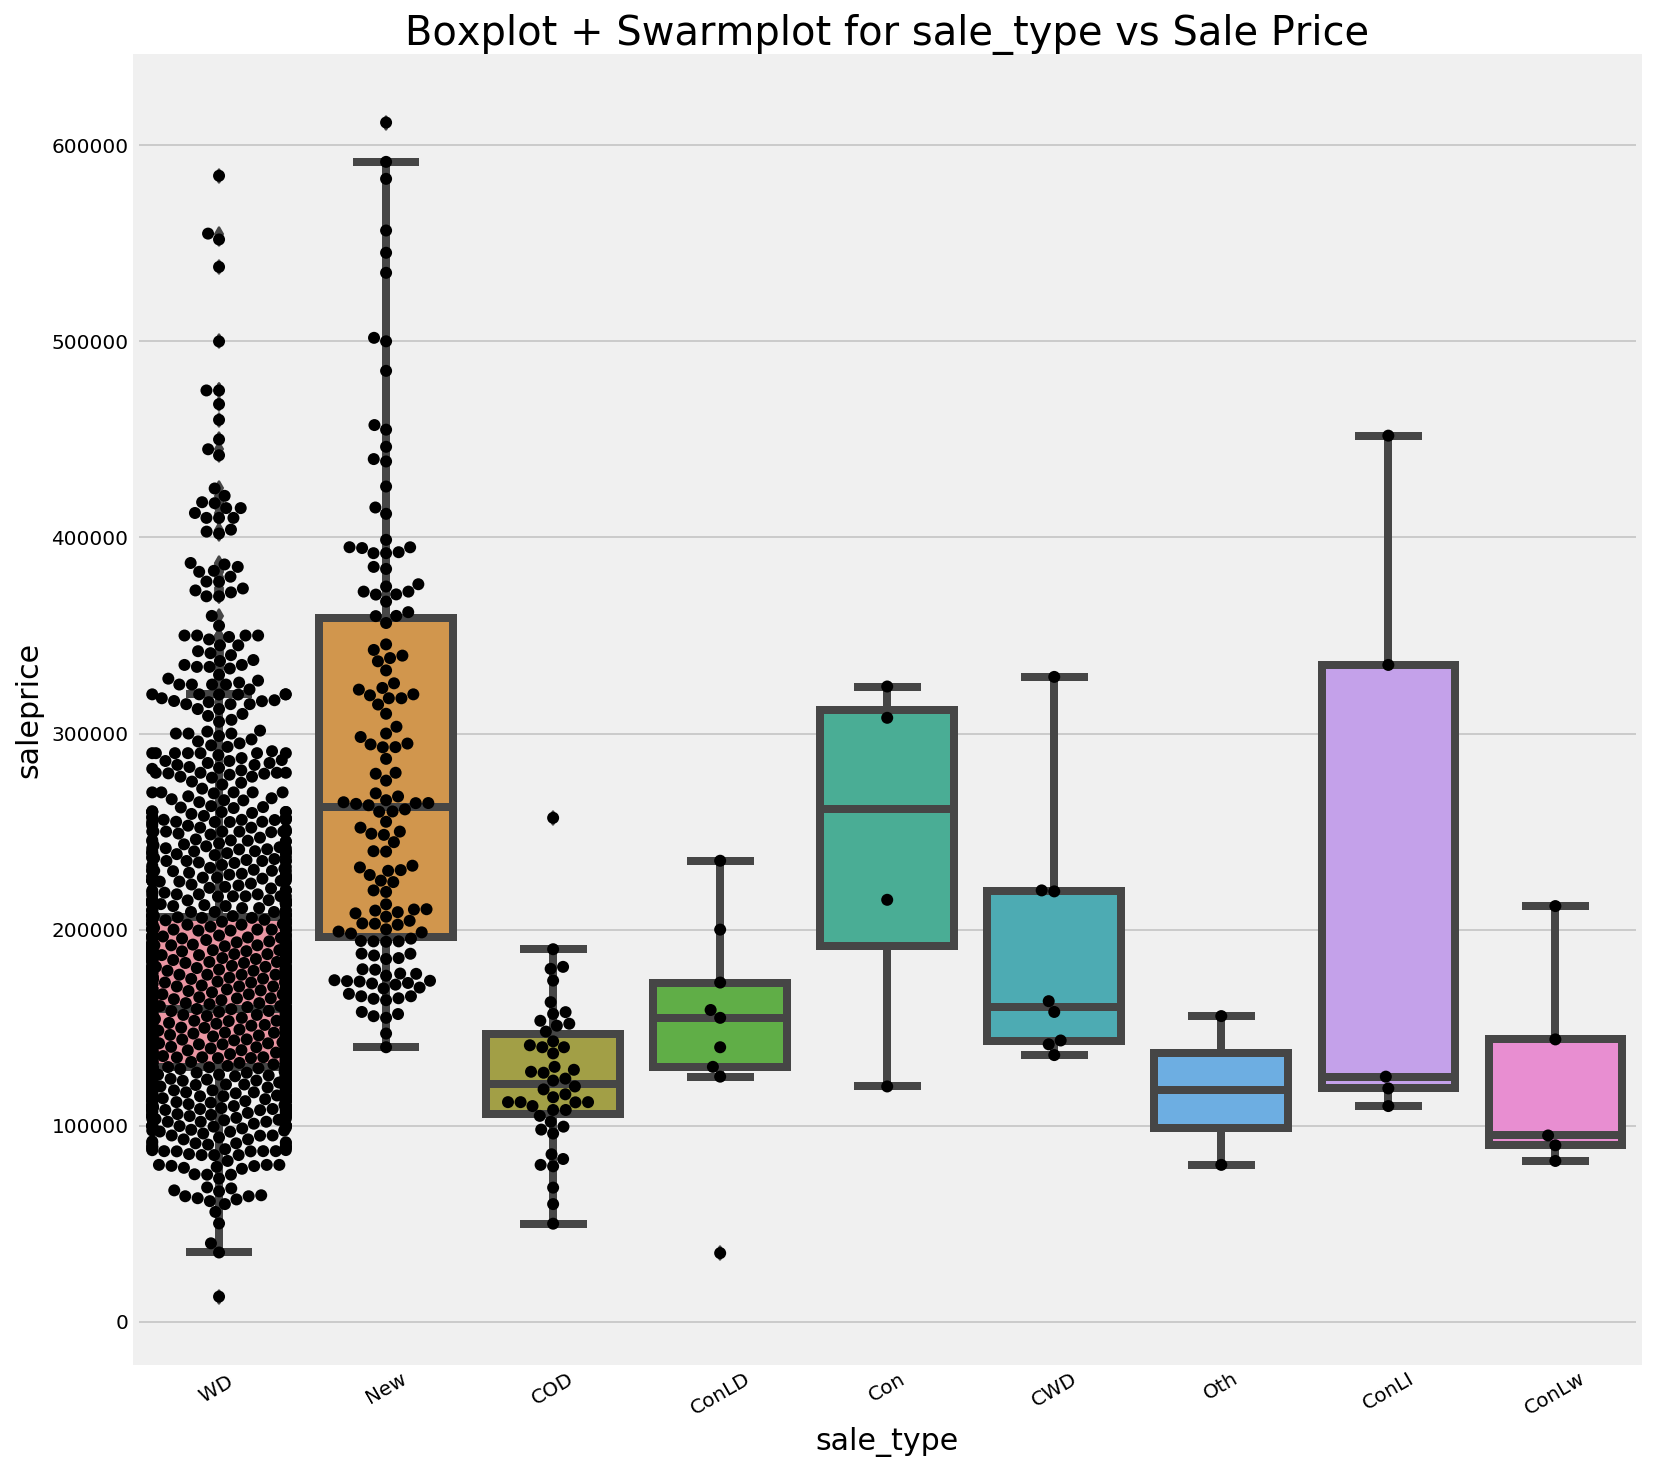

In [42]:
for item in impt_var:
    boxswarmplot(item) 

It seems for the remaining categorical variables, all of them consists of one huge overwhelming majority level.

For example, 'street' consists of 1551 'Pave's and only 3 'Grvl's, 'land_slope' consists of 1483 'Gtl's and the other two levels - 'Mod' and 'Sev' - makes up only 71 entries.

The combined box-swarmplots also confirm this imbalanced distribution of the levels in each categorical variable.

As such, after creating dummy variables for these remaining categoricals, I will simply drop the remaining "minority" levels, so that a value of "1" represents property having this particular "majority" level/feature, and a value of "0" represents the converse.

Get dummies, then drop the "non-majority" levels of each categorical variable:

In [43]:
for item in impt_var:
        df = pd.get_dummies(df, columns=[item], prefix = [item])

In [44]:
for item in impt_var:
    for elem in df.columns:
        if item in elem:
            print(elem)

street_Grvl
street_Pave
land_contour_Bnk
land_contour_HLS
land_contour_Low
land_contour_Lvl
utilities_AllPub
lot_config_Corner
lot_config_CulDSac
lot_config_FR2
lot_config_FR3
lot_config_Inside
land_slope_Gtl
land_slope_Mod
land_slope_Sev
condition_1_Artery
condition_1_Feedr
condition_1_Norm
condition_1_PosA
condition_1_PosN
condition_1_RRAe
condition_1_RRAn
condition_1_RRNe
condition_1_RRNn
condition_2_Artery
condition_2_Feedr
condition_2_Norm
condition_2_PosA
condition_2_PosN
condition_2_RRNn
roof_style_Flat
roof_style_Gable
roof_style_Gambrel
roof_style_Hip
roof_style_Mansard
roof_style_Shed
roof_matl_CompShg
roof_matl_Membran
roof_matl_Tar&Grv
roof_matl_WdShake
roof_matl_WdShngl
exter_cond_Ex
exter_cond_Fa
exter_cond_Gd
exter_cond_TA
bsmt_cond_Ex
bsmt_cond_Fa
bsmt_cond_Gd
bsmt_cond_Po
bsmt_cond_TA
heating_GasA
heating_GasW
heating_Grav
heating_OthW
electrical_FuseA
electrical_FuseF
electrical_FuseP
electrical_Mix
electrical_SBrkr
functional_Maj1
functional_Maj2
functional_Min1
func

In [45]:
df_X_num_scaled.columns

Index(['lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmt_full_bath', 'full_bath', 'half_bath',
       'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars',
       'prop_age', 'prop_remodel_duration'],
      dtype='object')

In [46]:
# exclude the "majority" levels of each categorical, as well as the numerical variables,
# and also dummy variable 'prop_remodel_dummy', and lastly target = 'saleprice'

excluded_drop = ['street_Pave', 'land_contour_Lvl', 'utilities_AllPub', 'lot_config_Inside', 'land_slope_Gtl',
                'condition_1_Norm', 'condition_2_Norm', 'roof_style_Gable', 'roof_matl_CompShg', 'exter_cond_TA',
                'bsmt_cond_TA', 'heating_GasA', 'electrical_SBrkr', 'functional_Typ', 'garage_qual_TA', 'garage_cond_TA',
                'paved_drive_Y', 'sale_type_WD',
                 'prop_remodel_dummy', 'saleprice',
                 'lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area',
                 'bsmtfin_sf_1', 'bsmt_full_bath', 'full_bath', 'half_bath',
                 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'prop_age', 'prop_remodel_duration']

In [47]:
df = df.drop([item for item in df.columns if item not in excluded_drop], axis = 1)
df.shape

(1554, 33)

# Part 2: Model Testing & Continual Refinement and Tuning

Now that data has been cleaned and features selected, I will run my model on it and check for its robustness, refining it and tuning it along the way, engaging in deeper feature selections.

First, set the target variable and features.

In [48]:
target = df['saleprice']
y = target
X = df[[x for x in df.columns if x!= 'saleprice']]

In [49]:
lr = LinearRegression()
scores = cross_val_score(lr, X.values, y.values, cv=5)
print(scores.mean())
print(scores.std())
print(scores)

0.8436970660258425
0.01093765454704169
[0.83270104 0.85898047 0.84589788 0.85088788 0.83001807]


In [50]:
def CVS(X, y):  
    
    CVS = cross_val_score(lr, X, y, cv = 5)
    CVS_mean = round(CVS.mean(),4)
    
    print(CVS)
    return f"Mean of cross_val_score for cv = 5 is: {CVS_mean}"

In [51]:
CVS(X, y)

[0.83270104 0.85898047 0.84589788 0.85088788 0.83001807]


'Mean of cross_val_score for cv = 5 is: 0.8437'

#### Further tuning and feature selection via checking each variable's p-value:

In [52]:
import statsmodels.api as sm

model1 = sm.OLS(y, X)
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     287.3
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:28:18   Log-Likelihood:                -18295.
No. Observations:                1554   AIC:                         3.665e+04
Df Residuals:                    1522   BIC:                         3.683e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lot_frontage           2889.1937   1012.466      2.854      0.004     903.217    4875.170
lot_area               1.268e+04   1032.806     12.280      0.000    1.07e+04    1.47e+04
overall_qual           3.404e+04   1346.075     25.286      0.000    3.14e+04    3.67e+04
mas_vnr_area           8880.2037    980.654      9.055      0.000    6956.627    1.08e+04
bsmtfin_sf_1           1.411e+04   1160.413     12.155      0.000    1.18e+04    1.64e+04
bsmt_full_bath         1073.3422   1092.360      0.983      0.326   -1069.348    3216.033
full_bath              3154.9596   1212.779      2.601      0.009     776.064    5533.855
half_bath              1910.9540    945.639      2.021      0.043      56.061    3765.847
totrms_abvgrd          1.303e+04   1175.565     11.086      0.000    1.07e+04    1.53e+04
fireplaces             4639.1310    953.800      4.864      0.000    2768.230    6510.032
garage_yr_blt          3027.4919   1718.754      1.761      0.078    -343.885    6398.869
garage_cars            7397.9547   1239.173      5.970      0.000    4967.287    9828.623
prop_age              -4031.7933   1859.116     -2.169      0.030   -7678.493    -385.093
prop_remodel_duration -6070.8154   1331.954     -4.558      0.000   -8683.475   -3458.155
prop_remodel_dummy     7565.8163   1994.659      3.793      0.000    3653.246    1.15e+04
street_Pave            3.776e+04   1.88e+04      2.008      0.045     880.390    7.46e+04
land_contour_Lvl      -8965.1312   3223.217     -2.781      0.005   -1.53e+04   -2642.713
utilities_AllPub       1.462e+05   2.45e+04      5.958      0.000     9.8e+04    1.94e+05
lot_config_Inside      2398.7878   1956.570      1.226      0.220   -1439.071    6236.647
land_slope_Gtl        -5175.1178   4576.404     -1.131      0.258   -1.42e+04    3801.609
condition_1_Norm       8486.0658   2545.541      3.334      0.001    3492.926    1.35e+04
condition_2_Norm      -1.176e+04   7458.856     -1.577      0.115   -2.64e+04    2870.429
roof_style_Gable      -9644.3494   2171.671     -4.441      0.000   -1.39e+04   -5384.565
roof_matl_CompShg      1.794e+04   8601.675      2.086      0.037    1071.544    3.48e+04
exter_cond_TA         -3616.0567   2610.834     -1.385      0.166   -8737.270    1505.156
bsmt_cond_TA           1429.8616   3029.084      0.472      0.637   -4511.759    7371.482
heating_GasA           1.046e+04   7234.523      1.446      0.148   -3730.203    2.47e+04
electrical_SBrkr      -5695.9078   3224.853     -1.766      0.078    -1.2e+04     629.719
functional_Typ         1.065e+04   3566.058      2.985      0.003    3650.822    1.76e+04
garage_qual_TA        -1.546e+04   4132.992     -3.742      0.000   -2.36e+04   -7357.149
garage_cond_TA         5142.9758   5197.145      0.990      0.323   -5051.349    1.53e+04
paved_drive_Y          

p-values of 'bsmt_full_bath', 'garage_yr_blt', 'lot_config_Inside', 'land_slope_Gtl', 'condition_2_Norm	', 'exter_cond_TA', 'bsmt_cond_TA', 'heating_GasA', 'electrical_SBrkr', 'garage_cond_TA', 'paved_drive_Y' are all more than level of significance = 0.5.

Hence, do not include these variables in model.

In [53]:
### level of significance = 0.5. Should be 0.05?

In [54]:
df = df.drop(['bsmt_full_bath', 'garage_yr_blt', 'lot_config_Inside', 'land_slope_Gtl', 'condition_2_Norm', 'exter_cond_TA', 'bsmt_cond_TA', 'heating_GasA', 'electrical_SBrkr', 'garage_cond_TA', 'paved_drive_Y'], axis = 1)

In [55]:
X2 = df[[x for x in df.columns if x!= 'saleprice']]

In [56]:
CVS(X2, y)

[0.83694892 0.85866211 0.84643732 0.85335868 0.83064578]


'Mean of cross_val_score for cv = 5 is: 0.8452'

In [57]:
model2 = sm.OLS(y, X2)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     442.5
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:28:18   Log-Likelihood:                -18304.
No. Observations:                1554   AIC:                         3.665e+04
Df Residuals:                    1533   BIC:                         3.676e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lot_frontage           2684.8181   1006.097      2.669      0.008     711.346    4658.290
lot_area               1.247e+04   1017.279     12.257      0.000    1.05e+04    1.45e+04
overall_qual           3.408e+04   1328.087     25.658      0.000    3.15e+04    3.67e+04
mas_vnr_area           8842.9711    979.247      9.030      0.000    6922.166    1.08e+04
bsmtfin_sf_1           1.486e+04    922.401     16.113      0.000    1.31e+04    1.67e+04
full_bath              3045.8757   1196.699      2.545      0.011     698.535    5393.216
half_bath              1794.2268    942.155      1.904      0.057     -53.822    3642.275
totrms_abvgrd          1.302e+04   1170.633     11.121      0.000    1.07e+04    1.53e+04
fireplaces             4397.4548    940.434      4.676      0.000    2552.782    6242.128
garage_cars            7884.5802   1168.759      6.746      0.000    5592.044    1.02e+04
prop_age              -5575.3971   1541.016     -3.618      0.000   -8598.119   -2552.676
prop_remodel_duration -6643.0720   1263.960     -5.256      0.000   -9122.346   -4163.798
prop_remodel_dummy     7736.6810   1987.145      3.893      0.000    3838.872    1.16e+04
street_Pave            3.661e+04   1.85e+04      1.974      0.049     233.665     7.3e+04
land_contour_Lvl      -1.186e+04   2817.203     -4.209      0.000   -1.74e+04   -6331.088
utilities_AllPub       1.443e+05   2.14e+04      6.753      0.000    1.02e+05    1.86e+05
condition_1_Norm       7234.8915   2421.086      2.988      0.003    2485.900     1.2e+04
roof_style_Gable      -9315.5799   2163.191     -4.306      0.000   -1.36e+04   -5072.454
roof_matl_CompShg      1.546e+04   8457.628      1.828      0.068   -1130.052     3.2e+04
functional_Typ         1.081e+04   3550.750      3.044      0.002    3844.936    1.78e+04
garage_qual_TA        -1.269e+04   3666.691     -3.461      0.001   -1.99e+04   -5496.332
==============================================================================
Omnibus:                      367.604   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1923.092
Skew:                           1.005   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                         91.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once again, drop variables 'half_bath', 'roof_matl_CompShg' and 'street_Pave' with p-values higher than (or close to) 0.05, the level of significance.

In [58]:
df = df.drop(['half_bath', 'roof_matl_CompShg', 'street_Pave'], axis = 1)
X3 = df[[x for x in df.columns if x!= 'saleprice']]

In [59]:
CVS(X3, y)

[0.83885906 0.85777659 0.84689994 0.85281242 0.8288955 ]


'Mean of cross_val_score for cv = 5 is: 0.845'

In [60]:
model3 = sm.OLS(y, X3)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     517.4
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:28:18   Log-Likelihood:                -18309.
No. Observations:                1554   AIC:                         3.665e+04
Df Residuals:                    1536   BIC:                         3.675e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lot_frontage           2239.2331    996.319      2.248      0.025     284.945    4193.522
lot_area               1.218e+04    996.731     12.222      0.000    1.02e+04    1.41e+04
overall_qual           3.382e+04   1324.298     25.535      0.000    3.12e+04    3.64e+04
mas_vnr_area           9095.5533    977.040      9.309      0.000    7179.080     1.1e+04
bsmtfin_sf_1           1.482e+04    913.275     16.228      0.000     1.3e+04    1.66e+04
full_bath              2607.6392   1161.806      2.244      0.025     328.746    4886.533
totrms_abvgrd          1.407e+04   1088.899     12.922      0.000    1.19e+04    1.62e+04
fireplaces             4535.5188    934.855      4.852      0.000    2701.792    6369.246
garage_cars            7842.1737   1171.032      6.697      0.000    5545.184    1.01e+04
prop_age              -6363.2226   1511.300     -4.210      0.000   -9327.652   -3398.794
prop_remodel_duration -6787.6687   1265.895     -5.362      0.000   -9270.734   -4304.603
prop_remodel_dummy     7871.5203   1989.142      3.957      0.000    3969.798    1.18e+04
land_contour_Lvl      -1.125e+04   2815.735     -3.995      0.000   -1.68e+04   -5726.309
utilities_AllPub       1.954e+05   6263.149     31.195      0.000    1.83e+05    2.08e+05
condition_1_Norm       7176.5777   2425.432      2.959      0.003    2419.069    1.19e+04
roof_style_Gable      -8283.0922   2138.857     -3.873      0.000   -1.25e+04   -4087.703
functional_Typ         1.073e+04   3558.112      3.016      0.003    3750.707    1.77e+04
garage_qual_TA        -1.327e+04   3669.778     -3.616      0.000   -2.05e+04   -6070.900
==============================================================================
Omnibus:                      366.796   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1936.274
Skew:                           1.000   Prob(JB):                         0.00
Kurtosis:                       8.089   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No more variables to drop, proceed to **train-test-split** to check for robustness of model.

In [61]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size= 0.2, random_state=42)

In [62]:
lr = LinearRegression()
model3 = lr.fit(X3_train, y_train)
print(model3.coef_)
print(model3.intercept_)

[ 1.36149809e+03  1.17097197e+04  3.40047109e+04  9.11297163e+03
  1.51696737e+04  3.54374981e+03  1.34790357e+04  4.56866076e+03
  8.22193339e+03 -5.24808672e+03 -6.94688352e+03  5.71336629e+03
 -1.29751376e+04  3.63797881e-12  5.93922628e+03 -8.21912508e+03
  8.86704404e+03 -1.55255663e+04]
202958.9298954353


In [63]:
model3.score(X3_train, y_train)

0.8546158667403863

In [64]:
model3.score(X3_test, y_test)

0.8337700936520258

#### Plot Predicted values for saleprice (model3.predict) vs Actual values in test set (y_test)

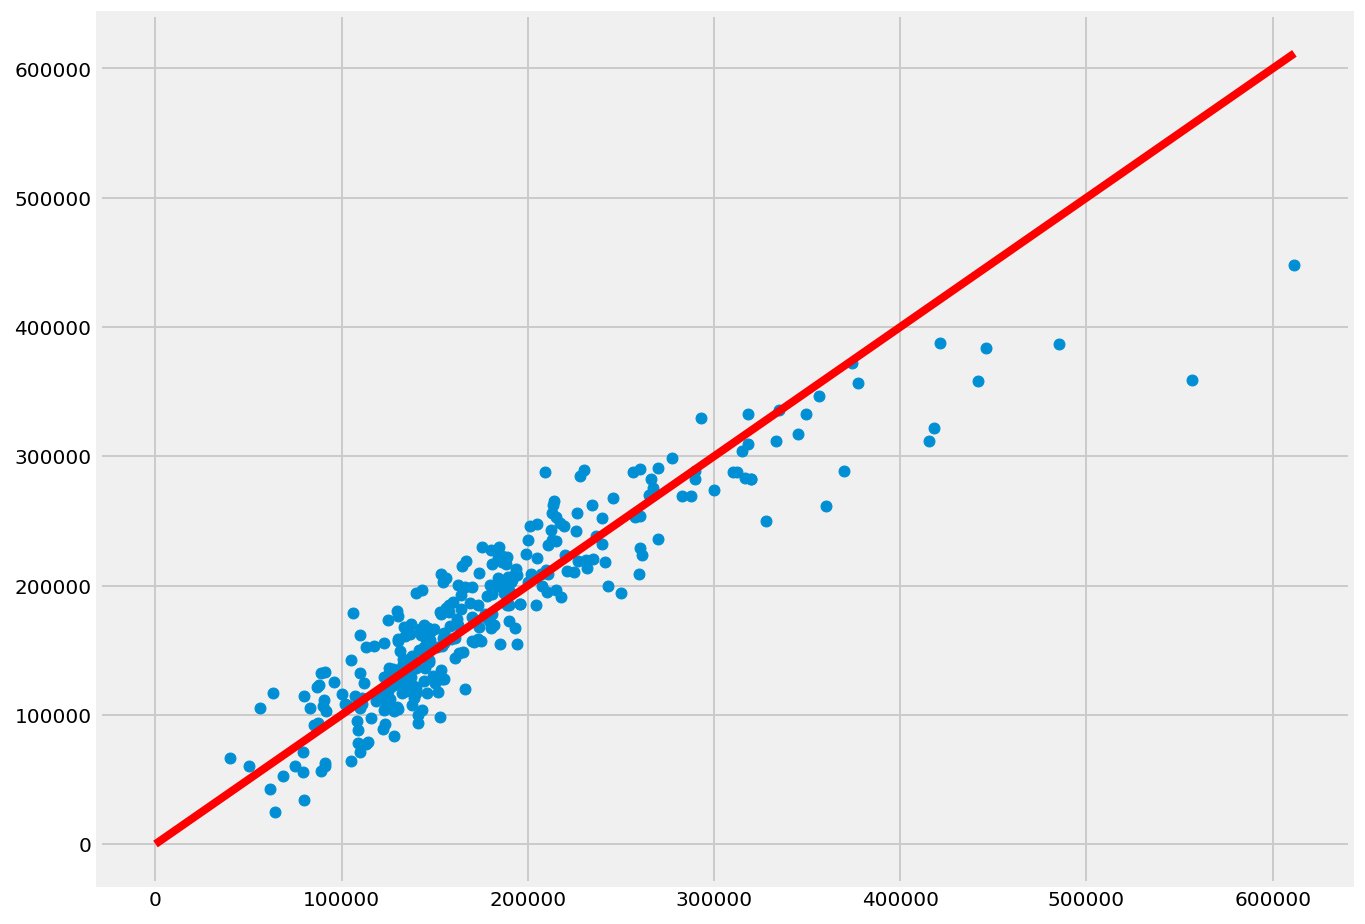

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, model3.predict(X3_test),s=30)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], c='r',linewidth=4); 

### y and x axis labels here are important.
### The y axis is the y_pred, and x axis is y_test. You can see that the model is systematically overpredicting the sales
### price of expensive houses. Maybe a power transform somewhere could help. 

#### Display summary of optimal Linear Regression OLS model, model 3

In [66]:
linreg_coef_df = pd.DataFrame(list(zip(X3.columns, model3.coef_)), columns = ['Variables', 'Coefficients'])
linreg_df = linreg_coef_df.sort_values(['Coefficients'], ascending=False)
linreg_df

Variables  Coefficients
2            overall_qual  3.400471e+04
4            bsmtfin_sf_1  1.516967e+04
6           totrms_abvgrd  1.347904e+04
1                lot_area  1.170972e+04
3            mas_vnr_area  9.112972e+03
16         functional_Typ  8.867044e+03
8             garage_cars  8.221933e+03
14       condition_1_Norm  5.939226e+03
11     prop_remodel_dummy  5.713366e+03
7              fireplaces  4.568661e+03
5               full_bath  3.543750e+03
0            lot_frontage  1.361498e+03
13       utilities_AllPub  3.637979e-12
9                prop_age -5.248087e+03
10  prop_remodel_duration -6.946884e+03
15       roof_style_Gable -8.219125e+03
12       land_contour_Lvl -1.297514e+04
17         garage_qual_TA -1.552557e+04

# Part 3: Regularization and Hyperparameter Tuning

Further tune the model with LassoCV, RidgeCV, as well as ElasticNetCV

a) Start with Ridge

In [67]:
r_alphas = np.logspace(0, 10, 1000)             ### You might not want to go from 0 to 10 in logspace, since alpha is 
ridge = RidgeCV(alphas=r_alphas).fit(X3, y)     ### not likely to be that large.
                                                ### try something like np.logspace(-3, 5, 1000) instead

In [108]:
optimal_R_alpha                                 ### your actual optimal_R_alpha is too close to the left tail of 
                                                ### np.logspace(0, 10, 1000)  

13.216641839466051

In [68]:
optimal_R_alpha = ridge.alpha_

model_ridge = RidgeCV(alphas=[optimal_R_alpha],cv=5).fit(X3, y)

print(model_ridge.score(X3, y))
print(optimal_R_alpha)

0.8512480505009687
13.216641839466051


In [69]:
model_ridge.coef_

array([  2305.3489718 ,  12083.79314809,  33432.19029442,   9183.10308184,
        14723.30537249,   2743.12980865,  13924.80256898,   4675.01520882,
         7951.48799591,  -6169.47858835,  -6950.32126409,   7490.30627541,
       -10431.55979794,      0.        ,   6643.6129524 ,  -8010.13140689,
         9305.4192036 , -11369.78156065])

b) Proceed with Lasso

In [70]:
lasso = LassoCV(n_alphas=1000,cv=5).fit(X3, y)

In [71]:
optimal_L_alpha = lasso.alpha_
model_lasso = LassoCV(alphas=[optimal_L_alpha],cv=5).fit(X3, y)

print(model_lasso.score(X3, y))
print(optimal_L_alpha)

0.851281052736188
66.64515283125394


In [72]:
model_lasso.coef_

array([  2207.62829854,  12161.29915202,  33999.57053921,   9108.13094424,
        14800.52699797,   2561.15530118,  14005.69014581,   4513.69025259,
         7858.9703619 ,  -6065.63801812,  -6855.12205274,   7428.10671828,
       -10489.31813435,      0.        ,   6564.06262939,  -7877.07020069,
         9397.44432753, -11879.52217199])

c) Lastly, ElasticNet

In [73]:
elas_net = ElasticNetCV(n_alphas=100,cv=5,l1_ratio=[.1, .5, .7, .9, .95, .99, 1]).fit(X3, y)

In [74]:
optimal_E_alpha = elas_net.alpha_
optimal_E_ratio = elas_net.l1_ratio_

model_elas_net = ElasticNetCV(alphas = [optimal_E_alpha], l1_ratio = optimal_E_ratio, cv=5).fit(X3, y)

print(model_elas_net.score(X3, y))
print(optimal_E_alpha)
print(optimal_E_ratio) # it gives the same score since optimal_E_ratio is 1

0.851281052736188
66.64515283125394
1.0


Ridge gave a margianlly-lower score as compared to the other 2, whileL asso and ElasticNet gave the exact same score. For computational purposes, I will select Lasso regression to proceed.

#### Check for robustness of model by running Lasso on train-test-split.

In [75]:
model_lasso = Lasso(alpha=optimal_L_alpha)
model_lasso = model_lasso.fit(X3_train, y_train)

print(model_lasso.coef_)
print(model_lasso.intercept_)

[  1327.54056723  11691.50762467  34191.0690098    9134.85997862
  15148.41680743   3502.24606743  13407.80868446   4541.42223958
   8233.43760548  -4938.54738982  -7031.36362757   5264.27421939
 -12200.62509104      0.           5310.0697566   -7839.01428482
   7498.38303628 -14080.77372734]
202641.7135416118


In [76]:
model_lasso.score(X3_train, y_train)

0.8545643278107312

In [77]:
model_lasso.score(X3_test, y_test)

0.8334691871457717

#### Display summary of optimal Linear Regression OLS model, model 3

In [78]:
lasso_coef_df = pd.DataFrame(list(zip(X3.columns, model_lasso.coef_)), columns = ['Variables', 'Coefficients'])
lasso_df = lasso_coef_df.sort_values(['Coefficients'], ascending=False)
lasso_df

Variables  Coefficients
2            overall_qual  34191.069010
4            bsmtfin_sf_1  15148.416807
6           totrms_abvgrd  13407.808684
1                lot_area  11691.507625
3            mas_vnr_area   9134.859979
8             garage_cars   8233.437605
16         functional_Typ   7498.383036
14       condition_1_Norm   5310.069757
11     prop_remodel_dummy   5264.274219
7              fireplaces   4541.422240
5               full_bath   3502.246067
0            lot_frontage   1327.540567
13       utilities_AllPub      0.000000
9                prop_age  -4938.547390
10  prop_remodel_duration  -7031.363628
15       roof_style_Gable  -7839.014285
12       land_contour_Lvl -12200.625091
17         garage_qual_TA -14080.773727

In [79]:
linreg_df

Variables  Coefficients
2            overall_qual  3.400471e+04
4            bsmtfin_sf_1  1.516967e+04
6           totrms_abvgrd  1.347904e+04
1                lot_area  1.170972e+04
3            mas_vnr_area  9.112972e+03
16         functional_Typ  8.867044e+03
8             garage_cars  8.221933e+03
14       condition_1_Norm  5.939226e+03
11     prop_remodel_dummy  5.713366e+03
7              fireplaces  4.568661e+03
5               full_bath  3.543750e+03
0            lot_frontage  1.361498e+03
13       utilities_AllPub  3.637979e-12
9                prop_age -5.248087e+03
10  prop_remodel_duration -6.946884e+03
15       roof_style_Gable -8.219125e+03
12       land_contour_Lvl -1.297514e+04
17         garage_qual_TA -1.552557e+04

# Part 4 - Cleaning and Scaling Unseen Data "test.csv"

- In accordance with the variables on train dataset.

In [80]:
### Inefficient. Should have appended the datsets to each other, performed the cleaning then split them up at the end. 

test = pd.read_csv('datasets/test.csv', keep_default_na=False, na_values=['']) 
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0      NA   
1    NA       IR1          Lvl  ...          0            0         0      NA   
2    NA       IR1          Lvl  ...          0            0         0      NA   
3    NA       Reg          Lvl  ...          0            0         0      NA   
4    NA       IR1          Lvl  ...          0          185         0      NA   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0    NA           NA        0       4     2006        WD   
1    NA           NA        0       8     2006        WD   
2    NA           NA        0       9     2006        New  
3    NA           NA        0       7     2007        WD   
4    NA           NA        0       7     2009        WD   

[5 rows x 80 columns]

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof 

In [82]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

#### Clean and scale numerical variables first

In [83]:
df_test = test.drop(columns = ['Id', 'PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'])
df_test.columns = [x.lower().replace(' ','_') for x in df_test.columns]
df_test.head()

ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0          190        RM          69.0      9142   Pave       Reg   
1           90        RL           NaN      9662   Pave       IR1   
2           60        RL          58.0     17104   Pave       IR1   
3           30        RM          60.0      8520   Pave       Reg   
4           20        RL           NaN      9500   Pave       IR1   

  land_contour utilities lot_config land_slope  ... wood_deck_sf  \
0          Lvl    AllPub     Inside        Gtl  ...            0   
1          Lvl    AllPub     Inside        Gtl  ...          170   
2          Lvl    AllPub     Inside        Gtl  ...          100   
3          Lvl    AllPub     Inside        Gtl  ...            0   
4          Lvl    AllPub     Inside        Gtl  ...            0   

  open_porch_sf enclosed_porch 3ssn_porch screen_porch  pool_area  misc_val  \
0            60            112          0            0          0         0   
1             0              0          0            0          0         0   
2            24              0          0            0          0         0   
3             0            184          0            0          0         0   
4            76              0          0          185          0         0   

   mo_sold  yr_sold sale_type  
0        4     2006       WD   
1        8     2006       WD   
2        9     2006       New  
3        7     2007       WD   
4        7     2009       WD   

[5 rows x 73 columns]

In [84]:
df_test['prop_age'] = df_test['yr_sold'] - df_test['year_built']
df_test['prop_remodel_duration'] = df_test['yr_sold'] - df_test['year_remod/add']

In [85]:
# no need to create df_test['total_sf'] since it was ultimately dropped from the initial model after VIF testing
# so simply drop the columns that were used to create 'total_sf':

df_test = df_test.drop(['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'wood_deck_sf', 'open_porch_sf', 'garage_area', 'gr_liv_area'], axis = 1)

In [86]:
prop_remodel_dummy = []

for x, y in zip(df_test['year_built'], df_test['year_remod/add']):
    if x != y:
        prop_remodel_dummy.append(1)
    else:
        prop_remodel_dummy.append(0)
        
df_test['prop_remodel_dummy'] = prop_remodel_dummy

df_test = df_test.drop(columns = ['mo_sold', 'year_built', 'yr_sold', 'year_remod/add'])

In [87]:
# drop categorical variables that were eliminated from Chi-Squared Test iteration
df_test = df_test.drop(['ms_zoning', 'lot_shape', 'neighborhood', 'bldg_type', 'house_style', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'central_air', 'kitchen_qual', 'garage_type', 'garage_finish'], axis = 1)

All numerical variables have been cleaned, all categorical variables relating to the Chi-Squared-Test iteration have been dropped as well.

In [88]:
df_test.columns

Index(['ms_subclass', 'lot_frontage', 'lot_area', 'street', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'condition_1', 'condition_2',
       'overall_qual', 'overall_cond', 'roof_style', 'roof_matl',
       'mas_vnr_area', 'exter_cond', 'bsmt_cond', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'heating', 'electrical',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'functional',
       'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_qual',
       'garage_cond', 'paved_drive', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'misc_val', 'sale_type', 'prop_age',
       'prop_remodel_duration', 'prop_remodel_dummy'],
      dtype='object')

In [89]:
df.columns

Index(['lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area',
       'bsmtfin_sf_1', 'full_bath', 'totrms_abvgrd', 'fireplaces',
       'garage_cars', 'saleprice', 'prop_age', 'prop_remodel_duration',
       'prop_remodel_dummy', 'land_contour_Lvl', 'utilities_AllPub',
       'condition_1_Norm', 'roof_style_Gable', 'functional_Typ',
       'garage_qual_TA'],
      dtype='object')

In [90]:
x_cat_test = [x for x in df_test.columns if df_test[x].dtypes == 'object']

In [91]:
for item in x_cat_test:
        df_test = pd.get_dummies(df_test, columns=[item], prefix = [item]) ### dangerous to get_dummies here. 
df_test                                                                    ### What if there are fewer variables here than
                                                                           ### the training set?
    
### You could have just concaternated the two datasets to each other, performed the 
### pd.get_dummies operation then split them up once you're done.
###
### (all categories)  init_col  |                         is_b  | is_c |
###                      a      |                          0    |  0   |
###                      b      |     -- get_dummies-->    1    |  0   |
###                      c      |                          0    |  1   |
###                      a      |                          0    |  0   |
###
### (missing one)     init_col  |                         is_c  |                           is_b  | is_c |
###                      b      |                          0    |                            0    |  0   |
###                      b      |     -- get_dummies-->    0    |    ---adding missing -->   0    |  0   |  which is wrong
###                      c      |                          1    |                            0    |  1   |
###                      c      |                          1    |                            0    |  1   |
###
### eg if your columns are (a, b ,c) for categories in train, you'd get is_b and is_c for columns in the get_dummies
### if you force drop_fist. But if you only have (b ,c) for categories in test, you'd get is_c for the column in the 
### dummied set, then adding back is_b would be wrong as it would suggest that there are no bs.

ms_subclass  lot_frontage  lot_area  overall_qual  overall_cond  \
0            190          69.0      9142             6             8   
1             90           NaN      9662             5             4   
2             60          58.0     17104             7             5   
3             30          60.0      8520             5             6   
4             20           NaN      9500             6             5   
..           ...           ...       ...           ...           ...   
874           60          80.0      8000             6             6   
875           60          90.0     14670             6             7   
876           20          55.0      8250             5             5   
877           20          60.0      9000             4             6   
878           20          70.0      8400             5             5   

     mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  bsmt_full_bath  \
0             0.0             0             0         1020               0   
1             0.0             0             0         1967               0   
2             0.0           554             0          100               1   
3             0.0             0             0          968               0   
4           247.0           609             0          785               1   
..            ...           ...           ...          ...             ...   
874           0.0           931           153            0               1   
875         410.0           575             0          529               0   
876           0.0           250           492          210               0   
877           0.0           616             0          248               0   
878           0.0           793             0          130               1   

     ...  sale_type_COD  sale_type_CWD  sale_type_Con  sale_type_ConLD  \
0    ...              0              0              0                0   
1    ...              0              0              0                0   
2    ...              0              0              0                0   
3    ...              0              0              0                0   
4    ...              0              0              0                0   
..   ...            ...            ...            ...              ...   
874  ...              0              0              0                0   
875  ...              0              0              0                0   
876  ...              0              0              0                0   
877  ...              0              0              0                0   
878  ...              0              0              0                0   

     sale_type_ConLI  sale_type_ConLw  sale_type_New  sale_type_Oth  \
0                  0                0              0              0   
1                  0                0              0              0   
2                  0                0              1              0   
3                  0                0              0              0   
4                  0                0              0              0   
..               ...              ...            ...            ...   
874                0                0              0              0   
875                0                0              0              0   
876                0                0              0              0   
877                0                0              0              0   
878                0                0              0              0   

     sale_type_VWD  sale_type_WD   
0                0              1  
1                0              1  
2                0              0  
3                0              1  
4                0              1  
..             ...            ...  
874              0              1  
875              0              1  
876              0              1  
877              0              1  
878              0              1  

[879 rows x 115 columns]

In [92]:
matching_cols = [item for item in df_test.columns if item in df.columns]

df_test = df_test[matching_cols]
df_test

lot_frontage  lot_area  overall_qual  mas_vnr_area  bsmtfin_sf_1  \
0            69.0      9142             6           0.0             0   
1             NaN      9662             5           0.0             0   
2            58.0     17104             7           0.0           554   
3            60.0      8520             5           0.0             0   
4             NaN      9500             6         247.0           609   
..            ...       ...           ...           ...           ...   
874          80.0      8000             6           0.0           931   
875          90.0     14670             6         410.0           575   
876          55.0      8250             5           0.0           250   
877          60.0      9000             4           0.0           616   
878          70.0      8400             5           0.0           793   

     full_bath  totrms_abvgrd  fireplaces  garage_cars  prop_age  \
0            2              9           0            1        96   
1            2             10           0            2        29   
2            2              7           1            2         0   
3            1              5           0            2        84   
4            1              6           2            2        46   
..         ...            ...         ...          ...       ...   
874          2              8           1            2        33   
875          2              9           1            2        42   
876          1              5           1            1        40   
877          1              5           0            2        36   
878          1              5           2            1        52   

     prop_remodel_duration  prop_remodel_dummy  land_contour_Lvl  \
0                       56                   1                 1   
1                       29                   0                 1   
2                        0                   0                 1   
3                        1                   1                 1   
4                       46                   0                 1   
..                     ...                 ...               ...   
874                     33                   0                 1   
875                      9                   1                 1   
876                     40                   0                 1   
877                     36                   0                 1   
878                     52                   0                 1   

     utilities_AllPub  condition_1_Norm  roof_style_Gable  functional_Typ  \
0                   1                 1                 1               1   
1                   1                 1                 1               1   
2                   1                 1                 1               1   
3                   1                 1                 1               1   
4                   1                 1                 1               1   
..                ...               ...               ...             ...   
874                 1                 0                 1               1   
875                 1                 1                 1               1   
876                 1                 0                 0               1   
877                 1                 1                 1               1   
878                 1                 1                 1               1   

     garage_qual_TA  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
..              ...  
874               1  
875               1  
876               1  
877               1  
878               1  

[879 rows x 18 columns]

Check the remaining number of columns on df_train vs df:
    
- They should differ by only 1, since df contains the target variable 'saleprice'

In [93]:
print(df.columns)
print(len(df.columns))

Index(['lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area',
       'bsmtfin_sf_1', 'full_bath', 'totrms_abvgrd', 'fireplaces',
       'garage_cars', 'saleprice', 'prop_age', 'prop_remodel_duration',
       'prop_remodel_dummy', 'land_contour_Lvl', 'utilities_AllPub',
       'condition_1_Norm', 'roof_style_Gable', 'functional_Typ',
       'garage_qual_TA'],
      dtype='object')
19


In [94]:
print(df_test.columns)
print(len(df_test.columns))

Index(['lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area',
       'bsmtfin_sf_1', 'full_bath', 'totrms_abvgrd', 'fireplaces',
       'garage_cars', 'prop_age', 'prop_remodel_duration',
       'prop_remodel_dummy', 'land_contour_Lvl', 'utilities_AllPub',
       'condition_1_Norm', 'roof_style_Gable', 'functional_Typ',
       'garage_qual_TA'],
      dtype='object')
18


Check for nulls and replace them accordingly:

In [95]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

lot_frontage    160
mas_vnr_area      1
dtype: int64

From Data Dictionary:
    
- Lot Frontage (Continuous): Linear feet of street connected to property
- Mas Vnr Area (Continuous): Masonry veneer area in square feet

Hence, for the NaN values in these columns, I will simply populate them with value '0'.

In [96]:
df_test = df_test.fillna(0)
df_test.isnull().sum()[df_test.isnull().sum()>0]

Series([], dtype: int64)

Finally, scale the appropriate variables.

In [97]:
df_test.columns

Index(['lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area',
       'bsmtfin_sf_1', 'full_bath', 'totrms_abvgrd', 'fireplaces',
       'garage_cars', 'prop_age', 'prop_remodel_duration',
       'prop_remodel_dummy', 'land_contour_Lvl', 'utilities_AllPub',
       'condition_1_Norm', 'roof_style_Gable', 'functional_Typ',
       'garage_qual_TA'],
      dtype='object')

In [98]:
var_toscale = ['lot_frontage', 'lot_area', 'overall_qual', 'mas_vnr_area', 'bsmtfin_sf_1', 'full_bath', 'totrms_abvgrd', 'fireplaces', 'garage_cars', 'prop_age', 'prop_remodel_duration']

In [99]:
df_test[var_toscale] = scaler.fit_transform(df_test[var_toscale])
df_test

lot_frontage  lot_area  overall_qual  mas_vnr_area  bsmtfin_sf_1  \
0        0.350952 -0.119395     -0.039744     -0.567876     -1.002642   
1       -1.659588 -0.067611     -0.767560     -0.567876     -1.002642   
2        0.030431  0.673505      0.688072     -0.567876      0.250104   
3        0.088708 -0.181337     -0.767560     -0.567876     -1.002642   
4       -1.659588 -0.083744     -0.039744      0.744718      0.374474   
..            ...       ...           ...           ...           ...   
874      0.671473 -0.233122     -0.039744     -0.567876      1.102604   
875      0.962855  0.431114     -0.039744      1.610924      0.297590   
876     -0.056984 -0.208225     -0.767560     -0.567876     -0.437324   
877      0.088708 -0.133536     -1.495376     -0.567876      0.390303   
878      0.380090 -0.193288     -0.767560     -0.567876      0.790548   

     full_bath  totrms_abvgrd  fireplaces  garage_cars  prop_age  \
0     0.817846       1.585602   -0.925183    -0.991066  1.927368   
1     0.817846       2.209760   -0.925183     0.340963 -0.272196   
2     0.817846       0.337287    0.569736     0.340963 -1.224246   
3    -0.965992      -0.911029   -0.925183     0.340963  1.533417   
4    -0.965992      -0.286871    2.064656     0.340963  0.285903   
..         ...            ...         ...          ...       ...   
874   0.817846       0.961445    0.569736     0.340963 -0.140878   
875   0.817846       1.585602    0.569736     0.340963  0.154585   
876  -0.965992      -0.911029    0.569736    -0.991066  0.088927   
877  -0.965992      -0.911029   -0.925183     0.340963 -0.042391   
878  -0.965992      -0.911029    2.064656    -0.991066  0.482879   

     prop_remodel_duration  prop_remodel_dummy  land_contour_Lvl  \
0                 1.593181                   1                 1   
1                 0.274485                   0                 1   
2                -1.141892                   0                 1   
3                -1.093051                   1                 1   
4                 1.104775                   0                 1   
..                     ...                 ...               ...   
874               0.469848                   0                 1   
875              -0.702327                   1                 1   
876               0.811732                   0                 1   
877               0.616369                   0                 1   
878               1.397819                   0                 1   

     utilities_AllPub  condition_1_Norm  roof_style_Gable  functional_Typ  \
0                   1                 1                 1               1   
1                   1                 1                 1               1   
2                   1                 1                 1               1   
3                   1                 1                 1               1   
4                   1                 1                 1               1   
..                ...               ...               ...             ...   
874                 1                 0                 1               1   
875                 1                 1                 1               1   
876                 1                 0                 0               1   
877                 1                 1                 1               1   
878                 1                 1                 1               1   

     garage_qual_TA  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
..              ...  
874               1  
875               1  
876               1  
877               1  
878               1  

[879 rows x 18 columns]

# Part 5 (Final) - Running the Model on the Cleaned Test Dataset (df_test)

#### a) Run OLS regression model first

- My optimal OLS regression will be model3

In [100]:
y_hat_test = model3.predict(df_test)

In [101]:
model3_pred = pd.DataFrame()
model3_pred['ID'] = test['Id']
model3_pred['saleprice'] = y_hat_test

In [102]:
model3_pred.to_csv('datasets/model3_pred.csv', index=False)

#### b) Run Lasso regression as well

In [103]:
y_hat_test_lasso = model_lasso.predict(df_test)

In [104]:
model_lasso_pred = pd.DataFrame()
model_lasso_pred['ID'] = test['Id']
model_lasso_pred['saleprice'] = y_hat_test_lasso

In [105]:
model_lasso_pred.to_csv('datasets/model_lasso_pred.csv', index=False)

In [106]:
model3_pred

ID      saleprice
0    2658  170340.416053
1    2718  162290.575746
2    2414  238198.383975
3    1989  136215.499867
4     625  184691.898779
..    ...            ...
874  1662  202229.440622
875  1234  244705.692471
876  1373  115545.381740
877  1672  108312.477395
878  1939  133352.703926

[879 rows x 2 columns]

In [107]:
model_lasso_pred

ID      saleprice
0    2658  169051.568909
1    2718  162228.727651
2    2414  238227.899098
3    1989  135173.228781
4     625  185038.471367
..    ...            ...
874  1662  202883.827680
875  1234  244470.667820
876  1373  115975.374984
877  1672  108365.789837
878  1939  133524.148102

[879 rows x 2 columns]

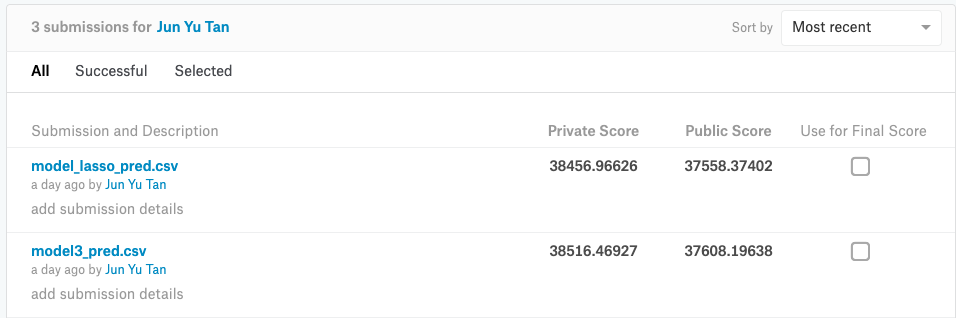